<a href="https://colab.research.google.com/github/CHARANUPGRAD/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Problem Statement:-**

In the banking industry, detecting credit card fraud using machine learning is not just a trend; it is a necessity for the banks, as they need to put proactive monitoring and fraud prevention mechanisms in place. Machine learning helps these institutions reduce time-consuming manual reviews, costly chargebacks and fees, and denial of legitimate transactions.

### **Business Objective:**

Suppose you are part of the analytics team working on a fraud detection model and its cost-benefit analysis. You need to develop a machine learning model to detect fraudulent transactions based on the historical transactional data of customers with a pool of merchants.
Based on your understanding of the model, you have to analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.
### **Our Objective**

we will analyse the business impact of these fraudulent transactions and recommend the optimal ways that the bank can adopt to mitigate the fraud risks.

# **Approach of the process:**
**1. Reading and Understanding the Data**

Loaded the dataset: fraudTrain.csv and fraudTest.csv (1.85 million rows and 23 columns in total).

Checked the shape, column names, and data types.
Performed exploratory checks on null values and duplicated rows.

Concatenated both datasets into a single fraud_data dataset for easier analysis.

**2. Cleaning the Data**

Checked for null values (none found).
Dropped unnecessary columns such as 'Unnamed: 0', 'first', 'last', 'street'.
Converted date columns ('trans_date_trans_time', 'dob') into appropriate datetime formats.

Created new columns such as 'trans_Date' and 'trans_Time' for easier manipulation.

Binned job titles into categories for a cleaner analysis (e.g., combining different types of engineers into one group).

**3. Visualization of Data**

**Univariate Analysis:** Analyzed individual features like amt, job, and merchant.

**Multivariate Analysis:**

**Numerical Variables:** Plotted correlation heatmaps to understand relationships.

**Categorical Variables:** Visualized fraud transaction rates across various categories (jobs, states, merchant types).

**Created visualizations such as:**

Class Imbalance (Fraud vs. Non-Fraud).
Transaction amount distribution.
Fraud rate across different merchant categories.

**4. Data Preparation**

Feature Engineering: Derived new features such as:
Transaction year, month, hour, and weekday.
Distance between merchants.

Amount spent by customers over different time intervals (30 days, 24 hours).

**Exploratory Analysis:**

Explored insights such as fraud distribution by age group, city, state, and merchant type.
Plotted KDE and time distribution plots to visualize fraud transactions.

**5. Data Preparation for Modeling**
Checked for multicollinearity and dropped features with high correlation.
Created dummy variables for categorical data and label-encoded other columns.
Split the dataset into training and testing sets (X and y).
Handled class imbalance using techniques like SMOTE and ADASYN.

**6. Modeling**

**`Model 1:`** Decision Tree:
Default parameters using SMOTE and ADASYN.
Tuned model with optimized hyperparameters.

**`Model 2:`** Random Forest:

Trained with both default and tuned models using SMOTE and ADASYN.

**`Model 3: XGBoost:`**

Applied XGBoost with default and hyper-tuned parameters.
Achieved best performance with tuned XGBoost model (highest recall).

**7. Cost-Benefit Analysis**

**`Part 1:`** Before model deployment:
Estimated the average loss per fraudulent transaction and monthly fraud cost.

**`Part 2:`** After model deployment:
Calculated the reduction in fraudulent transactions and projected savings.

**8. Recommendations**

Sent SMS alerts for transactions that exceed average spending in the last 24 hours.

Increased vigilance during high-fraud periods (weekdays and weekends).
Focused fraud prevention efforts on categories with higher fraud rates, such as shopping, grocery, and transport.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks')

In [ ]:
# importing necessary Librarires
!pip install xgboost
!pip install imbalanced-learn
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, f1_score, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import seaborn as sns
!pip install pandas scikit-learn matplotlib
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter


# Loading and Understanding the Data

In [ ]:
# Loading the data set
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

In [ ]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
# List of columns and shape of the train_data data set
print(train_data.columns)
print(f"Shape: {train_data.shape}")

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Shape: (1296675, 23)


#### There are 1296675 rows and 23 columns in train data set

In [ ]:
# Check data types and missing values
train_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# Count numerical variables (int64 and float64)
num_vars_count = sum(train_data.dtypes == 'int64') + sum(train_data.dtypes == 'float64')

# Count categorical variables (object or category type)
cat_vars_count = sum(train_data.dtypes == 'object') + sum(train_data.dtypes == 'category')

# Display the counts
print(f"Number of numerical variables: {num_vars_count}")
print(f"Number of categorical variables: {cat_vars_count}")

Number of numerical variables: 11
Number of categorical variables: 12


#### There are 11 numerical varaibles and 12 categorical varaibles in train data set

#### Now lets check if the dataset has any duplicates.

In [ ]:
# checking duplicates
sum(train_data.duplicated(subset = 'cc_num')) == 0

False

#### There are no duplicate values in train data set

In [ ]:
# Lets see the sample data of our test dataset
train_data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [ ]:
# List of columns and shape of the test_data data set
print(test_data.columns)
print(f"Shape: {test_data.shape}")

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Shape: (555719, 23)


##### There are 555719 rows and 23 columns in test data set

In [ ]:
# Check data types and missing values
test_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
# Count numerical variables (int64 and float64)
num_vars_count_test = sum(test_data.dtypes == 'int64') + sum(test_data.dtypes == 'float64')

# Count categorical variables (object or category type)
cat_vars_count_test = sum(test_data.dtypes == 'object') + sum(test_data.dtypes == 'category')

# Display the counts
print(f"Number of numerical variables: {num_vars_count_test}")
print(f"Number of categorical variables: {cat_vars_count_test}")

Number of numerical variables: 11
Number of categorical variables: 12


##### There are 11 numerical varaibles and 12 categorical variable in test data set

In [ ]:
# Lets check the summary of the test dataset
test_data.describe(include='all')

Unnamed: 0 trans_date_trans_time        cc_num           merchant  \
count   555719.000000                555719  5.557190e+05             555719   
unique            NaN                544760           NaN                693   
top               NaN   2020-12-17 20:36:39           NaN  fraud_Kilback LLC   
freq              NaN                     4           NaN               1859   
mean    277859.000000                   NaN  4.178387e+17                NaN   
std     160422.401459                   NaN  1.309837e+18                NaN   
min          0.000000                   NaN  6.041621e+10                NaN   
25%     138929.500000                   NaN  1.800429e+14                NaN   
50%     277859.000000                   NaN  3.521417e+15                NaN   
75%     416788.500000                   NaN  4.635331e+15                NaN   
max     555718.000000                   NaN  4.992346e+18                NaN   

             category            amt        first    last  gender  \
count          555719  555719.000000       555719  555719  555719   
unique             14            NaN          341     471       2   
top     gas_transport            NaN  Christopher   Smith       F   
freq            56370            NaN        11443   12146  304886   
mean              NaN      69.392810          NaN     NaN     NaN   
std               NaN     156.745941          NaN     NaN     NaN   
min               NaN       1.000000          NaN     NaN     NaN   
25%               NaN       9.630000          NaN     NaN     NaN   
50%               NaN      47.290000          NaN     NaN     NaN   
75%               NaN      83.010000          NaN     NaN     NaN   
max               NaN   22768.110000          NaN     NaN     NaN   

                 street        city   state            zip            lat  \
count            555719      555719  555719  555719.000000  555719.000000   
unique              924         849      50            NaN            NaN   
top     444 Robert Mews  Birmingham      TX            NaN            NaN   
freq               1474        2423   40393            NaN            NaN   
mean                NaN         NaN     NaN   48842.628015      38.543253   
std                 NaN         NaN     NaN   26855.283328       5.061336   
min                 NaN         NaN     NaN    1257.000000      20.027100   
25%                 NaN         NaN     NaN   26292.000000      34.668900   
50%                 NaN         NaN     NaN   48174.000000      39.371600   
75%                 NaN         NaN     NaN   72011.000000      41.894800   
max                 NaN         NaN     NaN   99921.000000      65.689900   

                 long      city_pop                job         dob  \
count   555719.000000  5.557190e+05             555719      555719   
unique            NaN           NaN                478         910   
top               NaN           NaN  Film/video editor  1977-03-23   
freq              NaN           NaN               4119        2408   
mean       -90.231325  8.822189e+04                NaN         NaN   
std         13.721780  3.003909e+05                NaN         NaN   
min       -165.672300  2.300000e+01                NaN         NaN   
25%        -96.798000  7.410000e+02                NaN         NaN   
50%        -87.476900  2.408000e+03                NaN         NaN   
75%        -80.175200  1.968500e+04                NaN         NaN   
max        -67.950300  2.906700e+06                NaN         NaN   

                               trans_num     unix_time      merch_lat  \
count                             555719  5.557190e+05  555719.000000   
unique                            555719           NaN            NaN   
top     1765bb45b3aa3224b4cdcb6e7a96cee3           NaN            NaN   
freq                                   1           NaN            NaN   
mean                                 NaN  1.380679e+09      38.542798   
std              

##### Now lets check if the dataset has any duplicates.

In [ ]:
# checking duplicates
sum(test_data.duplicated(subset = 'cc_num')) == 0

False

##### No duplicate values found

In [ ]:
# Lets see the sample data of our test dataset
test_data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street        city state    zip  \
0   Elliott      M            351 Darlene Green    Columbia    SC  29209   
1  Williams      F             3638 Marsh Union     Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point    Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552  Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465    Falmouth    MI  49632   

       lat      long  city_pop                     job         dob  \
0  33.9659  -80.9355    333497     Mechanical engineer  1968-03-19   
1  40.3207 -110.4360       302  Sales professional, IT  1990-01-17   
2  40.6729  -73.5365     34496       Librarian, public  1970-10-21   
3  28.5697  -80.8191     54767            Set designer  1987-07-25   
4  44.2529  -85.0170      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [ ]:
# Deleting duplicates if they are present in train data set
train_data.drop_duplicates()
train_data.shape

(1296675, 23)

In [ ]:
# Deleting duplicates if they are present in test data set
test_data.drop_duplicates()
test_data.shape

(555719, 23)

##### **Concatenating both train and test dataset**

In [ ]:
# Lets concatenate both train and test data
fraud_data = pd.concat([train_data, test_data])
fraud_data

Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2019-01-01 00:00:18  2703186189652095   
1                1   2019-01-01 00:00:44      630423337322   
2                2   2019-01-01 00:00:51    38859492057661   
3                3   2019-01-01 00:01:16  3534093764340240   
4                4   2019-01-01 00:03:06   375534208663984   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
555714               fraud_Reilly and Sons  health_fitness   43.77    Michael   
555715                fraud_Hoppe-Parisian       kids_pets  111.84       Jose   
555716                     fraud_Rau-Robel       kids_pets   86.88        Ann   
555717               fraud_Breitenberg LLC          travel    7.99       Eric   
555718                   fraud_Dare-Marvin   entertainment   38.13     Samuel   

           last gender                        street            city state  \
0         Banks      F                561 Perry Cove  Moravian Falls    NC   
1          Gill      F  43039 Riley Greens Suite 393          Orient    WA   
2       Sanchez      M      594 White Dale Suite 530      Malad City    ID   
3         White      M   9443 Cynthia Court Apt. 038         Boulder    MT   
4        Garcia      M              408 Bradley Rest        Doe Hill    VA   
...         ...    ...                           ...             ...   ...   
555714    Olson      M           558 Michael Estates           Luray    MO   
555715  Vasquez      M           572 Davis Mountains    Lake Jackson    TX   
555716   Lawson      F    144 Evans Islands Apt. 683         Burbank    WA   
555717  Preston      M    7020 Doyle Stream Apt. 951            Mesa    ID   
555718     Frey      M      830 Myers Plaza Apt. 384          Edmond    OK   

          zip      lat      long  city_pop                                job  \
0       28654  36.0788  -81.1781      3495          Psychologist, counselling   
1       99160  48.8878 -118.2105       149  Special educational needs teacher   
2       83252  42.1808 -112.2620      4154        Nature conservation officer   
3       59632  46.2306 -112.1138      1939                    Patent attorney   
4       24433  38.4207  -79.4629        99     Dance movement psychotherapist   
...       ...      ...       ...       ...                                ...   
555714  63453  40.4931  -91.8912       519                       Town planner   
555715  77566  29.0393  -95.4401     28739                     Futures trader   
555716  99323  46.1966 -118.9017      3684                           Musician   
555717  83643  44.6255 -116.4493       129                       Cartographer   
555718  73034  35.6665  -97.4798    116001                        Media buyer   

               dob                         trans_num   unix_time  merch_lat  \
0       1988-03-09  0b242abb623afc578575680df30655b9  1325376018  36.011293   
1       1978-06-21  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2       1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
3       1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076

In [ ]:
# List of columns and shape of the DataFrame
print(fraud_data.columns)
print(f"Shape: {fraud_data.shape}")

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Shape: (1852394, 23)


###### There are 1852394 rows and 23 columns

In [ ]:
# Count numerical variables (int64 and float64)
num_vars_count_fraud_data = sum(fraud_data.dtypes == 'int64') + sum(fraud_data.dtypes == 'float64')

# Count categorical variables (object or category type)
cat_vars_count_fraud_data = sum(fraud_data.dtypes == 'object') + sum(fraud_data.dtypes == 'category')

# Display the counts
print(f"Number of numerical variables: {num_vars_count_fraud_data}")
print(f"Number of categorical variables: {cat_vars_count_fraud_data}")

Number of numerical variables: 11
Number of categorical variables: 12


##### There are total 11 numerical columns and 12 categorical columns

In [ ]:
# Lets check the summary of the dataset
fraud_data.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02   
25%   -9.679800e+01  7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01   
50%   -8.747690e+01  2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01   
75%   -8.015800e+01  2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01   
max   -6.795030e+01  2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.852394e+06  
mean   5.210015e-03  
std    7.199217e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

##### **CLeaning the Data**

In [ ]:
# Lets check the null values present in the dataset
print(round(100*(fraud_data.isnull().sum()/len(fraud_data.index)), 2).sort_values(ascending = False))

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64


##### There are no null values

##### **Checking Data Imbalance**

In [ ]:
# 1. Check class distribution
class_distribution = fraud_data['is_fraud'].value_counts(normalize=True)*100
class_distribution

is_fraud
0    99.478999
1     0.521001
Name: proportion, dtype: float64

###### The provided data is Highly imbalance as there are 99.47% transactions are not fraud and 0.52% transactions are fraud.
###### where 0 represents fraud and 1 represents fraud

In [ ]:
# Lets delete unwanted column
fraud_data= fraud_data.drop(['Unnamed: 0', 'first', 'last','street'],axis=1)
fraud_data.shape

(1852394, 19)

after removing the unnecessary fields there are 1852394 rows and 18 columns

In [ ]:
# Identifying columns which has only one unique value
print(fraud_data.nunique(dropna=False).sort_values())

gender                         2
is_fraud                       2
category                      14
state                         51
job                          497
merchant                     693
city_pop                     891
city                         906
lat                          983
long                         983
dob                          984
zip                          985
cc_num                       999
amt                        60616
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64


#### checking the data types of the fields



In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   gender                 object 
 6   city                   object 
 7   state                  object 
 8   zip                    int64  
 9   lat                    float64
 10  long                   float64
 11  city_pop               int64  
 12  job                    object 
 13  dob                    object 
 14  trans_num              object 
 15  unix_time              int64  
 16  merch_lat              float64
 17  merch_long             float64
 18  is_fraud               int64  
dtypes: float64(5), int64(5), object(9)
memory usage: 282.7+ MB


Here data type of trans date column should be in date and time format, where as it is in object format, so modify the data type of respective fileds based on data available.

In [ ]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job         dob  \
0  -81.1781      3495          Psychologist, counselling  1988-03-09   
1 -118.2105       149  Special educational needs teacher  1978-06-21   
2 -112.2620      4154        Nature conservation officer  1962-01-19   
3 -112.1138      1939                    Patent attorney  1967-01-12   
4  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

In [ ]:
# Lets convert the columns to appropriate formats
fraud_data['trans_date_trans_time']= pd.to_datetime(fraud_data['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
fraud_data['dob']= pd.to_datetime(fraud_data['dob'], format='%Y-%m-%d')

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   city                   object        
 7   state                  object        
 8   zip                    int64         
 9   lat                    float64       
 10  long                   float64       
 11  city_pop               int64         
 12  job                    object        
 13  dob                    datetime64[ns]
 14  trans_num              object        
 15  unix_time              int64         
 16  merch_lat              float64       
 17  merch_long             float64       
 18  is_fraud               int64

Now the data type of dob and trans_date_trans_time are changed

In [ ]:
# Creating two new columns ['trans_Date', 'trans_Time'] from trans_date_trans_time for better understanding
fraud_data['trans_Date']=fraud_data.trans_date_trans_time.dt.date
fraud_data['trans_Time']=fraud_data.trans_date_trans_time.dt.time
fraud_data.trans_Date = pd.to_datetime(fraud_data['trans_Date'],format='%Y-%m-%d')

In [ ]:
# now check the sample data
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop                                job        dob  \
0  -81.1781      3495          Psychologist, counselling 1988-03-09   
1 -118.2105       149  Special educational needs teacher 1978-06-21   
2 -112.2620      4154        Nature conservation officer 1962-01-19   
3 -112.1138      1939                    Patent attorney 1967-01-12   
4  -79.4629        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time  
0         0 2019-01-01   00:00:18  
1         0 2019-01-01   00:00:44  
2         0 2019-01-01   00:00:51  
3         0 2019-01-01   00:01:16  
4         0 2019-01-01   00:03:06

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   city                   object        
 7   state                  object        
 8   zip                    int64         
 9   lat                    float64       
 10  long                   float64       
 11  city_pop               int64         
 12  job                    object        
 13  dob                    datetime64[ns]
 14  trans_num              object        
 15  unix_time              int64         
 16  merch_lat              float64       
 17  merch_long             float64       
 18  is_fraud               int64

In [ ]:
# sepperate the numerical and categorical columns for easy analysis purpose.

# Separate numerical columns
numerical_columns = fraud_data.select_dtypes(include=['number']).columns

# Separate categorical columns
categorical_columns = fraud_data.select_dtypes(include=['object']).columns

# Print the result
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Categorical Columns:
Index(['merchant', 'category', 'gender', 'city', 'state', 'job', 'trans_num',
       'trans_Time'],
      dtype='object')


In [ ]:
fraud_data['job'].describe()

count               1852394
unique                  497
top       Film/video editor
freq                  13898
Name: job, dtype: object

In [ ]:
fraud_data['job'].value_counts()
len(fraud_data.job.unique())

497

### Binning on `job` column as having 497 entries

In [ ]:
# Use case-insensitive regex to match job titles related to teaching professions
teaching_jobs = fraud_data['job'][fraud_data['job'].str.contains('Teacher|Lecturer|Professor', case=False, regex=True)]

# Count the occurrences of these teaching-related jobs
teaching_job_counts = teaching_jobs.value_counts()

# Display the result
print(teaching_job_counts)


job
Secondary school teacher                  8056
Early years teacher                       8041
Special educational needs teacher         7283
Teacher, special educational needs        6578
Further education lecturer                5865
English as a second language teacher      5837
Lecturer, further education               5130
Private music teacher                     5119
Lecturer, higher education                4404
Teacher, early years/pre                  3662
Teacher, secondary school                 3655
Teacher, primary school                   2194
Teacher, English as a foreign language    1469
TEFL teacher                               760
Primary school teacher                     737
English as a foreign language teacher      737
Teacher, adult education                   737
Associate Professor                        734
Professor Emeritus                         734
Name: count, dtype: int64


In [ ]:
# List of job titles related to teaching
teaching_jobs = ["Secondary school teacher", "Early years teacher", "TEFL teacher",
"Special educational needs teacher", "Teacher, special educational needs",
"Further education lecturer", "English as a second language teacher", "Associate Professor",
"Lecturer, further education", "Private music teacher", "Lecturer, higher education",
"Teacher, early years/pre", "Teacher, secondary school", "Teacher, primary school",
"Teacher, English as a foreign language", "Primary school teacher", "Professor Emeritus",
"English as a foreign language teacher", "Teacher, adult education"
]

# Replace these job titles with 'Teacher'
fraud_data['job'].replace(teaching_jobs, 'Teacher', inplace=True)


In [ ]:
# Filter job titles related to engineering using a case-insensitive search
engineering_jobs = fraud_data['job'][fraud_data['job'].str.contains('Engineering|Engineer', case=False, regex=True)]

# Count the occurrences of these engineering-related jobs
engineering_job_counts = engineering_jobs.value_counts()

# Display the result
print(engineering_job_counts)


job
Materials engineer                       11711
Mining engineer                           8762
Water engineer                            8740
Mechanical engineer                       8062
Engineer, automotive                      8050
Petroleum engineer                        8046
Energy engineer                           8038
Chemical engineer                         7334
Engineer, biomedical                      7330
Drilling engineer                         7321
Electrical engineer                       7301
Engineer, production                      6584
Engineer, control and instrumentation     6579
Engineering geologist                     5857
Structural engineer                       5116
Engineer, mining                          5112
Engineer, electronics                     5107
Geologist, engineering                    4392
Site engineer                             4391
Engineer, land                            4381
Electronics engineer                      4380
Manufactu

In [ ]:
# List of engineering-related job titles
engineering_jobs = [
    "Materials engineer", "Mining engineer", "Water engineer", "Engineer, land",
    "Mechanical engineer", "Engineer, automotive", "Petroleum engineer", "Energy engineer",
    "Chemical engineer", "Engineer, biomedical", "Drilling engineer", "Electrical engineer",
    "Engineer, production", "Engineer, control and instrumentation", "Engineering geologist",
    "Structural engineer", "Engineer, mining", "Engineer, electronics", "Site engineer",
    "Geologist, engineering", "Electronics engineer", "Manufacturing engineer", "Engineer, site",
    "Maintenance engineer", "Engineer, petroleum", "Communications engineer", "Network engineer",
    "Civil engineer, contracting", "Engineer, technical sales", "Biomedical engineer",
    "Engineer, drilling", "Aeronautical engineer", "Production engineer", "Engineer, maintenance",
    "Engineer, agricultural", "Engineer, civil (contracting)", "Engineer, communications",
    "Building services engineer", "Control and instrumentation engineer", "Engineer, structural",
    "Engineer, building services", "Manufacturing systems engineer", "Engineer, aeronautical",
    "Engineer, broadcasting (operations)", "Engineer, manufacturing", "Broadcast engineer",
    "Engineer, civil (consulting)", "Engineer, materials", "Software engineer", "Engineer, water",
    "Contracting civil engineer"
]

# Replace these job titles with 'Engineer'
fraud_data['job'].replace(engineering_jobs, 'Engineer', inplace=True)


In [ ]:
# Use case-insensitive regex to match job titles related to teaching professions
Scentist_jobs = fraud_data['job'][fraud_data['job'].str.contains('Scientist|scientist', case=False, regex=True)]

# Count the occurrences of these teaching-related jobs
Scentist_jobs_counts = Scentist_jobs.value_counts()

# Display the result
print(Scentist_jobs_counts)


job
Scientist, audiological                                        10234
Audiological scientist                                          8801
Scientist, research (maths)                                     8768
Geoscientist                                                    8041
Research scientist (physical sciences)                          7319
Scientist, marine                                               7306
Scientist, biomedical                                           5862
Biomedical scientist                                            4384
Product/process development scientist                           4374
Soil scientist                                                  3669
Scientist, physiological                                        2926
Research scientist (life sciences)                              2923
Scientist, research (physical sciences)                         2914
Physiological scientist                                         2194
Research scientist (maths)    

In [ ]:
# List of job titles related to 'Scientist'
scientist_jobs = [
    "Scientist, audiological", "Audiological scientist", "Data scientist",
    "Scientist, research (maths)", "Geoscientist", "Research scientist (physical sciences)",
    "Scientist, marine", "Scientist, biomedical", "Biomedical scientist",
    "Product/process development scientist", "Soil scientist", "Scientist, physiological",
    "Research scientist (life sciences)", "Scientist, research (physical sciences)",
    "Physiological scientist", "Research scientist (maths)", "Research scientist (medical)",
    "Scientist, research (medical)", "Water quality scientist",
    "Scientist, clinical (histocompatibility and immunogenetics)"
]

# Replace all the specified job titles with 'Scientist'
fraud_data['job'].replace(scientist_jobs, 'Scientist', inplace=True)

In [ ]:
# Filter and count job titles that contain 'Officer' (case-insensitive)
officer_jobs = fraud_data['job'][fraud_data['job'].str.contains('Officer|officer', case=False, regex=True)]

# Get the counts of each 'Officer' job
officer_job_counts = officer_jobs.value_counts()

# Display the result
print(officer_job_counts)
print("no of fields:",len(officer_job_counts))

job
Chief Executive Officer                                  10199
Historic buildings inspector/conservation officer         8787
Prison officer                                            8054
Trading standards officer                                 6611
Race relations officer                                    6583
Chief Strategy Officer                                    6577
Probation officer                                         5856
Exhibitions officer, museum/gallery                       5841
Research officer, trade union                             5134
Research officer, political party                         5123
Fisheries officer                                         5121
Education officer, museum                                 4404
Chief Operating Officer                                   4388
Careers information officer                               4387
Regulatory affairs officer                                4386
Human resources officer                            

In [ ]:
# List of job titles related to 'Officer'
officer_jobs = ['Chief Executive Officer','Armed forces technical officer',
            'Personnel officer','Information officer','Local government officer',"Police officer",
            'Public relations officer','Education officer, community',"Tourism officer",
            'Field trials officer','Charity officer','Nature conservation officer',
            'Environmental education officer',"Environmental education officer",
            "Museum education officer","Medical technical officer","Chief Operating Officer",
           'Race relations officer','Prison officer','Chief Strategy Officer',"Immigration officer",
            'Probation officer','Exhibitions officer, museum/gallery','Fisheries officer',
            'Research officer, trade union ','Research officer, political party',
            "Historic buildings inspector/conservation officer","Trading standards officer",
            "Careers information officer","Regulatory affairs officer","Human resources officer",
            "Armed forces training and education officer","Chief Technology Officer",
            "Chief Financial Officer","Equality and diversity officer","Waste management officer",
            "Chief Marketing Officer","Museum/gallery exhibitions officer",
            "Sports development officer","Arts development officer","Community education officer",
     "Emergency planning/management officer","Armed forces logistics/support/administrative officer",
           "Conservation officer, historic buildings","Training and development officer",
            "Social research officer, government",'Education officer', 'museum']

# Replace all these job titles with 'Officer'
fraud_data['job'].replace(officer_jobs, 'Officer', inplace=True)


In [ ]:
# Filter and count job titles that contain 'Surveyor' (case-insensitive)
surveyor_jobs = fraud_data['job'][fraud_data['job'].str.contains('Surveyor', case=False, regex=True)]

# Get the counts of each 'Surveyor' job
surveyor_job_counts = surveyor_jobs.value_counts()

# Display the result
print(surveyor_job_counts)


job
Surveyor, land/geomatics             12436
Building surveyor                     8786
Quantity surveyor                     8080
Land/geomatics surveyor               8052
Surveyor, minerals                    6589
Insurance risk surveyor               5133
Commercial/residential surveyor       4382
Building control surveyor             3670
Surveyor, rural practice              3643
Planning and development surveyor     2192
Surveyor, mining                      2191
Rural practice surveyor               2190
Hydrographic surveyor                 1469
Minerals surveyor                      740
Surveyor, hydrographic                 735
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Surveyor'
surveyor_jobs = ["Surveyor, land/geomatics", "Building surveyor", "Quantity surveyor",
    "Land/geomatics surveyor", "Surveyor, minerals", "Insurance risk surveyor",
    "Commercial/residential surveyor", "Building control surveyor", "Surveyor, rural practice",
    "Planning and development surveyor", "Surveyor, mining", "Rural practice surveyor",
    "Hydrographic surveyor", "Minerals surveyor", "Surveyor, hydrographic"]

# Replace these job titles with 'Surveyor'
fraud_data['job'].replace(surveyor_jobs, 'Surveyor', inplace=True)


In [ ]:
# Filter and count job titles that contain 'Designer' (case-insensitive)
designer_jobs = fraud_data['job'][fraud_data['job'].str.contains('Designer', case=False, regex=True)]

# Get the counts of each 'Designer' job
designer_job_counts = designer_jobs.value_counts()

# Display the result
print(designer_job_counts)

job
Exhibition designer              13167
Designer, ceramics/pottery       11688
Ceramics designer                 6569
Designer, industrial/product      5856
Designer, jewellery               4391
Designer, exhibition/display      4378
Designer, furniture               4372
Web designer                      3662
Product designer                  3661
Glass blower/designer             2940
Furniture designer                2934
Industrial/product designer       2920
Set designer                      2208
Designer, interior/spatial        2198
Jewellery designer                1479
Designer, multimedia              1473
Designer, textile                 1468
Interior and spatial designer      740
Designer, television/film set      740
Textile designer                   735
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Designer'
designer_jobs = [
    "Exhibition designer", "Designer, ceramics/pottery", "Ceramics designer",
    "Designer, industrial/product", "Designer, jewellery", "Designer, exhibition/display",
    "Designer, furniture", "Web designer", "Product designer", "Glass blower/designer",
    "Furniture designer", "Industrial/product designer", "Set designer", "Designer, textile",
    "Designer, interior/spatial", "Jewellery designer", "Designer, multimedia",
    "Designer, television/film set", "Interior and spatial designer", "Textile designer"
]

# Replace these job titles with 'Designer'
fraud_data['job'].replace(designer_jobs, 'Designer', inplace=True)


In [ ]:
# Filter and count job titles that contain 'Manager' (case-insensitive)
manager_jobs = fraud_data['job'][fraud_data['job'].str.contains('Manager', case=False, regex=True)]

# Get the counts of each 'Manager' job
manager_job_counts = manager_jobs.value_counts()

# Display the result
print(manager_job_counts)


job
Facilities manager                      5846
Travel agency manager                   5128
Call centre manager                     5122
Heritage manager                        5119
Production manager                      4397
Energy manager                          4392
Television floor manager                4385
Leisure centre manager                  4382
Tourist information centre manager      4375
Fitness centre manager                  3672
Health service manager                  3656
Information systems manager             2933
Farm manager                            2931
Theme park manager                      2930
Pension scheme manager                  2916
Public house manager                    2916
Records manager                         2199
Logistics and distribution manager      2195
Location manager                        2193
Quarry manager                          2192
Theatre manager                         2187
Art gallery manager                     1470
Retail

In [ ]:
# List of job titles related to 'Manager'
manager_jobs = [
    "Facilities manager", "Travel agency manager", "Call centre manager",
    "Heritage manager", "Production manager", "Energy manager", "Television floor manager",
    "Leisure centre manager", "Tourist information centre manager", "Farm manager",
    "Fitness centre manager", "Health service manager", "Information systems manager",
    "Theme park manager", "Pension scheme manager", "Public house manager", "Quarry manager",
    "Records manager", "Logistics and distribution manager", "Location manager",
    "Theatre manager", "Retail manager", "Art gallery manager", "Stage manager", "Tour manager",
    "Outdoor activities/education manager", "Product manager", "Hotel manager",
    "Restaurant manager, fast food", "Purchasing manager", "Catering manager",
    "Environmental manager", "Estate manager/land agent", "Forest/woodland manager",
    "Warehouse manager"]

# Replace these job titles with 'Manager'
fraud_data['job'].replace(manager_jobs, 'Manager', inplace=True)


In [ ]:
# Filter and count job titles that contain 'psychologist' (case-insensitive)
psychologist_jobs = fraud_data['job'][fraud_data['job'].str.contains('psychologist', case=False, regex=True)]

# Get the counts of each 'psychologist' job
psychologist_job_counts = psychologist_jobs.value_counts()

# Display the result
print(psychologist_job_counts)

job
Psychologist, forensic              8044
Counselling psychologist            6590
Educational psychologist            6588
Occupational psychologist           5848
Forensic psychologist               5127
Psychologist, counselling           5121
Sport and exercise psychologist     2941
Psychologist, sport and exercise    2936
Psychologist, clinical              2200
Clinical psychologist               1461
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Psychologist'
psychologist_jobs = [
    "Psychologist, forensic", "Counselling psychologist", "Educational psychologist",
    "Occupational psychologist", "Forensic psychologist", "Psychologist, counselling",
    "Sport and exercise psychologist", "Psychologist, sport and exercise",
    "Psychologist, clinical", "Clinical psychologist"]

# Replace these job titles with 'Psychologist'
fraud_data['job'].replace(psychologist_jobs, 'Psychologist', inplace=True)


In [ ]:
# Filter and count job titles that contain 'editor' (case-insensitive)
editor_jobs = fraud_data['job'][fraud_data['job'].str.contains('editor', case=False, regex=True)]

# Get the counts of each 'editor' job
editor_job_counts = editor_jobs.value_counts()

# Display the result
print(editor_job_counts)

job
Film/video editor            13898
Magazine features editor      9506
Editor, commissioning         5117
Video editor                  4386
Editor, film/video            2928
Editor, magazine features     2921
Commissioning editor          2202
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Editor'
editor_jobs = ["Film/video editor", "Magazine features editor", "Editor, commissioning",
    "Video editor", "Editor, film/video", "Editor, magazine features", "Commissioning editor"]

# Replace these job titles with 'Editor'
fraud_data['job'].replace(editor_jobs, 'Editor', inplace=True)


In [ ]:
# Filter and count job titles that contain 'Producer' (case-insensitive)
producer_jobs = fraud_data['job'][fraud_data['job'].str.contains('Producer', case=False, regex=True)]

# Get the counts of each 'Producer' job
producer_job_counts = producer_jobs.value_counts()

# Display the result
print(producer_job_counts)

job
Radio producer                     6579
Television/film/video producer     5871
Producer, radio                    4394
Producer, television/film/video     736
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Producer'
producer_jobs = ['Radio producer', 'Television/film/video producer',
    'Producer, television/film/video', 'Producer, radio']

# Replace these job titles with 'Producer'
fraud_data['job'].replace(producer_jobs, 'Producer', inplace=True)


In [ ]:
# Filter and count job titles that contain 'therapist' (case-insensitive)
therapist_jobs = fraud_data['job'][fraud_data['job'].str.contains('therapist', case=False, regex=True)]

# Get the counts of each 'therapist' job
therapist_job_counts = therapist_jobs.value_counts()

# Display the result
print(therapist_job_counts)

job
Psychotherapist, child            8036
Therapist, occupational           6594
Physiotherapist                   6566
Child psychotherapist             5839
Phytotherapist                    4389
Therapist, horticultural          3676
Therapist, art                    3650
Therapist, sports                 3647
Music therapist                   3643
Horticultural therapist           2941
Nutritional therapist             2934
Art therapist                     2926
Dance movement psychotherapist    2922
Psychotherapist                   2921
Therapist, drama                  2913
Therapist, music                  2203
Occupational therapist             738
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Therapist'
therapist_jobs = ["Psychotherapist, child", "Therapist, occupational", "Physiotherapist",
    "Child psychotherapist", "Phytotherapist", "Therapist, horticultural", "Therapist, art",
    "Therapist, sports", "Music therapist", "Horticultural therapist", "Art therapist",
    "Nutritional therapist", "Dance movement psychotherapist", "Psychotherapist",
    "Therapist, drama", "Therapist, music", "Occupational therapist"]
# Replace these job titles with 'Therapist'
fraud_data['job'].replace(therapist_jobs, 'Therapist', inplace=True)

In [ ]:
# Filter and count job titles that contain 'nurse' (case-insensitive)
nurse_jobs = fraud_data['job'][fraud_data['job'].str.contains('nurse', case=False, regex=True)]

# Get the counts of each 'nurse' job
nurse_job_counts = nurse_jobs.value_counts()

# Display the result
print(nurse_job_counts)


job
Learning disability nurse    5122
Nurse, children's            3684
Paediatric nurse             3663
Mental health nurse          3662
Psychiatric nurse            2201
Nurse, mental health         1461
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Nurse'
nurse_jobs = ["Learning disability nurse", "Nurse, children's", "Paediatric nurse",
    "Mental health nurse", "Psychiatric nurse", "Nurse, mental health"]
# Replace these job titles with 'Nurse'
fraud_data['job'].replace(nurse_jobs, 'Nurse', inplace=True)

In [ ]:
# Filter and count job titles that contain 'assistant'
assistant_jobs = fraud_data['job'][fraud_data['job'].str.contains('assistant|Assistant', case=False, regex=True)]

# Get the counts of each 'assistant' job
assistant_job_counts = assistant_jobs.value_counts()

# Display the result
print(assistant_job_counts)

job
Television production assistant     7297
Radio broadcast assistant           6582
Politician's assistant              2944
Production assistant, radio         1466
Production assistant, television     738
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Assistant'
assistant_jobs = ["Television production assistant", "Radio broadcast assistant",
    "Politician's assistant", "Production assistant, radio",
    "Production assistant, television"]
# Replace these job titles with 'Assistant'
fraud_data['job'].replace(assistant_jobs, 'Assistant', inplace=True)

In [ ]:
# Filter and count job titles that contain 'executive' (case-insensitive)
executive_jobs = fraud_data['job'][fraud_data['job'].str.contains('executive', case=False, regex=True)]

# Get the counts of each 'executive' job
executive_job_counts = executive_jobs.value_counts()

# Display the result
print(executive_job_counts)

job
Public relations account executive               5841
Advertising account executive                    2213
Sales executive                                  2206
Chartered legal executive (England and Wales)    1464
Marketing executive                               736
Sales promotion account executive                  14
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Executive'
executive_jobs = ["Public relations account executive", "Advertising account executive",
    "Sales executive", "Chartered legal executive (England and Wales)",
    "Marketing executive", "Sales promotion account executive"]
# Replace these job titles with 'Executive'
fraud_data['job'].replace(executive_jobs, 'Executive', inplace=True)

In [ ]:
# Filter and count job titles that contain 'librarian' (case-insensitive)
librarian_jobs = fraud_data['job'][fraud_data['job'].str.contains('librarian', case=False, regex=True)]

# Get the counts of each 'librarian' job
librarian_job_counts = librarian_jobs.value_counts()

# Display the result
print(librarian_job_counts)

job
Librarian, public      8773
Librarian, academic    7307
Public librarian       2196
Academic librarian     1467
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Librarian'
librarian_jobs = ["Librarian, public", "Librarian, academic", "Public librarian", "Academic librarian"]
# Replace these job titles with 'Librarian'
fraud_data['job'].replace(librarian_jobs, 'Librarian', inplace=True)

In [ ]:
fraud_data['job'].value_counts(normalize=True)

job
Engineer                                            0.107049
Officer                                             0.080255
Manager                                             0.047814
Scientist                                           0.047388
Designer                                            0.041880
Teacher                                             0.038724
Surveyor                                            0.037944
Therapist                                           0.035920
Psychologist                                        0.025295
Editor                                              0.022111
Nurse                                               0.010685
Librarian                                           0.010658
Assistant                                           0.010272
Producer                                            0.009490
Executive                                           0.006734
Naval architect                                     0.006712
Environmental consultant                            0.005924
Financial adviser                                   0.005918
Systems developer                                   0.005918
IT trainer                                          0.005907
Copywriter, advertising                             0.005529
Chartered public finance accountant                 0.005512
Podiatrist                                          0.005142
Comptroller                                         0.005137
Agricultural consultant                             0.005128
Paramedic                                           0.005125
Sub                                                 0.005122
Musician                                            0.004735
Barrister                                           0.004733
Clothing/textile technologist                       0.004732
Immunologist                                        0.004729
Financial trader                                    0.004348
Sales professional, IT                              0.004347
Counsellor                                          0.004344
Claims inspector/assessor                           0.004341
Pensions consultant                                 0.004338
Make                                                0.004334
Firefighter                                         0.004330
Science writer                                      0.003958
Medical sales representative                        0.003946
Trade mark attorney                                 0.003943
Insurance underwriter                               0.003941
Cytogeneticist                                      0.003939
Chartered loss adjuster                             0.003939
Accounting technician                               0.003560
Dealer                                              0.003555
Multimedia programmer                               0.003553
Social researcher                                   0.003552
Technical brewer                                    0.003550
Fine artist                                         0.003550
Toxicologist                                        0.003539
Senior tax professional/tax inspector               0.003173
Archaeologist                                       0.003163
Futures trader                                      0.003163
Lexicographer                                       0.003162
Buyer, industrial                                   0.003162
Surgeon                                             0.003159
Development worker, community                       0.003159
Advertising account planner                         0.003159
Curator                                             0.003159
Pilot, airline                                      0.003159
Press photographer                                  0.003158
Town planner                                        0.003158
Radiographer, therapeutic                           0.003152
Herbalist                                           0.003149
Programme researcher, broadcast

In [ ]:
# Filter and count job titles that contain 'researcher' (case-insensitive)
researcher_jobs = fraud_data['job'][fraud_data['job'].str.contains('researcher', case=False, regex=True)]

# Get the counts of each 'researcher' job
researcher_job_counts = researcher_jobs.value_counts()

# Display the result
print(researcher_job_counts)

job
Social researcher                                6580
Programme researcher, broadcasting/film/video    5832
Market researcher                                3658
Operational researcher                           3657
Telecommunications researcher                    2922
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Researcher'
researcher_jobs = ["Social researcher", "Programme researcher, broadcasting/film/video",
    "Market researcher", "Operational researcher", "Telecommunications researcher"]
# Replace these job titles with 'Researcher'
fraud_data['job'].replace(researcher_jobs, 'Researcher', inplace=True)

In [ ]:
# Filter and count job titles that contain 'consultant' (case-insensitive)
consultant_jobs = fraud_data['job'][fraud_data['job'].str.contains('consultant', case=False, regex=True)]

# Get the counts of each 'consultant' job
consultant_job_counts = consultant_jobs.value_counts()

# Display the result
print(consultant_job_counts)

job
Environmental consultant     10974
Agricultural consultant       9500
Pensions consultant           8036
Public affairs consultant     2935
Management consultant         2195
IT consultant                 1462
Horticultural consultant       746
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Consultant'
consultant_jobs = ["Environmental consultant", "Agricultural consultant", "IT consultant",
    "Pensions consultant", "Public affairs consultant", "Management consultant",
    "Horticultural consultant"]
# Replace these job titles with 'Consultant'
fraud_data['job'].replace(consultant_jobs, 'Consultant', inplace=True)

In [ ]:
# Filter and count job titles that contain 'conservator' (case-insensitive)
conservator_jobs = fraud_data['job'][fraud_data['job'].str.contains('conservator', case=False, regex=True)]

# Get the counts of each 'conservator' job
conservator_job_counts = conservator_jobs.value_counts()

# Display the result
print(conservator_job_counts)

job
Museum/gallery conservator        2940
Furniture conservator/restorer    1462
Conservator, museum/gallery        743
Conservator, furniture             735
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Conservator'
conservator_jobs = ["Museum/gallery conservator", "Furniture conservator/restorer",
    "Conservator, museum/gallery", "Conservator, furniture"]
# Replace these job titles with 'Conservator'
fraud_data['job'].replace(conservator_jobs, 'Conservator', inplace=True)

In [ ]:
# Filter and count job titles that contain 'banker' (case-insensitive)
banker_jobs = fraud_data['job'][fraud_data['job'].str.contains('banker', case=False, regex=True)]

# Get the counts of each 'banker' job
banker_job_counts = banker_jobs.value_counts()

# Display the result
print(banker_job_counts)

job
Investment banker, corporate      2930
Corporate investment banker       2917
Retail banker                     2916
Investment banker, operational     733
Operational investment banker       11
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Banker'
banker_jobs = ["Investment banker, corporate", "Corporate investment banker",
    "Retail banker", "Investment banker, operational", "Operational investment banker"]
# Replace these job titles with 'Banker'
fraud_data['job'].replace(banker_jobs, 'Banker', inplace=True)

In [ ]:
# Filter and count job titles that contain 'chemist' (case-insensitive)
chemist_jobs = fraud_data['job'][fraud_data['job'].str.contains('chemist', case=False, regex=True)]

# Get the counts of each 'chemist' job
chemist_job_counts = chemist_jobs.value_counts()

# Display the result
print(chemist_job_counts)

job
Geochemist              3677
Clinical biochemist     2929
Biochemist, clinical    1472
Chemist, analytical     1463
Analytical chemist       735
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Chemist'
chemist_jobs = ["Geochemist", "Clinical biochemist", "Biochemist, clinical",
    "Chemist, analytical", "Analytical chemist"]
# Replace these job titles with 'Chemist'
fraud_data['job'].replace(chemist_jobs, 'Chemist', inplace=True)

In [ ]:
# Filter and count job titles that contain 'accountant' (case-insensitive)
accountant_jobs = fraud_data['job'][fraud_data['job'].str.contains('accountant', case=False, regex=True)]

# Get the counts of each 'accountant' job
accountant_job_counts = accountant_jobs.value_counts()

# Display the result
print(accountant_job_counts)

job
Chartered public finance accountant     10211
Accountant, chartered public finance     3657
Chartered accountant                     2204
Accountant, chartered certified           751
Accountant, chartered                      11
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Chartered Accountant'
chartered_accountant_jobs = ["Chartered public finance accountant", "Chartered accountant",
    "Accountant, chartered public finance", "Accountant, chartered certified",
    "Accountant, chartered"]
# Replace these job titles with 'Chartered Accountant'
fraud_data['job'].replace(chartered_accountant_jobs, 'Chartered Accountant', inplace=True)

In [ ]:
# Filter and count job titles that contain 'administrator' (case-insensitive)
administrator_jobs = fraud_data['job'][fraud_data['job'].str.contains('administrator', case=False, regex=True)]

# Get the counts of each 'administrator' job
administrator_job_counts = administrator_jobs.value_counts()

# Display the result
print(administrator_job_counts)

job
Administrator                                       5115
Administrator, local government                     3677
Administrator, education                            3672
Administrator, charities/voluntary organisations    3662
Database administrator                              3657
Secretary/administrator                             2931
Education administrator                             1467
Sports administrator                                1467
Civil Service administrator                          739
Administrator, arts                                  736
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Administrator'
administrator_jobs = ["Administrator", "Administrator, local government", "Administrator, education",
    "Administrator, charities/voluntary organisations", "Database administrator",
    "Secretary/administrator", "Sports administrator", "Education administrator",
    "Civil Service administrator", "Administrator, arts"]
# Replace these job titles with 'Administrator'
fraud_data['job'].replace(administrator_jobs, 'Administrator', inplace=True)

In [ ]:
# Filter and count job titles that contain 'writer' (case-insensitive)
writer_jobs = fraud_data['job'][fraud_data['job'].str.contains('writer', case=False, regex=True)]

# Get the counts of each 'writer' job
writer_job_counts = writer_jobs.value_counts()

# Display the result
print(writer_job_counts)

job
Copywriter, advertising    10241
Science writer              7332
Insurance underwriter       7301
Advertising copywriter      1466
Writer                       741
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Writer'
writer_jobs = ["Copywriter, advertising", "Science writer", "Insurance underwriter",
    "Advertising copywriter", "Writer"]
# Replace these job titles with 'Writer'
fraud_data['job'].replace(writer_jobs, 'Writer', inplace=True)

In [ ]:
# Filter and count job titles that contain 'doctor' or 'surgeon' (case-insensitive)
doctor_surgeon_jobs = fraud_data['job'][fraud_data['job'].str.contains('doctor|surgeon', case=False, regex=True)]

# Get the counts of each 'doctor' or 'surgeon' job
doctor_surgeon_job_counts = doctor_surgeon_jobs.value_counts()

# Display the result
print(doctor_surgeon_job_counts)

job
Surgeon                     5852
Hospital doctor             5127
Tree surgeon                4403
Doctor, general practice    3649
Doctor, hospital            3648
General practice doctor     2934
Neurosurgeon                2934
Veterinary surgeon             8
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Doctor' and 'Surgeon'
doctor_surgeon_jobs = ["Surgeon", "Hospital doctor", "Doctor, general practice", "Doctor, hospital",
    "Tree surgeon", "Neurosurgeon", "Veterinary surgeon", "General practice doctor"]
# Replace these job titles with 'Doctor'
fraud_data['job'].replace(doctor_surgeon_jobs, 'Doctor', inplace=True)

In [ ]:
# Filter and count job titles that contain 'buyer' (case-insensitive)
buyer_jobs = fraud_data['job'][fraud_data['job'].str.contains('buyer', case=False, regex=True)]

# Get the counts of each 'buyer' job
buyer_job_counts = buyer_jobs.value_counts()

# Display the result
print(buyer_job_counts)

job
Buyer, industrial    5857
Media buyer          3651
Retail buyer         2928
Buyer, retail         734
Industrial buyer       10
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Buyer'
buyer_jobs = ["Buyer, industrial", "Media buyer", "Retail buyer", "Buyer, retail", "Industrial buyer"]
# Replace these job titles with 'Buyer'
fraud_data['job'].replace(buyer_jobs, 'Buyer', inplace=True)

In [ ]:
# Filter and count job titles that contain 'geneticist' (case-insensitive)
geneticist_jobs = fraud_data['job'][fraud_data['job'].str.contains('geneticist', case=False, regex=True)]

# Get the counts of each 'geneticist' job
geneticist_job_counts = geneticist_jobs.value_counts()

# Display the result
print(geneticist_job_counts)

job
Cytogeneticist              7297
Plant breeder/geneticist    1466
Geneticist, molecular        745
Clinical cytogeneticist      744
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Geneticist'
geneticist_jobs = ["Cytogeneticist", "Plant breeder/geneticist", "Geneticist, molecular", "Clinical cytogeneticist"]
# Replace these job titles with 'Geneticist'
fraud_data['job'].replace(geneticist_jobs, 'Geneticist', inplace=True)

In [ ]:
# Filter and count job titles that contain 'pharmacist' (case-insensitive)
pharmacist_jobs = fraud_data['job'][fraud_data['job'].str.contains('pharmacist', case=False, regex=True)]

# Get the counts of each 'pharmacist' job
pharmacist_job_counts = pharmacist_jobs.value_counts()

# Display the result
print(pharmacist_job_counts)

job
Pharmacist, community    2924
Community pharmacist     2205
Pharmacist, hospital     1483
Hospital pharmacist      1470
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Pharmacist'
pharmacist_jobs = ["Pharmacist, community", "Community pharmacist", "Pharmacist, hospital", "Hospital pharmacist"]
# Replace these job titles with 'Pharmacist'
fraud_data['job'].replace(pharmacist_jobs, 'Pharmacist', inplace=True)

In [ ]:
# Filter and count job titles that contain 'physicist' (case-insensitive)
physicist_jobs = fraud_data['job'][fraud_data['job'].str.contains('physicist', case=False, regex=True)]

# Get the counts of each 'physicist' job
physicist_job_counts = physicist_jobs.value_counts()

# Display the result
print(physicist_job_counts)

job
Physicist, medical                 5110
Health physicist                   4374
Medical physicist                  2196
Geophysicist/field seismologist    2188
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Physicist'
physicist_jobs = ["Physicist, medical", "Health physicist", "Medical physicist", "Geophysicist/field seismologist"]
# Replace these job titles with 'Physicist'
fraud_data['job'].replace(physicist_jobs, 'Physicist', inplace=True)

In [ ]:
# Filter and count job titles that contain 'analyst' (case-insensitive)
analyst_jobs = fraud_data['job'][fraud_data['job'].str.contains('analyst', case=False, regex=True)]

# Get the counts of each 'analyst' job
analyst_job_counts = analyst_jobs.value_counts()

# Display the result
print(analyst_job_counts)

job
Systems analyst         5132
Risk analyst            3665
Investment analyst      3654
Intelligence analyst    3641
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Analyst'
analyst_jobs = ["Systems analyst", "Risk analyst", "Investment analyst", "Intelligence analyst"]
# Replace these job titles with 'Analyst'
fraud_data['job'].replace(analyst_jobs, 'Analyst', inplace=True)

In [ ]:
# Filter and count job titles that contain 'technologist' (case-insensitive)
technologist_jobs = fraud_data['job'][fraud_data['job'].str.contains('technologist', case=False, regex=True)]

# Get the counts of each 'technologist' job
technologist_job_counts = technologist_jobs.value_counts()

# Display the result
print(technologist_job_counts)

job
Clothing/textile technologist    8765
Colour technologist              5146
Animal technologist              2919
Garment/textile technologist     2193
Architectural technologist       1466
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Technologist'
technologist_jobs = ["Clothing/textile technologist", "Colour technologist", "Animal technologist",
    "Garment/textile technologist", "Architectural technologist"]
# Replace these job titles with 'Technologist'
fraud_data['job'].replace(technologist_jobs, 'Technologist', inplace=True)

In [ ]:
# Filter and count job titles that contain 'technician' (case-insensitive)
technician_jobs = fraud_data['job'][fraud_data['job'].str.contains('technician', case=False, regex=True)]

# Get the counts of each 'technician' job
technician_job_counts = technician_jobs.value_counts()

# Display the result
print(technician_job_counts)

job
Accounting technician               6595
Scientific laboratory technician    2932
Teaching laboratory technician      2197
Name: count, dtype: int64


In [ ]:
# List of job titles related to 'Technician'
technician_jobs = ["Accounting technician", "Scientific laboratory technician", "Teaching laboratory technician"]
# Replace these job titles with 'Technician'
fraud_data['job'].replace(technician_jobs, 'Technician', inplace=True)

In [ ]:
# Filter and count job titles that contain 'horticulturist' (case-insensitive)
horticulturist_jobs = fraud_data['job'][fraud_data['job'].str.contains('horticulturist', case=False, regex=True)]

# Get the counts of each 'horticulturist' job
horticulturist_job_counts = horticulturist_jobs.value_counts()

# Display the result
print(horticulturist_job_counts)

job
Amenity horticulturist        5111
Commercial horticulturist     4399
Horticulturist, commercial    2925
Name: count, dtype: int64


In [ ]:
# Dictionary of job titles and their replacements
job_replacements = {
    'Amenity horticulturist': 'Horticulturist',
    'Commercial horticulturist': 'Horticulturist',
    'Horticulturist, commercial': 'Horticulturist',
    'Retail merchandiser': 'Merchandiser',
    'Merchandiser, retail': 'Merchandiser',
    'Visual merchandiser': 'Merchandiser',
    'Cabin crew': 'Cabin crew',
    'Air cabin crew': 'Cabin crew'
}

# Replace job titles using the dictionary
fraud_data['job'].replace(job_replacements, inplace=True)

In [ ]:
fraud_data.job.value_counts(normalize=True)

job
Engineer                                 0.107049
Officer                                  0.080255
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Technologist                             0.011061
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272
Producer                                 0.009490
Chartered Accountant                     0.009088
Analyst                                  0.008687
Physicist                                0.007487
Buyer                                    0.007115
Executive                                0.006734
Horticulturist                           0.006713
Naval architect                          0.006712
Technician                               0.006329
Financial adviser                        0.005918
Systems developer                        0.005918
IT trainer                               0.005907
Chemist                                  0.005547
Geneticist                               0.005534
Podiatrist                               0.005142
Comptroller                              0.005137
Banker                                   0.005132
Paramedic                                0.005125
Sub                                      0.005122
Musician                                 0.004735
Barrister                                0.004733
Immunologist                             0.004729
Pharmacist                               0.004363
Financial trader                         0.004348
Sales professional, IT                   0.004347
Counsellor                               0.004344
Claims inspector/assessor                0.004341
Make                                     0.004334
Firefighter                              0.004330
Merchandiser                             0.003953
Medical sales representative             0.003946
Trade mark attorney                      0.003943
Chartered loss adjuster                  0.003939
Dealer                                   0.003555
Multimedia programmer                    0.003553
Fine artist                              0.003550
Technical brewer                         0.003550
Toxicologist                             0.003539
Conservator                              0.003174
Senior tax professional/tax inspector    0.003173
Archaeologist                            0.003163
Futures trader                           0.003163
Lexicographer                            0.003162
Advertising account planner              0.003159
Development worker, community            0.003159
Pilot, airline                           0.003159
Curator                                  0.003159
Press photographer                       0.003158
Town planner                             0.003158
Radiographer, therapeutic                0.003152
Herbalist                                0.003149
Applications developer                   0.003145
Broadcast presenter                      0.002776
Research officer, trade union            0.002772
Exercise physiologist                    0.002770
Chiropodist                              0.002769
Operations geologist                     0.002764
Dispensing optician                      0.002760
Insurance broker                         0.002758
Education officer, museum                0.002377
Development worker, international aid    0.002

In [ ]:
len(fraud_data.job.value_counts(normalize=True))

177

In [ ]:
cumulative_job_freqs = np.cumsum(fraud_data.job.value_counts(normalize=True))

In [ ]:
cumulative_job_freqs

job
Engineer                                 0.107049
Officer                                  0.187304
Manager                                  0.235118
Scientist                                0.282506
Designer                                 0.324386
Teacher                                  0.363110
Surveyor                                 0.401055
Therapist                                0.436975
Psychologist                             0.462269
Editor                                   0.484380
Consultant                               0.503732
Doctor                                   0.519148
Administrator                            0.533790
Writer                                   0.548409
Researcher                               0.560636
Technologist                             0.571697
Nurse                                    0.582382
Librarian                                0.593040
Assistant                                0.603312
Producer                                 0.612802
Chartered Accountant                     0.621890
Analyst                                  0.630577
Physicist                                0.638064
Buyer                                    0.645179
Executive                                0.651913
Horticulturist                           0.658626
Naval architect                          0.665338
Technician                               0.671667
Financial adviser                        0.677585
Systems developer                        0.683503
IT trainer                               0.689411
Chemist                                  0.694958
Geneticist                               0.700492
Podiatrist                               0.705634
Comptroller                              0.710771
Banker                                   0.715903
Paramedic                                0.721029
Sub                                      0.726151
Musician                                 0.730886
Barrister                                0.735619
Immunologist                             0.740348
Pharmacist                               0.744711
Financial trader                         0.749059
Sales professional, IT                   0.753406
Counsellor                               0.757750
Claims inspector/assessor                0.762091
Make                                     0.766425
Firefighter                              0.770755
Merchandiser                             0.774708
Medical sales representative             0.778653
Trade mark attorney                      0.782596
Chartered loss adjuster                  0.786535
Dealer                                   0.790091
Multimedia programmer                    0.793644
Fine artist                              0.797194
Technical brewer                         0.800744
Toxicologist                             0.804282
Conservator                              0.807457
Senior tax professional/tax inspector    0.810629
Archaeologist                            0.813793
Futures trader                           0.816956
Lexicographer                            0.820118
Advertising account planner              0.823277
Development worker, community            0.826436
Pilot, airline                           0.829595
Curator                                  0.832754
Press photographer                       0.835912
Town planner                             0.839070
Radiographer, therapeutic                0.842222
Herbalist                                0.845371
Applications developer                   0.848516
Broadcast presenter                      0.851292
Research officer, trade union            0.854064
Exercise physiologist                    0.856834
Chiropodist                              0.859604
Operations geologist                     0.862368
Dispensing optician                      0.865128
Insurance broker                         0.867886
Education officer, museum                0.870263
Development worker, international aid    0.872

In [ ]:
# Initialize an empty list to store cumulative sums
cumulative_sum = []
current_sum = 0

# Loop through job frequencies and calculate cumulative sums manually
for freq in cumulative_job_freqs:
    current_sum += freq
    cumulative_sum.append(current_sum)

# Convert cumulative sums to a pandas Series for easy indexing
cumulative_series = pd.Series(cumulative_sum, index=cumulative_job_freqs.index)

# Extract the top 91 job titles based on cumulative sum
top_jobs = cumulative_series[:90].index

# Display the top 90 jobs
top_jobs

Index(['Engineer', 'Officer', 'Manager', 'Scientist', 'Designer', 'Teacher',
       'Surveyor', 'Therapist', 'Psychologist', 'Editor', 'Consultant',
       'Doctor', 'Administrator', 'Writer', 'Researcher', 'Technologist',
       'Nurse', 'Librarian', 'Assistant', 'Producer', 'Chartered Accountant',
       'Analyst', 'Physicist', 'Buyer', 'Executive', 'Horticulturist',
       'Naval architect', 'Technician', 'Financial adviser',
       'Systems developer', 'IT trainer', 'Chemist', 'Geneticist',
       'Podiatrist', 'Comptroller', 'Banker', 'Paramedic', 'Sub', 'Musician',
       'Barrister', 'Immunologist', 'Pharmacist', 'Financial trader',
       'Sales professional, IT', 'Counsellor', 'Claims inspector/assessor',
       'Make', 'Firefighter', 'Merchandiser', 'Medical sales representative',
       'Trade mark attorney', 'Chartered loss adjuster', 'Dealer',
       'Multimedia programmer', 'Fine artist', 'Technical brewer',
       'Toxicologist', 'Conservator', 'Senior tax professional/t

In [ ]:
fraud_data['job'].describe()

count      1852394
unique         177
top       Engineer
freq        198297
Name: job, dtype: object

In [ ]:
# Replace jobs not in 'top_jobs' with 'OTHERS'
fraud_data['job'] = fraud_data['job'].apply(lambda x: x if x in top_jobs else 'OTHERS')

# Display the result
fraud_data['job'].head()

0    Psychologist
1         Teacher
2         Officer
3          OTHERS
4       Therapist
Name: job, dtype: object

In [ ]:
fraud_data['job'].describe()

count      1852394
unique          91
top       Engineer
freq        198297
Name: job, dtype: object

Now total 91 categories in job field

In [ ]:
fraud_data.shape

(1852394, 21)

In [ ]:
fraud_data['state'].value_counts()

state
TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
MN     45433
AR     44611
NC     43134
VA     41756
WI     41738
SC     41731
KY     40981
IN     39539
IA     38804
OK     38050
MD     37345
GA     37340
WV     36529
NJ     35131
NE     34425
KS     32939
MS     30021
LA     29953
WY     27776
WA     27040
OR     26408
TN     24913
ME     23433
NM     23427
ND     21183
CO     19766
SD     17574
MA     17562
VT     16812
MT     16806
AZ     15362
UT     15357
NH     11727
CT     10979
NV      8058
ID      8035
DC      5130
HI      3649
AK      2963
RI       745
DE         9
Name: count, dtype: int64


The United States is often split into different regions to make it easier to describe large areas and group states that share things like geography, culture, history, and climate. While the government has its own way of dividing regions, most people usually think of the country in five main regions: the Northeast, South, Midwest, and West.

In [ ]:
# Dictionary to map states to regions
state_region_map = {'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'NJ': 'Northeast',
    'NY': 'Northeast', 'PA': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MI': 'Midwest',
    'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'OH': 'Midwest',
    'SD': 'Midwest', 'WI': 'Midwest',
    'AL': 'South', 'AR': 'South', 'DE': 'South', 'DC': 'South', 'FL': 'South', 'GA': 'South',
    'KY': 'South', 'LA': 'South', 'MD': 'South', 'MS': 'South', 'NC': 'South', 'OK': 'South',
    'SC': 'South', 'TN': 'South', 'TX': 'South', 'VA': 'South', 'WV': 'South'}
# Using map() for state-to-region mapping and filling missing values with 'West'
fraud_data['state_Region'] = fraud_data['state'].map(state_region_map).fillna('West')
# Display the updated DataFrame
fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                  city state    zip      lat      long  city_pop  \
0       Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1               Orient    WA  99160  48.8878 -118.2105       149   
2           Malad City    ID  83252  42.1808 -112.2620      4154   
3              Boulder    MT  59632  46.2306 -112.1138      1939   
4             Doe Hill    VA  24433  38.4207  -79.4629        99   
...                ...   ...    ...      ...       ...       ...   
555714           Luray    MO  63453  40.4931  -91.8912       519   
555715    Lake Jackson    TX  77566  29.0393  -95.4401     28739   
555716         Burbank    WA  99323  46.1966 -118.9017      3684   
555717            Mesa    ID  83643  44.6255 -116.4493       129   
555718          Edmond    OK  73034  35.6665  -97.4798    116001   

                   job        dob                         trans_num  \
0         Psychologist 1988-03-09  0b242abb623afc578575680df30655b9   
1              Teacher 1978-06-21  1f76529f8574734946361c461b024d99   
2              Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
3               OTHERS 1967-01-12  6b849c168bdad6f867558c3793159a81   
4            Therapist 1986-03-28  a41d7549acf90789359a9aa5346dcb46   
...                ...        ...                               ...   
555714    Town planner 1966-02-13  9b1f753c79894c9f4b71f04581835ada   
555715  Futures trader 1999-12-27  2090647dac2c89a1d86c514c427f5b91   
555716        Musician 1981-11-29  6c5b7c8add471975aa0fec023b2e8408   
555717          OTHERS 1965-12-15  14392d723bb7737606b2700ac791b7aa   
555718           Buyer 1993-05-10  1765bb45b3aa3224b4cdcb6e7a96cee3   

         unix_time  merch_lat  merch_long  is_fraud trans_Date trans_Time  \
0       1325376018  36.011293  -82.048315         0 2019-01-01   00:00:18   
1       1325376044  49.159047 -118.186462         0 2019-01-01   00:00:44   
2       1325376051  43.150704 -112.154481         0 2019-01-01   00:00:51   
3       1325376076  47.034331 -112.561071         0 2019-01-01   00:01:16   
4       1325376186  38.674999  -78.632459         0 2019-01-01   00:03:06   
...            ...        ...         ...       ...        ...        ...   
555714  1388534347  39.946837  -91.333331         0 2020-12-31   23:59:07   
555715  1388534349  29.661049  -96.186633         0 2020-12-31   23:59:09   
555716  1388534355  46.658340 -119.715054         0 2020-12-31   23:59:15   
555717  1388534364  44.470525 -117.080888

In [ ]:
fraud_data['state_Region'].describe()

count     1852394
unique          4
top         South
freq       706068
Name: state_Region, dtype: object

Here States are divided into 4 regions mainly

In [ ]:
(fraud_data['state_Region'].value_counts(normalize=True))*100

state_Region
South        38.116513
Midwest      28.136725
Northeast    18.893443
West         14.853320
Name: proportion, dtype: float64

In [ ]:
fraud_data.shape

(1852394, 22)

After cleaning the data there are 1852394 rows and 21 columns

###### Now we will perform EDA over the data

# **Exploratory data analytics (EDA):**

**Exploratory Data Analysis (EDA)** is a crucial step in the data analysis process that involves understanding and exploring the dataset to uncover patterns, spot anomalies, check assumptions, and gain insights that can guide further analysis. EDA is typically the first step in any data science or machine learning project.

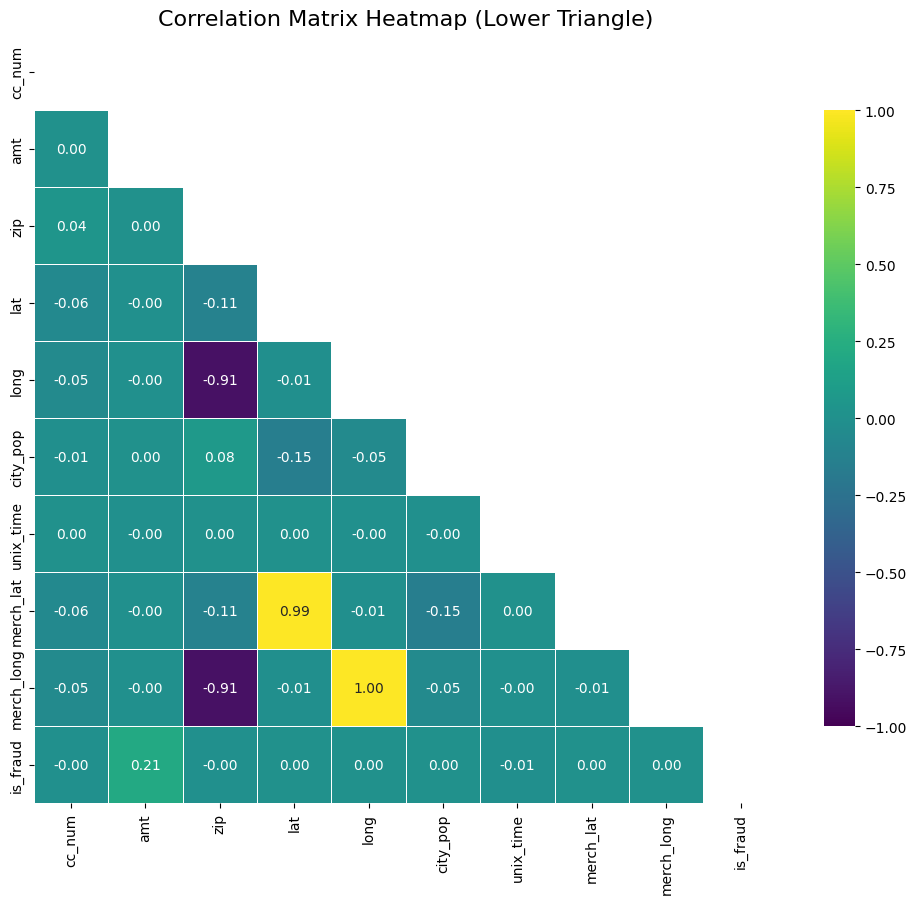

In [ ]:
# Select only the numeric columns for correlation analysis
numeric_data = fraud_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
cor = numeric_data.corr()

# Create a mask to hide the upper triangle of the matrix (since it's redundant)
mask = np.triu(np.ones_like(cor, dtype=bool))

# Set up the figure
plt.figure(figsize=(12, 10))

# Create a heatmap with a mask to show only the lower triangle
sns.heatmap(cor, mask=mask, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5,
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix Heatmap (Lower Triangle)', fontsize=16)
plt.show()

##### **Amt** is positively corelation with **is_fraud**

### **Univariate Analysis on numerical columns**

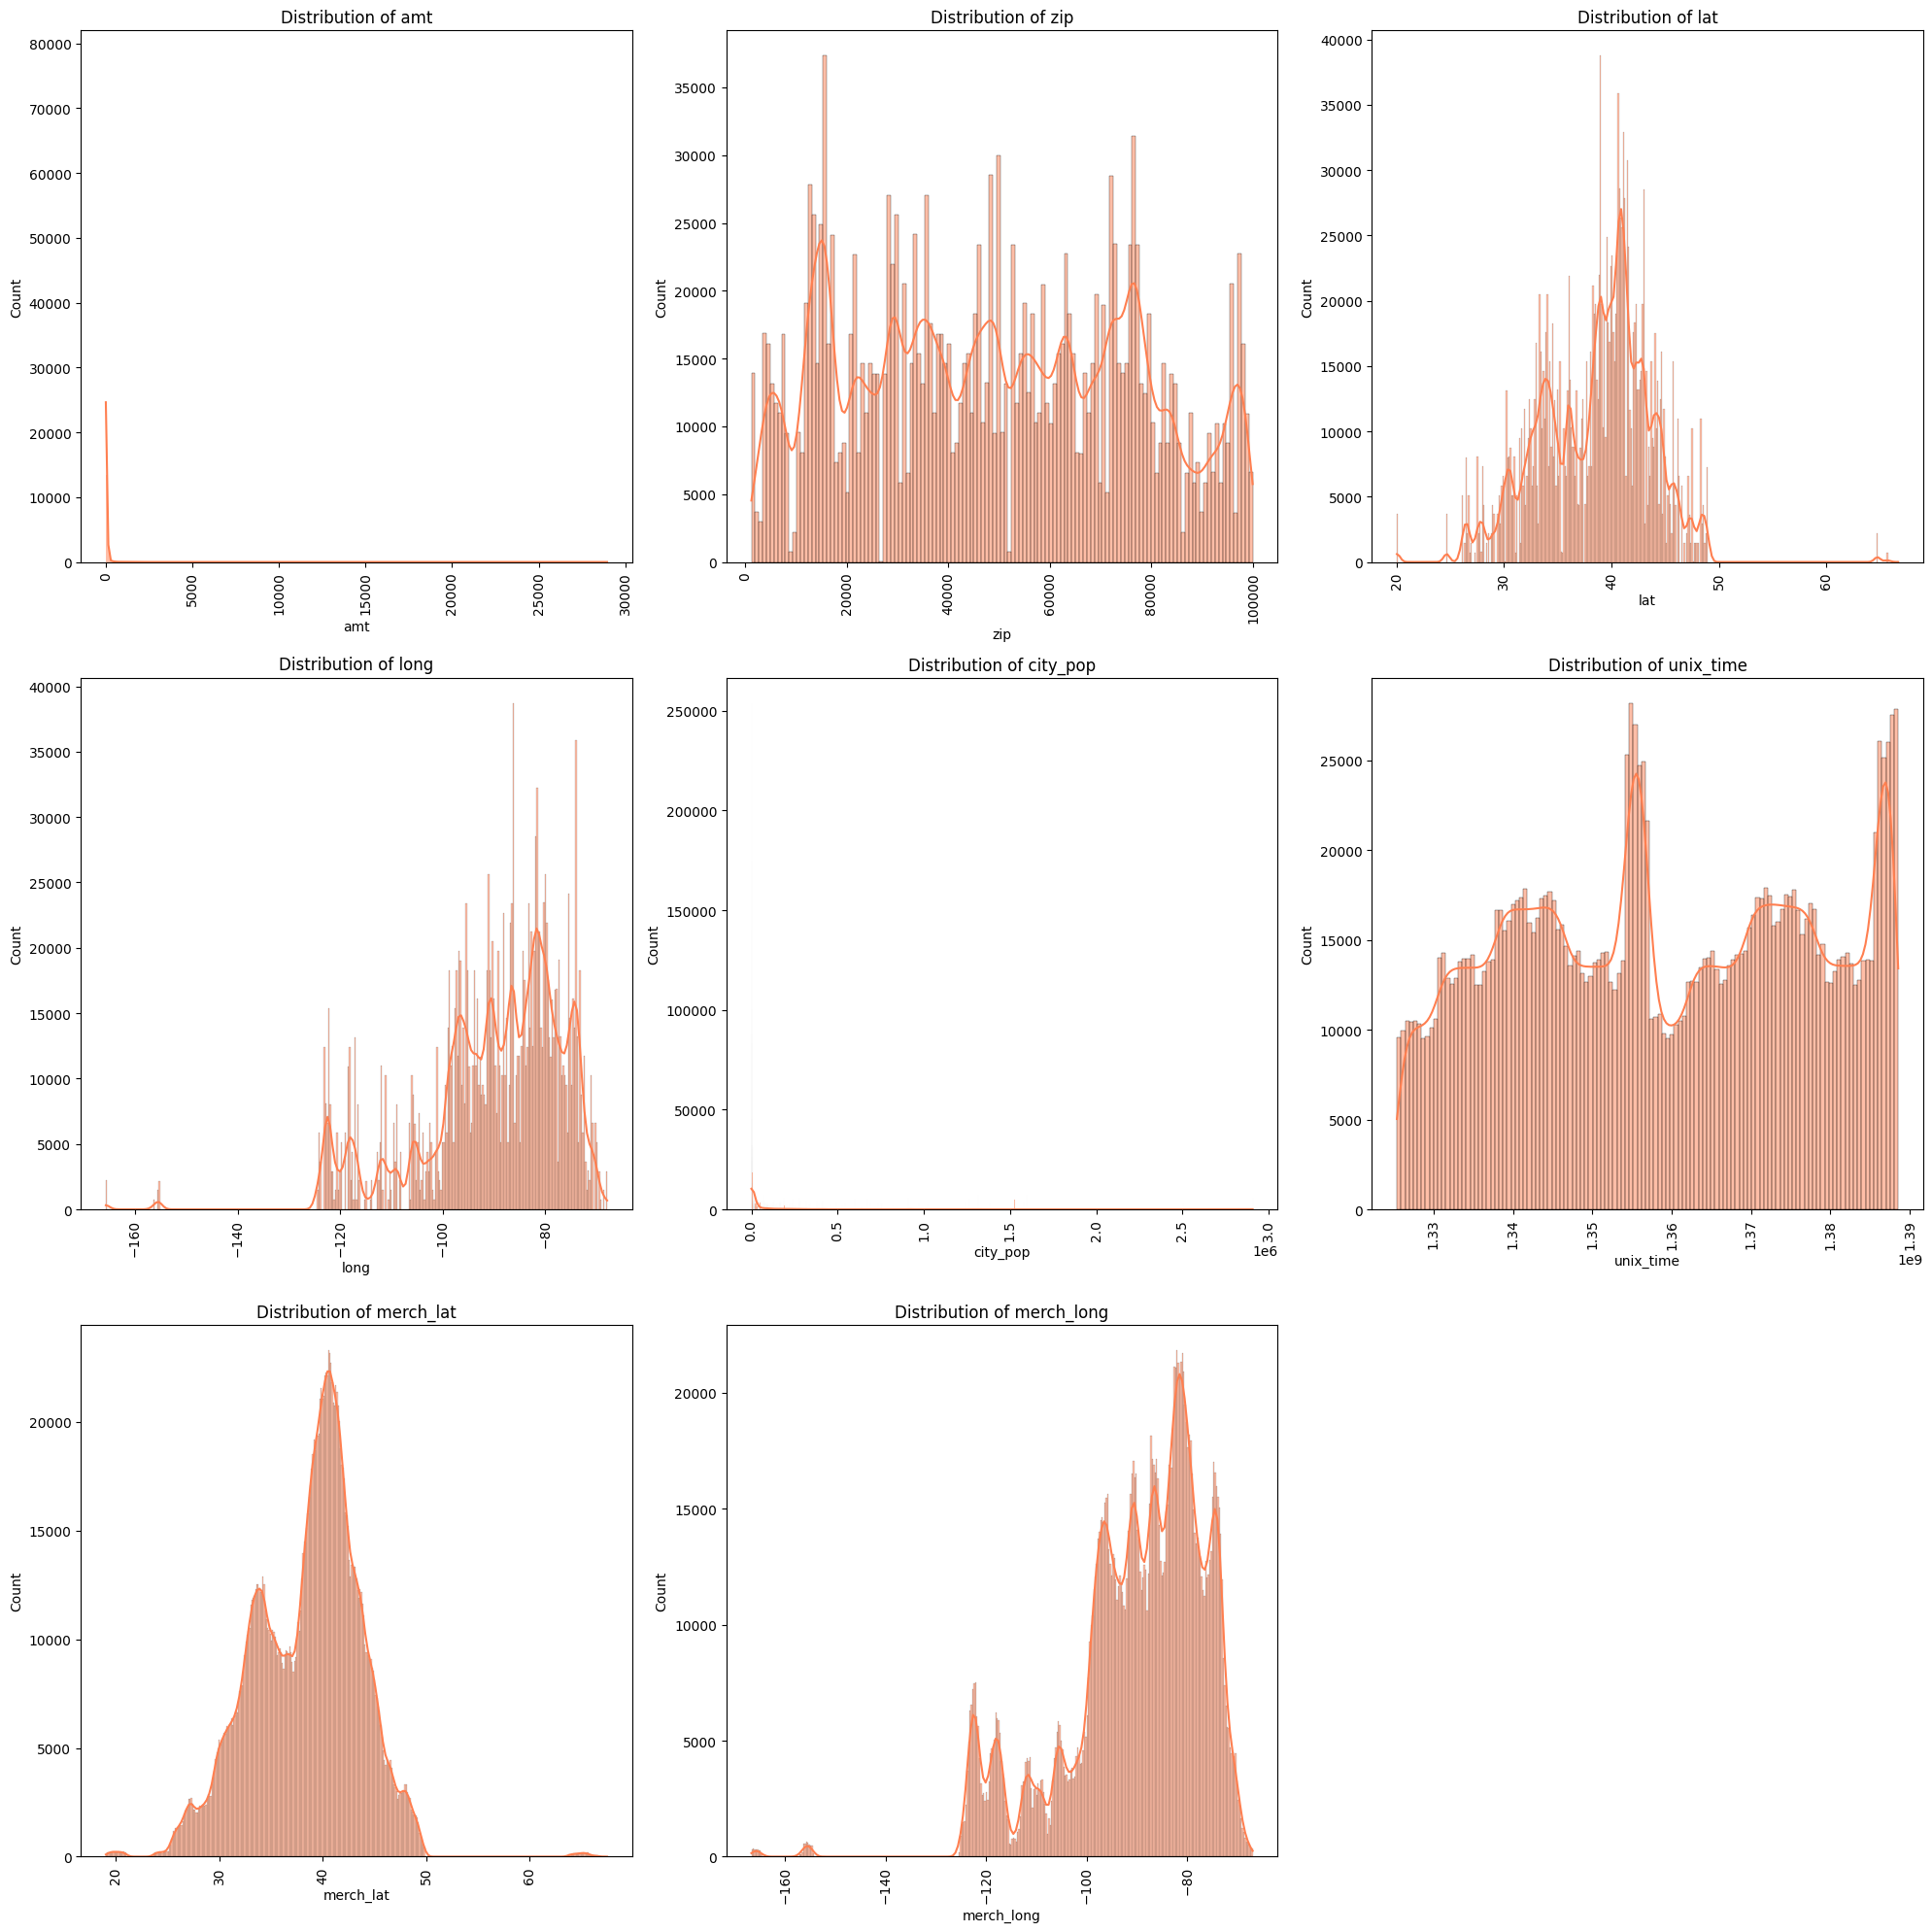

In [ ]:
# List of columns to plot
columns_to_plot = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Set up the figure with 3x3 subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the columns and plot each one
for i, col in enumerate(columns_to_plot):
    sns.histplot(fraud_data[col], ax=axes[i], kde=True, color = 'coral')  # Using sns.histplot with KDE (alternative to sns.distplot)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any unused subplots
for j in range(len(columns_to_plot), 9):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show()

**amt:** The transaction amount distribution is heavily right-skewed, with most transactions being of small amounts and a few very large ones.

**zip:** ZIP codes show a fairly uniform distribution, indicating transactions are spread across various regions.

**lat:** Latitude shows distinct clusters, indicating most transactions occur in specific geographical regions.

**long:** Longitude follows a similar clustered pattern, suggesting transactions are concentrated in certain longitudinal areas.

**city_pop:** The city population distribution is highly skewed toward smaller populations, with fewer transactions in large cities.

**unix_time:** Unix time shows cyclical transaction patterns, indicating regular transaction activity spikes.

**merch_lat:** Merchant latitude also shows clustering, suggesting merchants are concentrated in specific regions.

**merch_long:** Merchant longitude clusters reflect a concentration of merchants in particular geographical areas.



#### **Univariate Analysis of Categorical Variables**

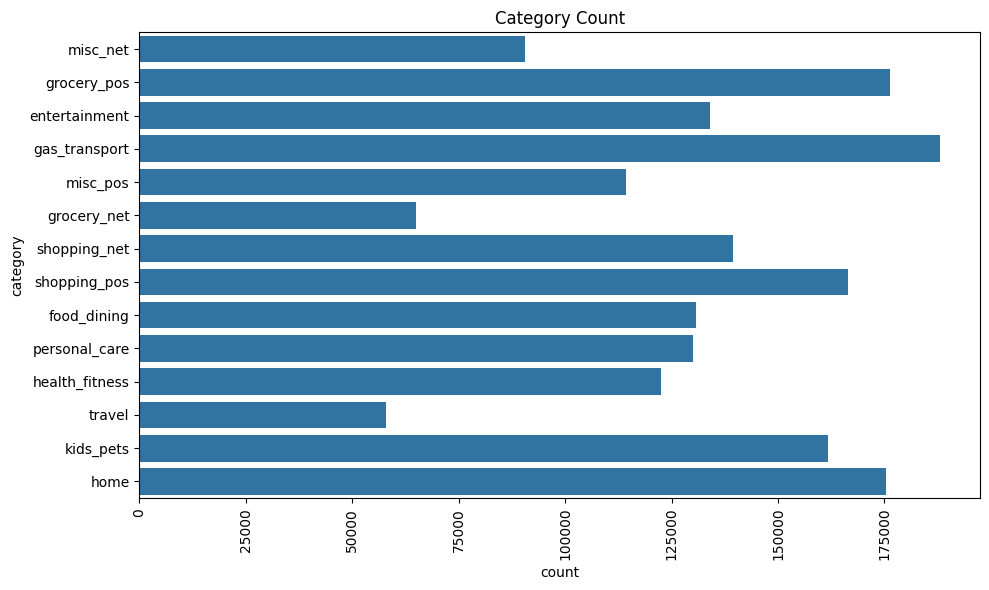

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(fraud_data['category'], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Category Count')
plt.tight_layout()
plt.show()


The most frequent transaction categories are grocery_pos, gas_transport, and shopping_pos, suggesting that point-of-sale transactions dominate the dataset, while online (net) transactions and travel-related expenses are less common.

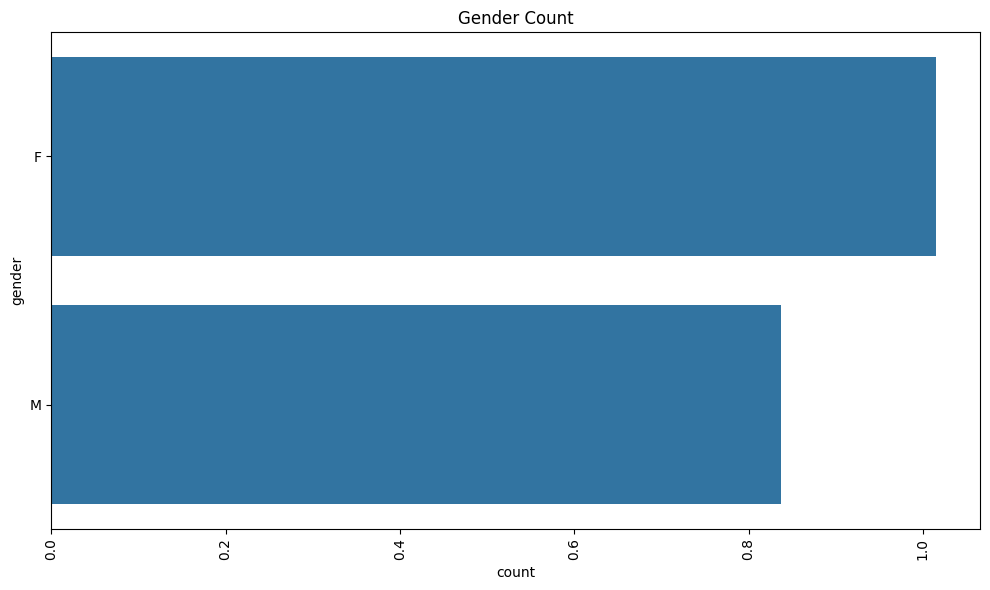

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(fraud_data["gender"], ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Gender Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

The gender distribution in the dataset shows a higher frequency of transactions by females (F) compared to males (M)

The dataset is highly imbalanced, with a significantly larger number of non-fraudulent transactions compared to fraudulent ones, which is typical in fraud detection scenarios.

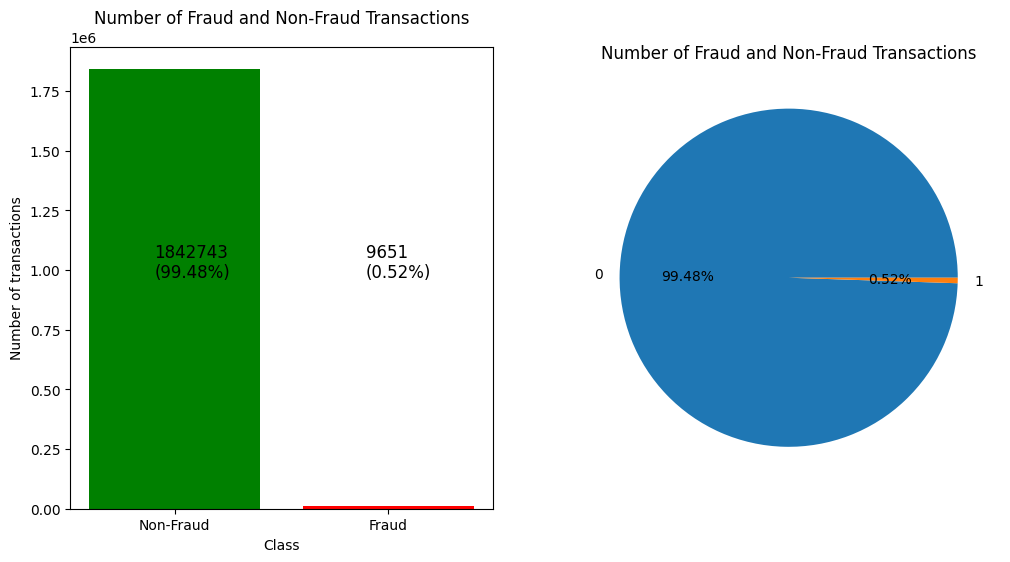

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(12, 6))

# Bar Plot
plt.subplot(1, 2, 1)
plt.bar(['Non-Fraud', 'Fraud'], fraud_data['is_fraud'].value_counts(), color=['g', 'r'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.title('Number of Fraud and Non-Fraud Transactions')
# Add annotations for percentages
non_fraud_count = fraud_data['is_fraud'].value_counts()[0]
fraud_count = fraud_data['is_fraud'].value_counts()[1]
total_count = fraud_data['is_fraud'].count()

non_fraud_percentage = (non_fraud_count / total_count) * 100
fraud_percentage = (fraud_count / total_count) * 100

# Annotating the non-fraud bar
plt.annotate(f'{non_fraud_count}\n({non_fraud_percentage:.4}%)', xy=(0.20, 0.50), xycoords='axes fraction', fontsize=12)

# Annotating the fraud bar
plt.annotate(f'{fraud_count}\n({fraud_percentage:.2}%)', xy=(0.70, 0.50), xycoords='axes fraction', fontsize=12)
# pie-Chart
plt.subplot(1, 2, 2)
fraud_data["is_fraud"].value_counts().plot.pie(autopct = "%1.2f%%")
plt.title("Number of Fraud and Non-Fraud Transactions")
plt.ylabel("")  # Remove y-label
plt.show()
# Show the plots
plt.tight_layout()
plt.show()

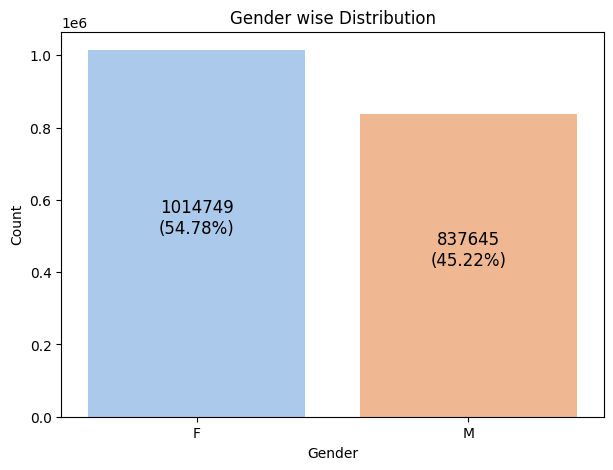

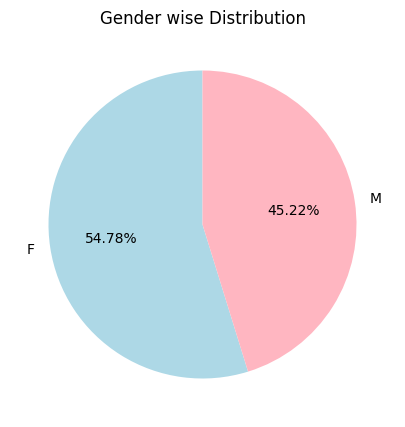

In [ ]:
# volume gender wise
gender_wise = fraud_data['gender'].value_counts()
gender_percentage = fraud_data['gender'].value_counts(normalize=True) * 100  # Percentages
 # Plotting the bar plot for gender distribution
plt.figure(figsize=(7, 5))
sns.barplot(x=gender_wise.index, y=gender_wise.values, palette='pastel')
plt.title('Gender wise Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
for index, (value, percent) in enumerate(zip(gender_wise.values, gender_percentage.values)):
    plt.text(index, value / 2, f'{value}\n({percent:.2f}%)', ha='center', fontsize=12, color='black')
plt.show()

# Plotting the pie chart for gender distribution
plt.figure(figsize=(7, 5))
gender_wise.plot.pie(autopct='%1.2f%%', colors=['lightblue', 'lightpink'], startangle=90)
plt.ylabel('')  # Hide y-label
plt.title('Gender wise Distribution')
plt.show()

Famales are slightly more affected by frauds than males

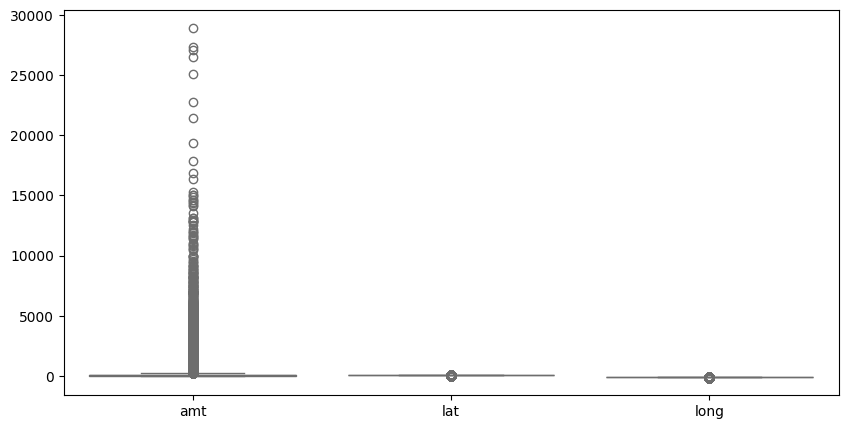

In [ ]:
# Box plot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=fraud_data[['amt', 'lat', 'long']], palette=['skyblue', 'lightgreen', 'salmon'])
plt.show()

The amt feature has a right-skewed distribution with many high-value outliers, which need to be handled for better model performance.
The lat and long features are tightly clustered with no significant outliers, indicating consistent geographic transaction behavior.
Further feature engineering and transformations should focus on making the amt distribution more normal and leveraging geographic features for more insightful analysis.

###### **Multivariate Analysis**

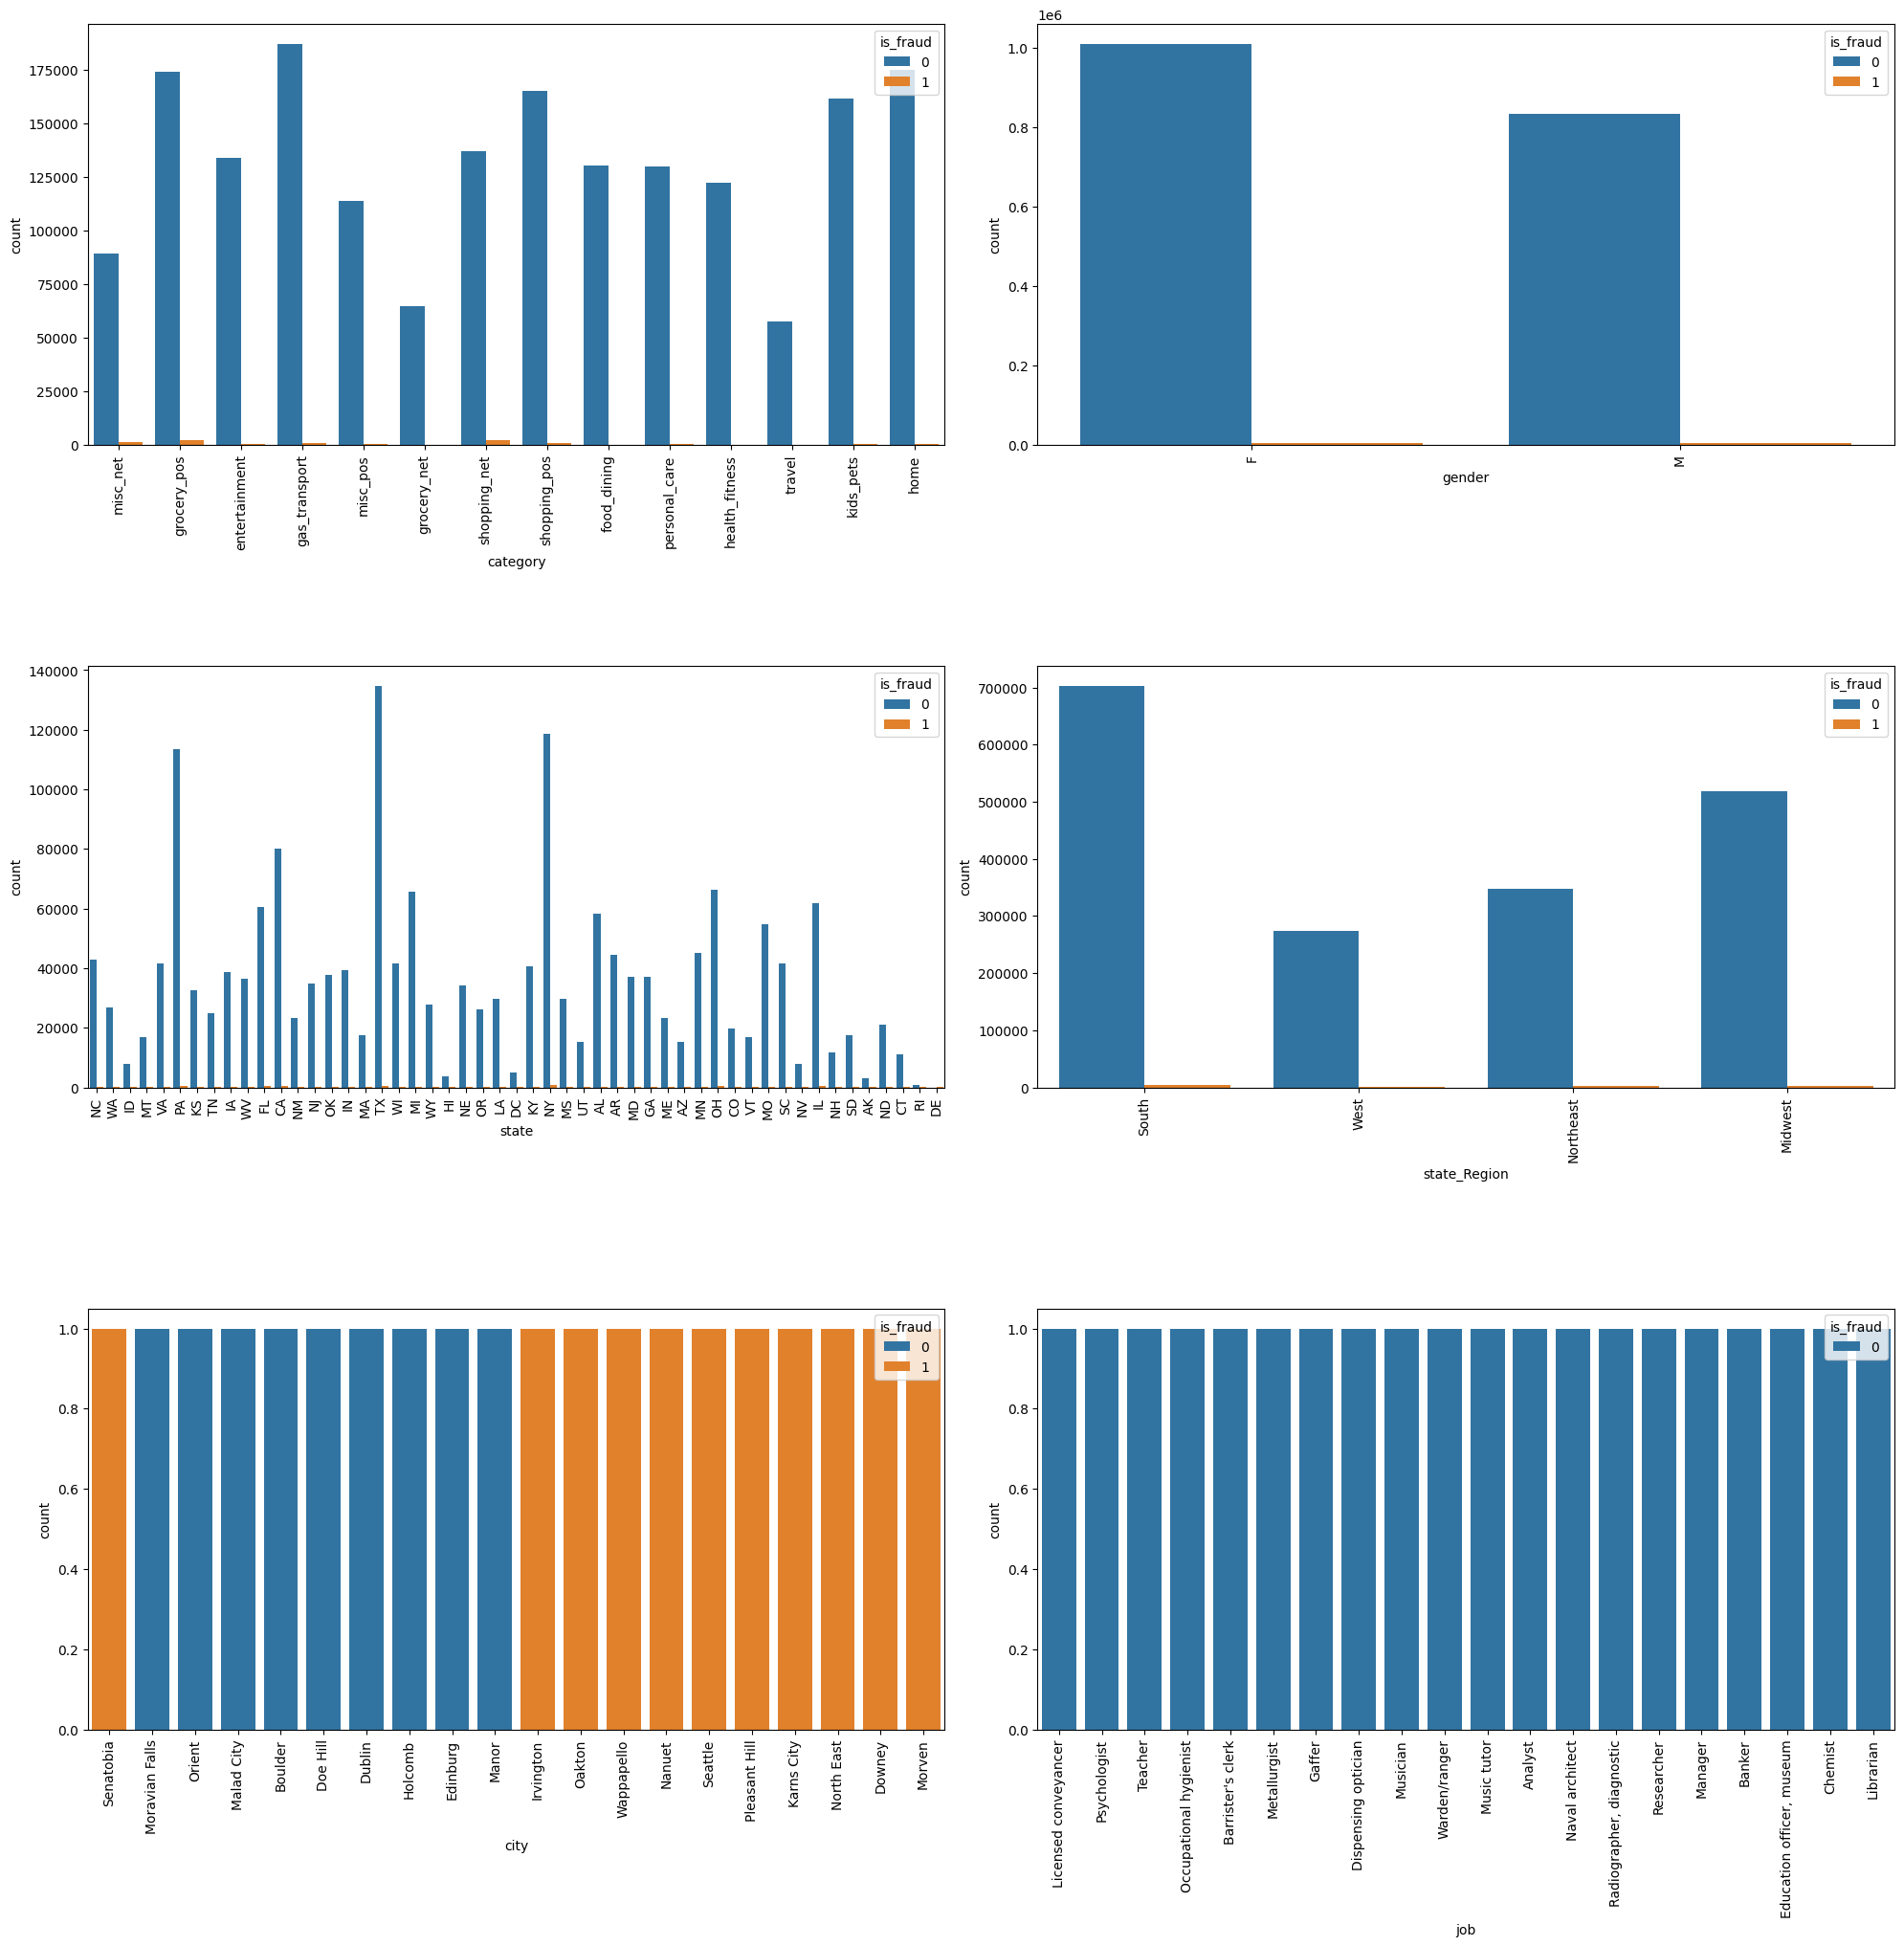

In [ ]:
# Drop duplicates from the city column
fraud_data_clean = fraud_data.drop_duplicates(subset=["city"])
fig= plt.figure(figsize=(20, 25))
plt.subplot(4,2,1)
sns.countplot(x = "category", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(4,2,2)
sns.countplot(x = "gender", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,3)
sns.countplot(x = "state", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)

plt.subplot(4,2,4)
sns.countplot(x = "state_Region", hue = "is_fraud", data = fraud_data)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4, 2, 5)
sns.countplot(x="city", hue="is_fraud", data=fraud_data_clean, order=fraud_data_clean.city.value_counts().iloc[:20].index)
plt.xticks(rotation=90)
fig.tight_layout()

# Clean the job column to remove duplicates for better plotting
fraud_data_clean = fraud_data.drop_duplicates(subset=["job"])

plt.subplot(4, 2, 6)
sns.countplot(x="job", hue="is_fraud", data=fraud_data_clean, order=fraud_data_clean.job.value_counts().iloc[:20].index)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

The above plot shows comparison between the target varibale `is_fraud` and the categorical variables i.e category, gender, state, state_Region,city , and job

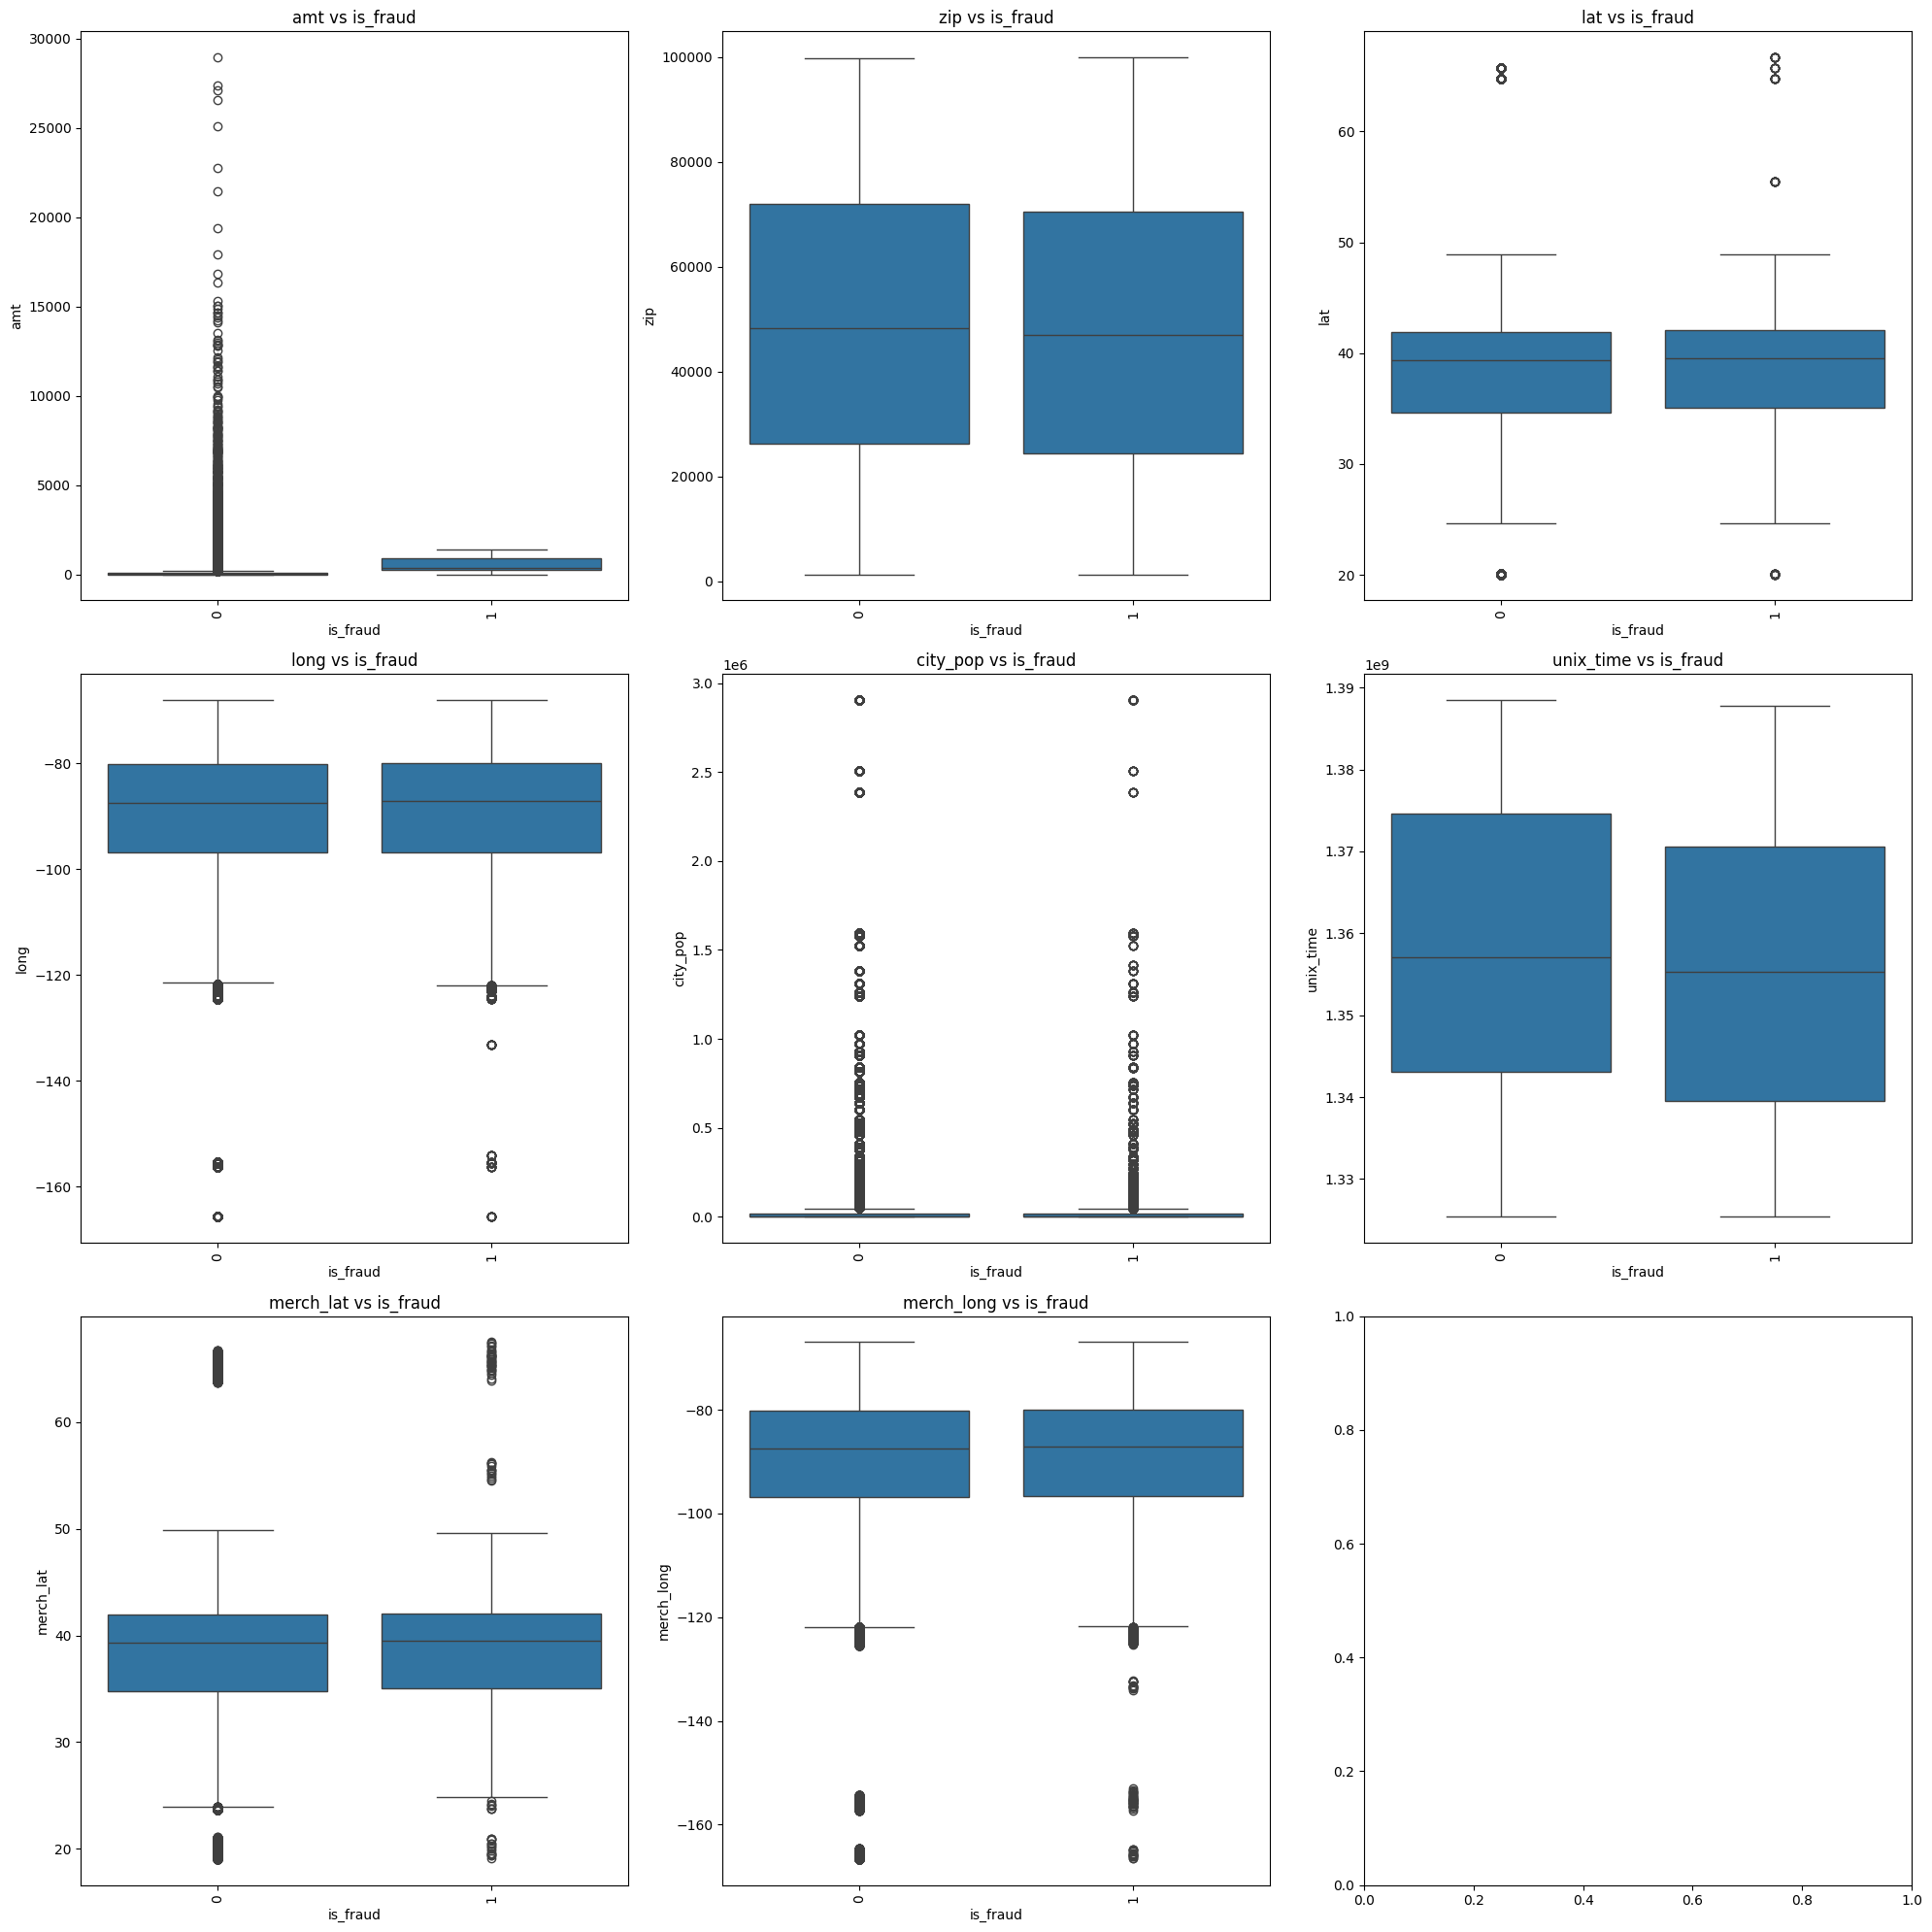

In [ ]:
# List of columns to plot against 'is_fraud'
columns_to_plot = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Create subplots for all the boxplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Iterate over columns and plot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=column, x='is_fraud', data=fraud_data, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].set_title(f'{column} vs is_fraud')

# Adjust the layout
fig.tight_layout()
plt.show()

The boxplots reveal that fraudulent transactions generally exhibit lower amounts (amt) and occur across a wide range of city_pop and geographical variables (lat, long, merch_lat, merch_long)

#### **Data Preparation**

**`age` on transaction day from "dob" variable and binning of age variable**

In [ ]:
# Ensure the 'dob' column is in datetime format
fraud_data["dob"] = pd.to_datetime(fraud_data["dob"])

# Calculate age
fraud_data["age"] = fraud_data["dob"].apply(lambda x: datetime.now().year - x.year)


In [ ]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age  
0         0 2019-01-01   00:00:18        South   36  
1         0 2019-01-01   00:00:44         West   46  
2         0 2019-01-01   00:00:51         West   62  
3         0 2019-01-01   00:01:16         West   57  
4         0 2019-01-01   00:03:06        South   38

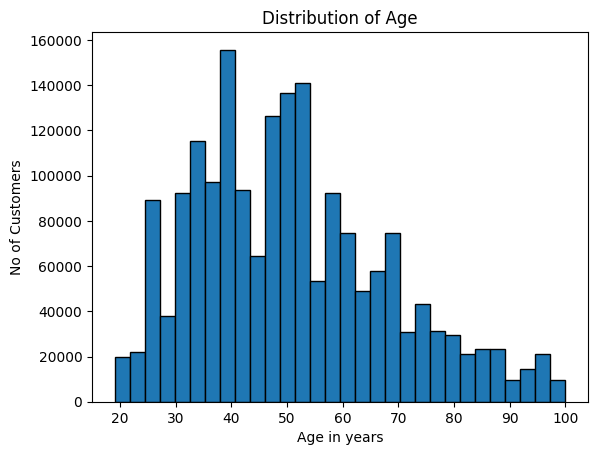

In [ ]:
# Create the histogram using matplotlib
plt.hist(fraud_data['age'], bins=30, edgecolor='black')
# Set labels and title
plt.ylabel('No of Customers')
plt.xlabel('Age in years')
plt.title('Distribution of Age')
# Display the plot
plt.show()

**Inference:** Majority of creditcard holders falls under the age of 30 to 50 years.

#### **Binning of age variable for better insights**

In [ ]:
import numpy as np

# Define a function to manually bin the ages
def bin_age(age):
    if 0 <= age < 20:
        return '0-20'
    elif 20 <= age < 30:
        return '20-30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    elif 50 <= age < 60:
        return '50-60'
    elif 60 <= age < 70:
        return '60-70'
    elif 70 <= age < 80:
        return '70-80'
    elif 80 <= age < 90:
        return '80-90'
    elif 90 <= age <= 100:
        return '90-100'
    else:
        return np.nan

# Apply the function to the 'age' column
fraud_data['age_bin'] = fraud_data['age'].apply(bin_age)

# Display the first few rows of the updated dataframe
fraud_data[['age', 'age_bin']].head()


age age_bin
0   36   30-40
1   46   40-50
2   62   60-70
3   57   50-60
4   38   30-40

In [ ]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  
0         0 2019-01-01   00:00:18        South   36   30-40  
1         0 2019-01-01   00:00:44         West   46   40-50  
2         0 2019-01-01   00:00:51         West   62   60-70  
3         0 2019-01-01   00:01:16         West   57   50-60  
4         0 2019-01-01   00:03:06        South   38   30-40

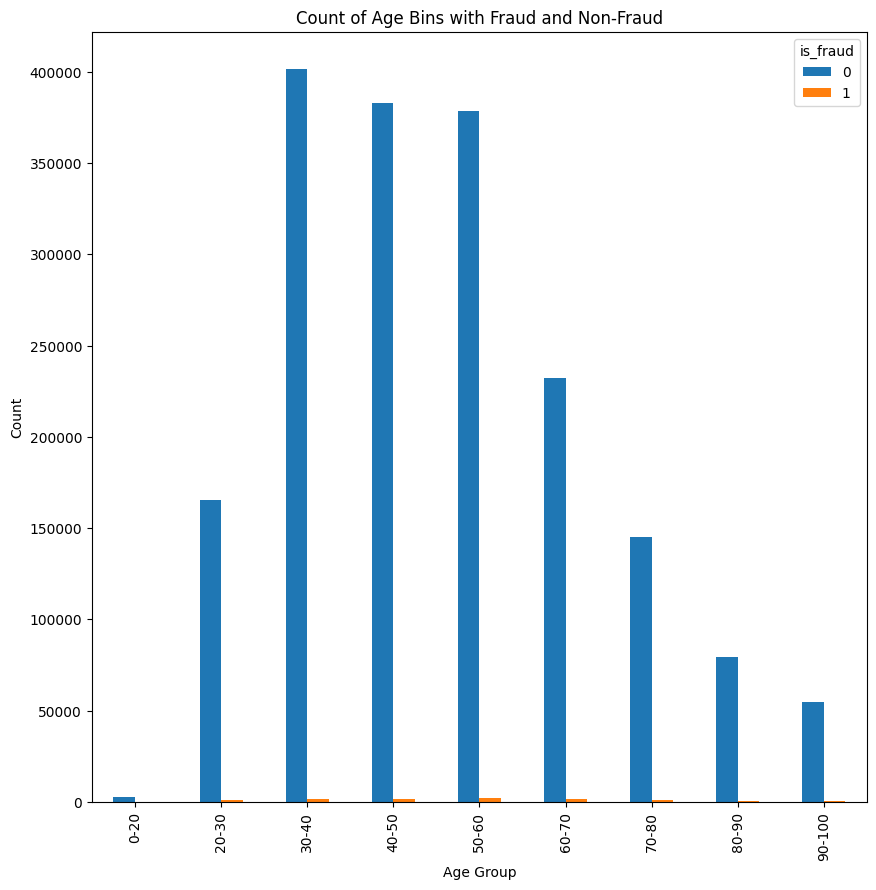

In [ ]:
# Grouping by age_bin and is_fraud to count occurrences
age_bin_fraud_counts = fraud_data.groupby(['age_bin', 'is_fraud']).size().unstack()

# Create the figure
plt.figure(figsize=(10, 10))

# Plot the counts as a bar chart
age_bin_fraud_counts.plot(kind='bar', stacked=False, ax=plt.gca())

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Age Bins with Fraud and Non-Fraud')

# Display the plot
plt.show()


#### **Inference:-**
- From the above graph we can infer that majority of the credit card holders belongs to the age of 30 to 50 years.
- The age of the credit card holders where fraudulent transactions took place mostly belongs to the age of 20 to 70 years.

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   city                   object        
 7   state                  object        
 8   zip                    int64         
 9   lat                    float64       
 10  long                   float64       
 11  city_pop               int64         
 12  job                    object        
 13  dob                    datetime64[ns]
 14  trans_num              object        
 15  unix_time              int64         
 16  merch_lat              float64       
 17  merch_long             float64       
 18  is_fraud               int64

In [ ]:
fraud_data = fraud_data.assign(
    trans_Year = fraud_data.trans_Date.dt.year,
    trans_year_month = fraud_data.trans_Date.dt.to_period('M'),
    trans_Month = fraud_data.trans_Date.dt.month,
    trans_Hour = fraud_data.trans_date_trans_time.dt.hour,
    trans_Day = fraud_data.trans_Date.dt.day,
    trans_weekday = fraud_data.trans_Date.dt.day_name())

fraud_data

trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:00:51    38859492057661   
3        2019-01-01 00:01:16  3534093764340240   
4        2019-01-01 00:03:06   375534208663984   
...                      ...               ...   
555714   2020-12-31 23:59:07    30560609640617   
555715   2020-12-31 23:59:09  3556613125071656   
555716   2020-12-31 23:59:15  6011724471098086   
555717   2020-12-31 23:59:24     4079773899158   
555718   2020-12-31 23:59:34  4170689372027579   

                                  merchant        category     amt gender  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97      F   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23      F   
2                     fraud_Lind-Buckridge   entertainment  220.11      M   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00      M   
4                      fraud_Keeling-Crist        misc_pos   41.96      M   
...                                    ...             ...     ...    ...   
555714               fraud_Reilly and Sons  health_fitness   43.77      M   
555715                fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                     fraud_Rau-Robel       kids_pets   86.88      F   
555717               fraud_Breitenberg LLC          travel    7.99      M   
555718                   fraud_Dare-Marvin   entertainment   38.13      M   

                  city state    zip      lat      long  city_pop  \
0       Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1               Orient    WA  99160  48.8878 -118.2105       149   
2           Malad City    ID  83252  42.1808 -112.2620      4154   
3              Boulder    MT  59632  46.2306 -112.1138      1939   
4             Doe Hill    VA  24433  38.4207  -79.4629        99   
...                ...   ...    ...      ...       ...       ...   
555714           Luray    MO  63453  40.4931  -91.8912       519   
555715    Lake Jackson    TX  77566  29.0393  -95.4401     28739   
555716         Burbank    WA  99323  46.1966 -118.9017      3684   
555717            Mesa    ID  83643  44.6255 -116.4493       129   
555718          Edmond    OK  73034  35.6665  -97.4798    116001   

                   job        dob                         trans_num  \
0         Psychologist 1988-03-09  0b242abb623afc578575680df30655b9   
1              Teacher 1978-06-21  1f76529f8574734946361c461b024d99   
2              Officer 1962-01-19  a1a22d70485983eac12b5b88dad1cf95   
3               OTHERS 1967-01-12  6b849c168bdad6f867558c3793159a81   
4            Therapist 1986-03-28  a41d7549acf90789359a9aa5346dcb46   
...                ...        ...                               ...   
555714    Town planner 1966-02-13  9b1f753c79894c9f4b71f04581835ada   
555715  Futures trader 1999-12-27  2090647dac2c89a1d86c514c427f5b91   
555716        Musician 1981-11-29  6c5b7c8add471975aa0fec023b2e8408   
555717          OTHERS 1965-12-15  14392d723bb7737606b2700ac791b7aa   
555718           Buyer 1993-05-10  1765bb45b3aa3224b4cdcb6e7a96cee3   

         unix_time  merch_lat  merch_long  is_fraud trans_Date trans_Time  \
0       1325376018  36.011293  -82.048315         0 2019-01-01   00:00:18   
1       1325376044  49.159047 -118.186462         0 2019-01-01   00:00:44   
2       1325376051  43.150704 -112.154481         0 2019-01-01   00:00:51   
3       1325376076  47.034331 -112.561071         0 2019-01-01   00:01:16   
4       1325376186  38.674999  -78.632459         0 2019-01-01   00:03:06   
...            ...        ...         ...       ...        ...        ...   
555714  1388534347  39.946837  -91.333331         0 2020-12-31   23:59:07   
555715  1388534349  29.661049  -96.186633         0 2020-12-31   23:59:09   
555716  1388534355  46.658340 -119.715054         0 2020-12-31   23:59:15   
555717  1388534364  44.470525 -117.080888

In [ ]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday  
0          2019-01            1           0          1       Tuesday  
1          2019-01            1           0          1       Tuesday  
2          2019-01            1           0          1       Tuesday  
3          2019-01            1           0          1       Tuesday  
4          2019-01            1           0          1       Tuesday

`trans_Year`, `trans_year_month`, `trans_Month`, `trans_Hour`, `trans_Day`, `trans_weekday` of transaction  are derived from trans_date_trans_time variable

In [ ]:
from math import radians, cos, sin, asin, sqrt, atan2

def haversine_distance(lat, long, merch_lat, merch_long):
    # Convert degrees to radians
    long, merch_long = radians(long), radians(merch_long)
    lat, merch_lat = radians(lat), radians(merch_lat)

    # Haversine formula
    dlon = merch_long - long
    dlat = merch_lat - lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(merch_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Radius of Earth in kilometers
    r = 6371
    # Calculate the result
    d = c * r
    return round(d, 2)


In [ ]:
fraud_data['dist'] = fraud_data.apply(lambda row: haversine_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  
0          2019-01            1           0          1       Tuesday   78.60  
1          2019-01            1           0          1       Tuesday   30.21  
2          2019-01            1           0          1       Tuesday  108.21  
3          2019-01            1           0          1       Tuesday   95.67  
4          2019-01            1           0          1       Tuesday   77.56

In [ ]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  
0          2019-01            1           0          1       Tuesday   78.60  
1          2019-01            1           0          1       Tuesday   30.21  
2          2019-01            1           0          1       Tuesday  108.21  
3          2019-01            1           0          1       Tuesday   95.67  
4          2019-01            1           0          1       Tuesday   77.56

**`dis` i.e. distance between credit card lat, long to merchant lat and long is derived**

In [ ]:
# Get previous merchant latitude and longitude
grp_by_cc = fraud_data.groupby('cc_num')
fraud_data['prev_merch_lat'] = grp_by_cc['merch_lat'].shift(1).fillna(fraud_data['merch_lat'])
fraud_data['prev_merch_long'] = grp_by_cc['merch_long'].shift(1).fillna(fraud_data['merch_long'])

# Time since the previous transaction in hours
fraud_data['time_since_prev_transaction'] = grp_by_cc['trans_Hour'].diff().fillna(0).round(1)

In [ ]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  
0       36.011293       -82.048315                          0.0  
1       49.159047      -118.186462                          0.0  
2       43.150704      -112.154481                          0.0  
3       47.034331      -112.561071                          0.0  
4       38.674999       -78.632459                          0.0

In [ ]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  
0       36.011293       -82.048315                          0.0  
1       49.159047      -118.186462                          0.0  
2       43.150704      -112.154481                          0.0  
3       47.034331      -112.561071                          0.0  
4       38.674999       -78.632459                          0.0

In [ ]:
fraud_data['distance_between_merchants'] = fraud_data.apply(
    lambda row: haversine_distance(row['prev_merch_lat'], row['prev_merch_long'], row['merch_lat'], row['merch_long']),
    axis=1)


In [ ]:
fraud_data.head(100)

trans_date_trans_time               cc_num  \
0    2019-01-01 00:00:18     2703186189652095   
1    2019-01-01 00:00:44         630423337322   
2    2019-01-01 00:00:51       38859492057661   
3    2019-01-01 00:01:16     3534093764340240   
4    2019-01-01 00:03:06      375534208663984   
5    2019-01-01 00:04:08     4767265376804500   
6    2019-01-01 00:04:42       30074693890476   
7    2019-01-01 00:05:08     6011360759745864   
8    2019-01-01 00:05:18     4922710831011201   
9    2019-01-01 00:06:01     2720830304681674   
10   2019-01-01 00:06:23        4642894980163   
11   2019-01-01 00:06:53      377234009633447   
12   2019-01-01 00:06:56      180042946491150   
13   2019-01-01 00:07:27     5559857416065248   
14   2019-01-01 00:09:03     3514865930894695   
15   2019-01-01 00:09:20     6011999606625827   
16   2019-01-01 00:10:49     6011860238257910   
17   2019-01-01 00:10:58     3565423334076143   
18   2019-01-01 00:11:14     2348245054386329   
19   2019-01-01 00:12:34  4956828990005111019   
20   2019-01-01 00:13:08  4469777115158234880   
21   2019-01-01 00:14:37     2305336922781618   
22   2019-01-01 00:17:16      180048185037117   
23   2019-01-01 00:17:40         630441765090   
24   2019-01-01 00:18:06  4428780983793657331   
25   2019-01-01 00:18:07      343464013864032   
26   2019-01-01 00:20:15      374930071163758   
27   2019-01-01 00:21:32     4334230547694630   
28   2019-01-01 00:22:06  4225990116481262579   
29   2019-01-01 00:22:18     4260059589824237   
30   2019-01-01 00:22:36      180094608895855   
31   2019-01-01 00:22:39  4599735407877245080   
32   2019-01-01 00:22:44         630412733309   
33   2019-01-01 00:23:41     2712209726293386   
34   2019-01-01 00:23:58      374125201044065   
35   2019-01-01 00:25:46      349612764943496   
36   2019-01-01 00:26:22     3598215285024754   
37   2019-01-01 00:27:45      213141712584544   
38   2019-01-01 00:27:56       30561214688470   
39   2019-01-01 00:29:11     4789911625179723   
40   2019-01-01 00:30:49         676372984911   
41   2019-01-01 00:31:01       30011465039817   
42   2019-01-01 00:31:51     4642255475285942   
43   2019-01-01 00:32:15       30074693890476   
44   2019-01-01 00:32:15      180067784565096   
45   2019-01-01 00:32:47      213126662687660   
46   2019-01-01 00:33:51     2266735643685262   
47   2019-01-01 00:34:10     3553629419254918   
48   2019-01-01 00:36:12     3511058278399773   
49   2019-01-01 00:36:58  4110266553600176127   
50   2019-01-01 00:37:18     4265776278887457   
51   2019-01-01 00:39:22     3583793405872580   
52   2019-01-01 00:39:37      213193596103206   
53   2019-01-01 00:39:43          60495593109   
54   2019-01-01 00:40:44  4725837176265195730   
55   2019-01-01 00:40:48       30404291151692   
56   2019-01-01 00:40:50      213178850083780   
57   2019-01-01 00:40:58     2356276337669917   
58   2019-01-01 00:41:43     3568736585751727   
59   2019-01-01 00:41:45     4642255475285942   
60   2019-01-01 00:42:26     4509142395811241   
61   2019-01-01 00:43:38     3547560454237873   
62   2019-01-01 00:44:20     4433091568498503   
63   2019-01-01 00:44:43     2720433095629877   
64   2019-01-01 00:45:13     4716561796955522   
65   2019-01-01 00:46:18     3536918668124647   
66   2019-01-01 00:47:55     3525668150756629   
67   2019-01-01 00:48:09     4707867759656333   
68   2019-01-01 00:49:25  4666314527820883145   
69   2019-01-01 00:49:31     2248735346244816   
70   2019-01-01 00:50:53  4512828414983801773   
71   2019-01-01 00:52:57     3501509250702469   
72   2019-01-01 00:55:05       30273037698427   
73   2019-01-01 00:56:12     3558881852140592   
74   2019-01-01 00:56:44       30487648872433   
75   2019-01-01 00:56:59         571465035400   
76   2019-01-01 00:57:17      378006354724784   
77   2019-01-01 00:57:30      341283058448499   
78   2019-01-01 00:58:02        4481131401752   
79   2019-01-01 00:58:53        4687263141103   
80   2019-01-01 00:59:25     54567

**`distance_between_merchants` calculated as distance between current and previous purchase location**

##### `30 Day Orders Amt Avg by Customers`,`24 Hours Orders Amt Avg by Customers`, `
calculating the moving avearge of previous 10 transactions and then calculatig the avearge of the amt, amt_by_moving_avearge will help in deciding the bar , where after that fraud alarm will be sent to the customers

In [ ]:
df = fraud_data.copy()
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

In [ ]:
# Set the index as 'trans_date_trans_time' and convert it to datetime
df = df.set_index(pd.to_datetime(df['trans_date_trans_time']))

# Rename the index using a different method
df.index.name = 'Time_Index'

# Sort the DataFrame based on the index
df = df.sort_index()

# Preview the DataFrame
df.head()

trans_date_trans_time            cc_num  \
Time_Index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
Time_Index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt gender            city state    zip      lat  \
Time_Index                                                                 
2019-01-01 00:00:18    4.97      F  Moravian Falls    NC  28654  36.0788   
2019-01-01 00:00:44  107.23      F          Orient    WA  99160  48.8878   
2019-01-01 00:00:51  220.11      M      Malad City    ID  83252  42.1808   
2019-01-01 00:01:16   45.00      M         Boulder    MT  59632  46.2306   
2019-01-01 00:03:06   41.96      M        Doe Hill    VA  24433  38.4207   

                         long  city_pop           job        dob  \
Time_Index                                                         
2019-01-01 00:00:18  -81.1781      3495  Psychologist 1988-03-09   
2019-01-01 00:00:44 -118.2105       149       Teacher 1978-06-21   
2019-01-01 00:00:51 -112.2620      4154       Officer 1962-01-19   
2019-01-01 00:01:16 -112.1138      1939        OTHERS 1967-01-12   
2019-01-01 00:03:06  -79.4629        99     Therapist 1986-03-28   

                                            trans_num   unix_time  merch_lat  \
Time_Index                                                                     
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9  1325376018  36.011293   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   

                     merch_long  is_fraud trans_Date trans_Time state_Region  \
Time_Index                                                                     
2019-01-01 00:00:18  -82.048315         0 2019-01-01   00:00:18        South   
2019-01-01 00:00:44 -118.186462         0 2019-01-01   00:00:44         West   
2019-01-01 00:00:51 -112.154481         0 2019-01-01   00:00:51         West   
2019-01-01 00:01:16 -112.561071         0 2019-01-01   00:01:16         West   
2019-01-01 00:03:06  -78.632459         0 2019-01-01   00:03:06        South   

                     age age_bin  trans_Year trans_year_month  trans_Month  \
Time_Index                                                                   
2019-01-01 00:00:18   36   30-40        2019          2019-01            1   
2019-01-01 00:00:44   46   40-50        2019          2019-01            1   
2019-01-01 00:00:51   62   60-70        2019          2019-01            1   
2019-01-01 00:01:16   57   50-60        2019          2019-01            1   
2019-01-01 00:03:06   38   30-40        2019          2019-01            1   

                     trans_Hour  trans_Day trans_weekday    dist  \
Time_Index                                                         
2019-01-01 00:00:18           0          1       Tuesday   78.60   
2019-01-01 00:00:44           0          1       Tuesday   30.21   
2019-01-01 00:00:51           0          1       Tuesday  108.21   
2019-01-01 00:01:16           0         

In [ ]:
df['val_for_agg'] = 1
df.head()

trans_date_trans_time            cc_num  \
Time_Index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
Time_Index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt gender            city state    zip      lat  \
Time_Index                                                                 
2019-01-01 00:00:18    4.97      F  Moravian Falls    NC  28654  36.0788   
2019-01-01 00:00:44  107.23      F          Orient    WA  99160  48.8878   
2019-01-01 00:00:51  220.11      M      Malad City    ID  83252  42.1808   
2019-01-01 00:01:16   45.00      M         Boulder    MT  59632  46.2306   
2019-01-01 00:03:06   41.96      M        Doe Hill    VA  24433  38.4207   

                         long  city_pop           job        dob  \
Time_Index                                                         
2019-01-01 00:00:18  -81.1781      3495  Psychologist 1988-03-09   
2019-01-01 00:00:44 -118.2105       149       Teacher 1978-06-21   
2019-01-01 00:00:51 -112.2620      4154       Officer 1962-01-19   
2019-01-01 00:01:16 -112.1138      1939        OTHERS 1967-01-12   
2019-01-01 00:03:06  -79.4629        99     Therapist 1986-03-28   

                                            trans_num   unix_time  merch_lat  \
Time_Index                                                                     
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9  1325376018  36.011293   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   

                     merch_long  is_fraud trans_Date trans_Time state_Region  \
Time_Index                                                                     
2019-01-01 00:00:18  -82.048315         0 2019-01-01   00:00:18        South   
2019-01-01 00:00:44 -118.186462         0 2019-01-01   00:00:44         West   
2019-01-01 00:00:51 -112.154481         0 2019-01-01   00:00:51         West   
2019-01-01 00:01:16 -112.561071         0 2019-01-01   00:01:16         West   
2019-01-01 00:03:06  -78.632459         0 2019-01-01   00:03:06        South   

                     age age_bin  trans_Year trans_year_month  trans_Month  \
Time_Index                                                                   
2019-01-01 00:00:18   36   30-40        2019          2019-01            1   
2019-01-01 00:00:44   46   40-50        2019          2019-01            1   
2019-01-01 00:00:51   62   60-70        2019          2019-01            1   
2019-01-01 00:01:16   57   50-60        2019          2019-01            1   
2019-01-01 00:03:06   38   30-40        2019          2019-01            1   

                     trans_Hour  trans_Day trans_weekday    dist  \
Time_Index                                                         
2019-01-01 00:00:18           0          1       Tuesday   78.60   
2019-01-01 00:00:44           0          1       Tuesday   30.21   
2019-01-01 00:00:51           0          1       Tuesday  108.21   
2019-01-01 00:01:16           0         

In [ ]:
df_hist_trans_30d = (
    df.groupby('cc_num')['val_for_agg']
    .rolling('30D')
    .count()
    .shift()
    .reset_index()
    .fillna(0)
)
# Renaming the columns using the rename method
df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']

In [ ]:
df_hist_trans_30d.head()

cc_num trans_date_trans_time  hist_trans_30d
0  60416207185   2019-01-01 12:47:15             0.0
1  60416207185   2019-01-02 08:44:57             1.0
2  60416207185   2019-01-02 08:47:36             2.0
3  60416207185   2019-01-02 12:38:14             3.0
4  60416207185   2019-01-02 13:10:46             4.0

In [ ]:
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()

##### **Transactions in past 30 days on respective credit card**



In [ ]:
df_hist_trans_24H = (
    df.groupby('cc_num')['val_for_agg']
    .rolling('24H')
    .count()
    .shift()
    .reset_index()
    .fillna(0)
)
# Renaming the columns using the rename method
df_hist_trans_24H.columns = ['cc_num','trans_date_trans_time','hist_trans_24H']
df_hist_trans_24H = df_hist_trans_24H.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24H'].min().reset_index()

In [ ]:
df_hist_trans_24H.head()

cc_num trans_date_trans_time  hist_trans_24H
0  60416207185   2019-01-01 12:47:15             0.0
1  60416207185   2019-01-02 08:44:57             1.0
2  60416207185   2019-01-02 08:47:36             2.0
3  60416207185   2019-01-02 12:38:14             3.0
4  60416207185   2019-01-02 13:10:46             4.0

##### **Transactions in past 24 hours on respective credit card**

In [ ]:
df.head()

trans_date_trans_time            cc_num  \
Time_Index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
Time_Index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt gender            city state    zip      lat  \
Time_Index                                                                 
2019-01-01 00:00:18    4.97      F  Moravian Falls    NC  28654  36.0788   
2019-01-01 00:00:44  107.23      F          Orient    WA  99160  48.8878   
2019-01-01 00:00:51  220.11      M      Malad City    ID  83252  42.1808   
2019-01-01 00:01:16   45.00      M         Boulder    MT  59632  46.2306   
2019-01-01 00:03:06   41.96      M        Doe Hill    VA  24433  38.4207   

                         long  city_pop           job        dob  \
Time_Index                                                         
2019-01-01 00:00:18  -81.1781      3495  Psychologist 1988-03-09   
2019-01-01 00:00:44 -118.2105       149       Teacher 1978-06-21   
2019-01-01 00:00:51 -112.2620      4154       Officer 1962-01-19   
2019-01-01 00:01:16 -112.1138      1939        OTHERS 1967-01-12   
2019-01-01 00:03:06  -79.4629        99     Therapist 1986-03-28   

                                            trans_num   unix_time  merch_lat  \
Time_Index                                                                     
2019-01-01 00:00:18  0b242abb623afc578575680df30655b9  1325376018  36.011293   
2019-01-01 00:00:44  1f76529f8574734946361c461b024d99  1325376044  49.159047   
2019-01-01 00:00:51  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704   
2019-01-01 00:01:16  6b849c168bdad6f867558c3793159a81  1325376076  47.034331   
2019-01-01 00:03:06  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999   

                     merch_long  is_fraud trans_Date trans_Time state_Region  \
Time_Index                                                                     
2019-01-01 00:00:18  -82.048315         0 2019-01-01   00:00:18        South   
2019-01-01 00:00:44 -118.186462         0 2019-01-01   00:00:44         West   
2019-01-01 00:00:51 -112.154481         0 2019-01-01   00:00:51         West   
2019-01-01 00:01:16 -112.561071         0 2019-01-01   00:01:16         West   
2019-01-01 00:03:06  -78.632459         0 2019-01-01   00:03:06        South   

                     age age_bin  trans_Year trans_year_month  trans_Month  \
Time_Index                                                                   
2019-01-01 00:00:18   36   30-40        2019          2019-01            1   
2019-01-01 00:00:44   46   40-50        2019          2019-01            1   
2019-01-01 00:00:51   62   60-70        2019          2019-01            1   
2019-01-01 00:01:16   57   50-60        2019          2019-01            1   
2019-01-01 00:03:06   38   30-40        2019          2019-01            1   

                     trans_Hour  trans_Day trans_weekday    dist  \
Time_Index                                                         
2019-01-01 00:00:18           0          1       Tuesday   78.60   
2019-01-01 00:00:44           0          1       Tuesday   30.21   
2019-01-01 00:00:51           0          1       Tuesday  108.21   
2019-01-01 00:01:16           0         

In [ ]:
df_hist_trans_amt_avg_30d = \
    df \
    .groupby(['cc_num'])['amt']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_30d']

In [ ]:
df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num','trans_date_trans_time'])\
['hist_trans_avg_amt_30d'].min().reset_index()

In [ ]:
df_hist_trans_amt_avg_30d.head()

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
0  60416207185   2019-01-01 12:47:15                   0.000
1  60416207185   2019-01-02 08:44:57                   7.270
2  60416207185   2019-01-02 08:47:36                  30.105
3  60416207185   2019-01-02 12:38:14                  47.430
4  60416207185   2019-01-02 13:10:46                  44.270

##### **Average order value on card in 30days is calculated**

In [ ]:
print(df_hist_trans_amt_avg_30d.columns)

Index(['cc_num', 'trans_date_trans_time', 'hist_trans_avg_amt_30d'], dtype='object')


In [ ]:
df_hist_trans_amt_avg_24h = \
    df \
    .groupby(['cc_num'])['amt']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_24h']

In [ ]:
df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(['cc_num','trans_date_trans_time'])\
['hist_trans_avg_amt_24h'].min().reset_index()

In [ ]:
df_hist_trans_amt_avg_24h.head()

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
0  60416207185   2019-01-01 12:47:15                   0.000
1  60416207185   2019-01-02 08:44:57                   7.270
2  60416207185   2019-01-02 08:47:36                  30.105
3  60416207185   2019-01-02 12:38:14                  47.430
4  60416207185   2019-01-02 13:10:46                  44.270

##### **Average order value on card in 24 hours is calculated**

In [ ]:
df_hist_trans_amt_avg_24h.head()

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
0  60416207185   2019-01-01 12:47:15                   0.000
1  60416207185   2019-01-02 08:44:57                   7.270
2  60416207185   2019-01-02 08:47:36                  30.105
3  60416207185   2019-01-02 12:38:14                  47.430
4  60416207185   2019-01-02 13:10:46                  44.270

In [ ]:
df_hist_trans_30d.head()

cc_num trans_date_trans_time  hist_trans_30d
0  60416207185   2019-01-01 12:47:15             0.0
1  60416207185   2019-01-02 08:44:57             1.0
2  60416207185   2019-01-02 08:47:36             2.0
3  60416207185   2019-01-02 12:38:14             3.0
4  60416207185   2019-01-02 13:10:46             4.0

In [ ]:
fraud_data = fraud_data.merge(df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  hist_trans_30d  
0                         0.0           109.0  
1                         0.0            53.0  
2                         0.0             8.0  
3                         0.0           181.0  
4                         0.0           218.0

In [ ]:
fraud_data = fraud_data.merge(df_hist_trans_24H, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data.head()


trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24H  
0                         0.0           109.0             6.0  
1                         0.0            53.0             1.0  
2                         0.0             8.0             5.0  
3                         0.0           181.0             5.0  
4                         0.0           218.0             6.0

In [ ]:
fraud_data = fraud_data.merge(df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24H  \
0                         0.0           109.0             6.0   
1                         0.0            53.0             1.0   
2                         0.0             8.0             5.0   
3                         0.0           181.0             5.0   
4                         0.0           218.0             6.0   

   hist_trans_avg_amt_30d  
0               70.974587  
1               50.883962  
2              377.925000  
3               59.307403  
4               67.148991

In [ ]:
fraud_data = fraud_data.merge(df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24H  \
0                         0.0           109.0             6.0   
1                         0.0            53.0             1.0   
2                         0.0             8.0             5.0   
3                         0.0           181.0             5.0   
4                         0.0           218.0             6.0   

   hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
0               70.974587               95.641667  
1               50.883962               12.110000  
2              377.925000              445.778000  
3               59.307403               42.454000  
4               67.148991               78.120000

**useful for business or for eventual modelling**

In [ ]:
df_nonfraud = fraud_data.loc[fraud_data['is_fraud'] == 0]
df_fraud = fraud_data.loc[fraud_data['is_fraud'] == 1]

In [ ]:
df_nonfraud.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24H  \
0                         0.0           109.0             6.0   
1                         0.0            53.0             1.0   
2                         0.0             8.0             5.0   
3                         0.0           181.0             5.0   
4                         0.0           218.0             6.0   

   hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
0               70.974587               95.641667  
1               50.883962               12.110000  
2              377.925000              445.778000  
3               59.307403               42.454000  
4               67.148991               78.120000

In [ ]:
print(f"total no of fraud records:{len(df_fraud)}")
print(f"total no of non-fraud records:{len(df_nonfraud)}")

total no of fraud records:9651
total no of non-fraud records:1842743


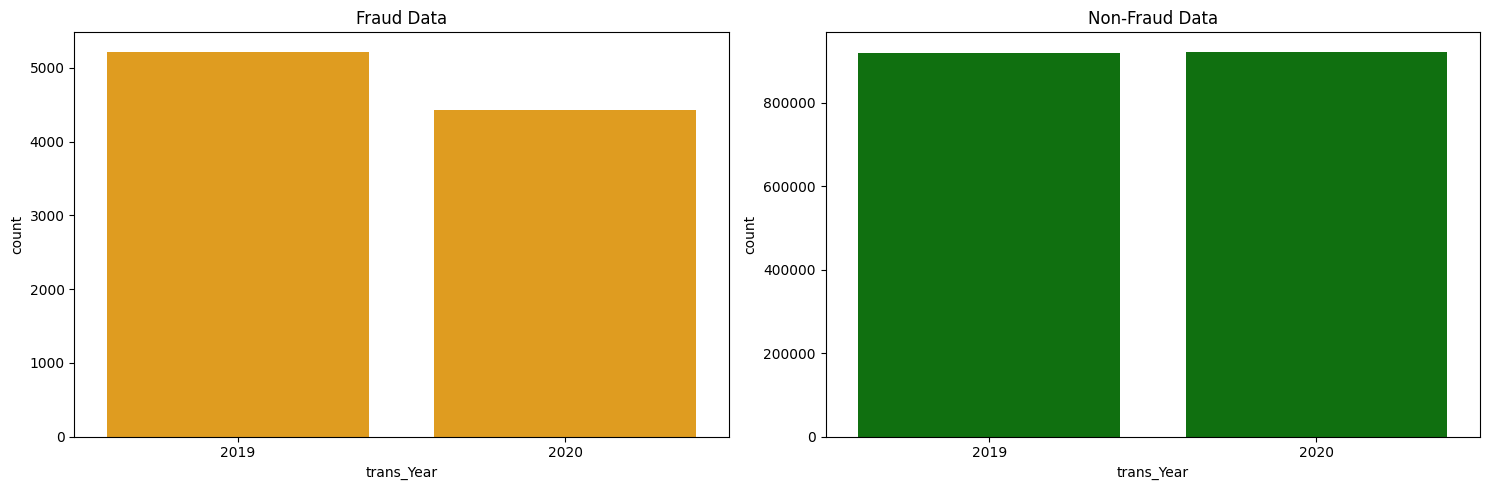

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for fraud data
sns.countplot(x='trans_Year', data=df_fraud,color = 'Orange', ax=axes[0])
axes[0].set_title('Fraud Data')

# Plot for non-fraud data
sns.countplot(x='trans_Year', data=df_nonfraud,color = 'Green', ax=axes[1])
axes[1].set_title('Non-Fraud Data')

# Show the plots
plt.tight_layout()
plt.show()

##### **Frauds Transcations count are less in 2020 when compared to 2019**

#### **Fraud transactions based on Gender**


In [ ]:
df_gender = fraud_data[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

Gender  gender_count    percent
0      F       1014749  54.780408
1      M        837645  45.219592

In [ ]:
df_fraud_gender = fraud_data[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100

df_fraud_gender

Gender  is_fraud    count  gender_count  percent_grp
0      F         0  1009850       1014749    99.517221
1      F         1     4899       1014749     0.482779
2      M         0   832893        837645    99.432695
3      M         1     4752        837645     0.567305

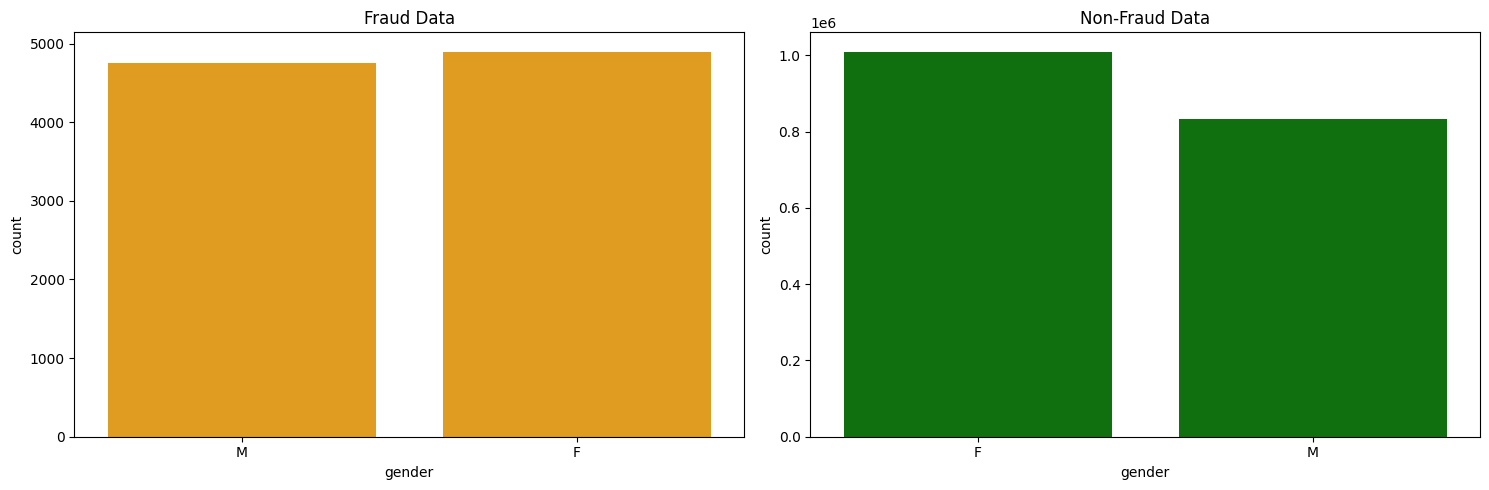

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for fraud data
sns.countplot(x='gender', data=df_fraud,color = 'Orange', ax=axes[0])
axes[0].set_title('Fraud Data')

# Plot for non-fraud data
sns.countplot(x='gender', data=df_nonfraud,color = 'Green', ax=axes[1])
axes[1].set_title('Non-Fraud Data')

# Show the plots
plt.tight_layout()
plt.show()

##### ***Frauds Transcations are done on both male and female but fraud transcations is slightly more on Female's credit card holders***

#### **Fraud transcations based on months**

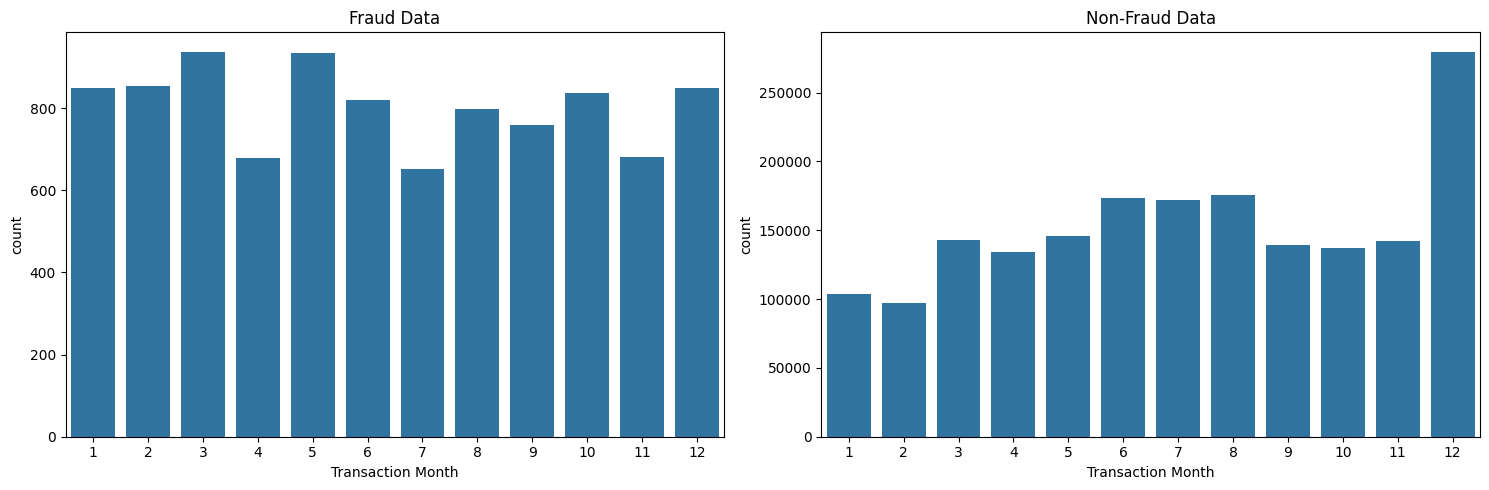

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for fraud data by month
sns.countplot(x='trans_Month', data=df_fraud, ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].set_xlabel('Transaction Month')

# Plot for non-fraud data by month
sns.countplot(x='trans_Month', data=df_nonfraud, ax=axes[1])
axes[1].set_title('Non-Fraud Data')
axes[1].set_xlabel('Transaction Month')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

**Fraudulent transactions are relatively spread out across all months, with some fluctuations.
March and May seem to have the highest number of fraudulent transactions, while April and July have fewer.
Overall, the counts are fairly consistent across months, with only moderate variation.**

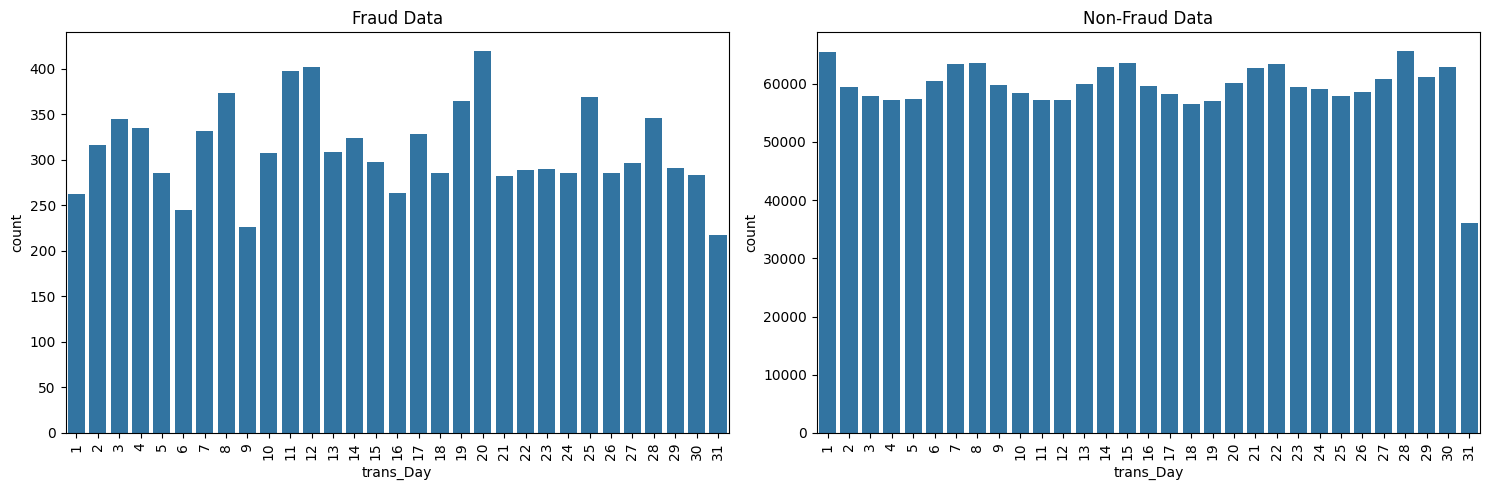

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for fraud data by day
sns.countplot(x='trans_Day', data=df_fraud, ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].tick_params(axis='x', rotation=90)

# Plot for non-fraud data by day
sns.countplot(x='trans_Day', data=df_nonfraud, ax=axes[1])
axes[1].set_title('Non-Fraud Data')
axes[1].tick_params(axis='x', rotation=90)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

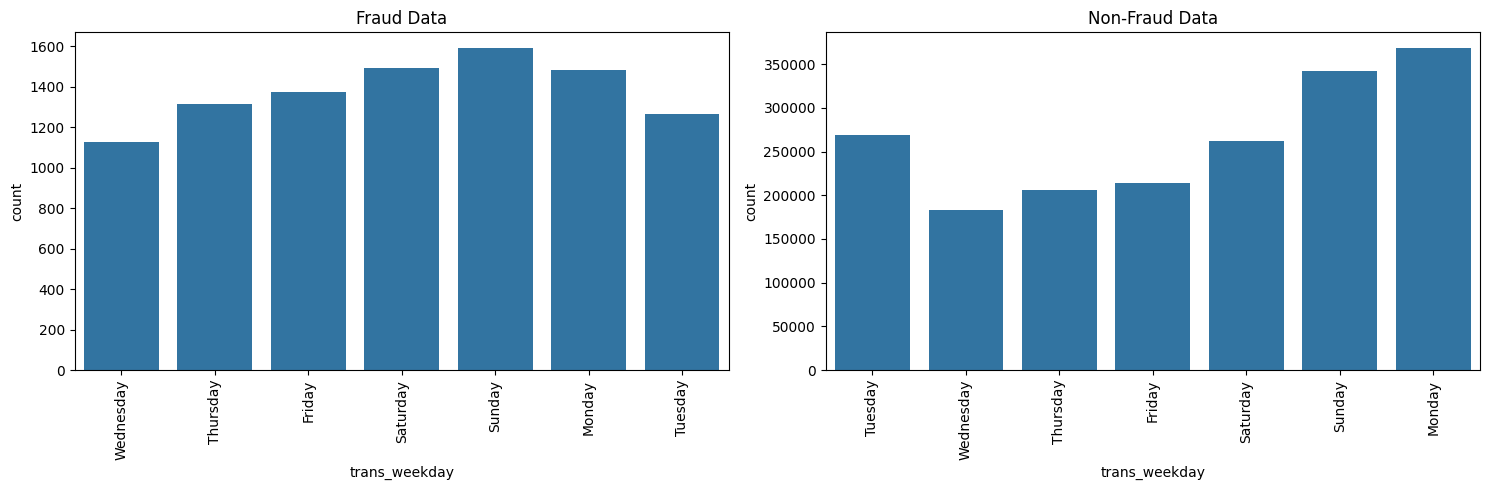

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for fraud data by weekday
sns.countplot(x='trans_weekday', data=df_fraud, ax=axes[0])
axes[0].set_title('Fraud Data')
axes[0].tick_params(axis='x', rotation=90)

# Plot for non-fraud data by weekday
sns.countplot(x='trans_weekday', data=df_nonfraud, ax=axes[1])
axes[1].set_title('Non-Fraud Data')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

#### **Count of frauds transactions are more on Sunday, Saturday and Monday where count of normal transcation is less in Saturday and more in Sunday and Monday**

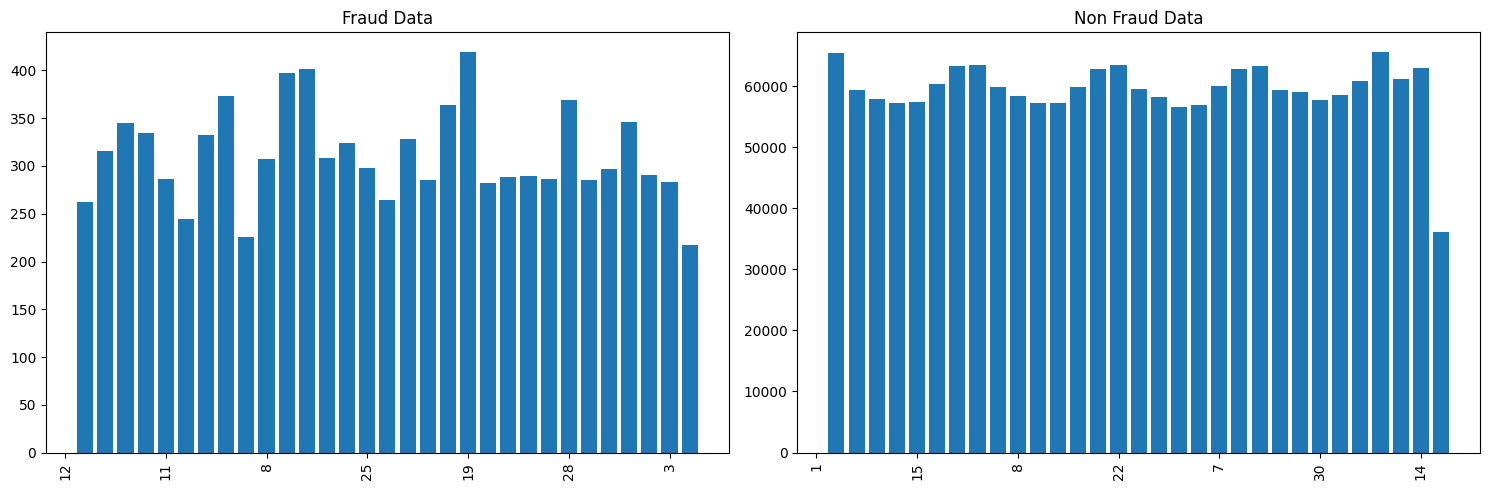

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud Data Plot
ax[0].bar(df_fraud['trans_Day'].value_counts().index, df_fraud['trans_Day'].value_counts().values)
ax[0].set_title('Fraud Data')
ax[0].set_xticklabels(df_fraud['trans_Day'].value_counts().index, rotation=90)

# Non-Fraud Data Plot
ax[1].bar(df_nonfraud['trans_Day'].value_counts().index, df_nonfraud['trans_Day'].value_counts().values)
ax[1].set_title('Non Fraud Data')
ax[1].set_xticklabels(df_nonfraud['trans_Day'].value_counts().index, rotation=90)

plt.tight_layout()
plt.show()

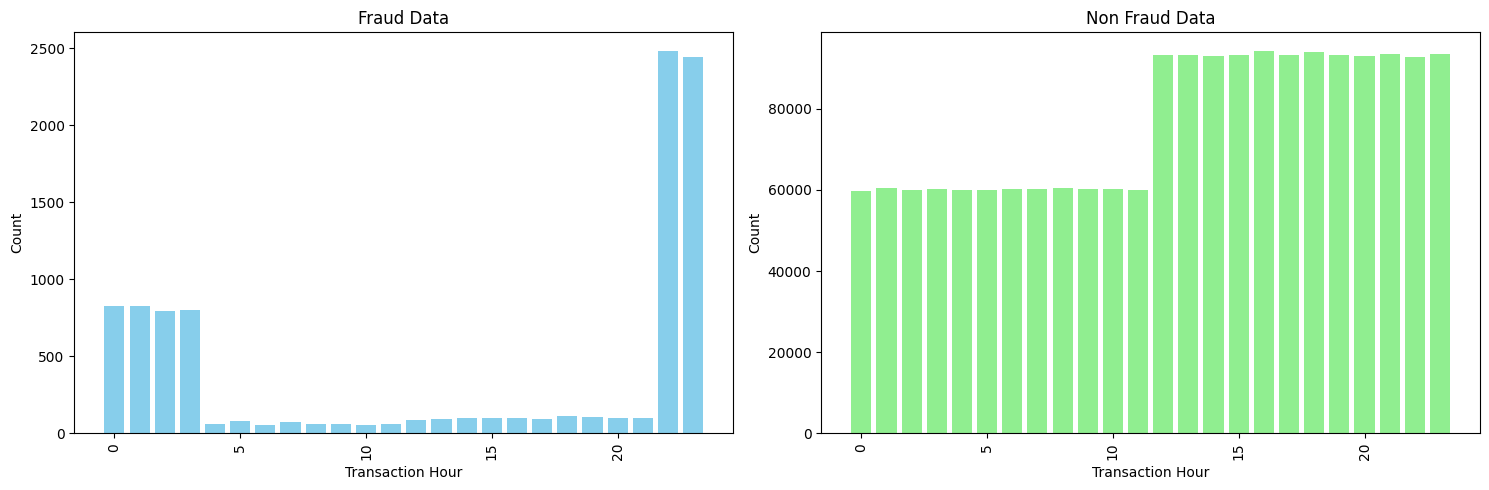

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud Data Plot
fraud_hour_counts = df_fraud['trans_Hour'].value_counts().sort_index()
ax[0].bar(fraud_hour_counts.index, fraud_hour_counts.values, color='skyblue')
ax[0].set_title('Fraud Data')
ax[0].set_xlabel('Transaction Hour')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=90)

# Non-Fraud Data Plot
nonfraud_hour_counts = df_nonfraud['trans_Hour'].value_counts().sort_index()
ax[1].bar(nonfraud_hour_counts.index, nonfraud_hour_counts.values, color='lightgreen')
ax[1].set_title('Non Fraud Data')
ax[1].set_xlabel('Transaction Hour')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##### **Frauds transactions are done at odd hours of the day (22 - 3)Hr**

### **Fraud Transaction in age_bins**

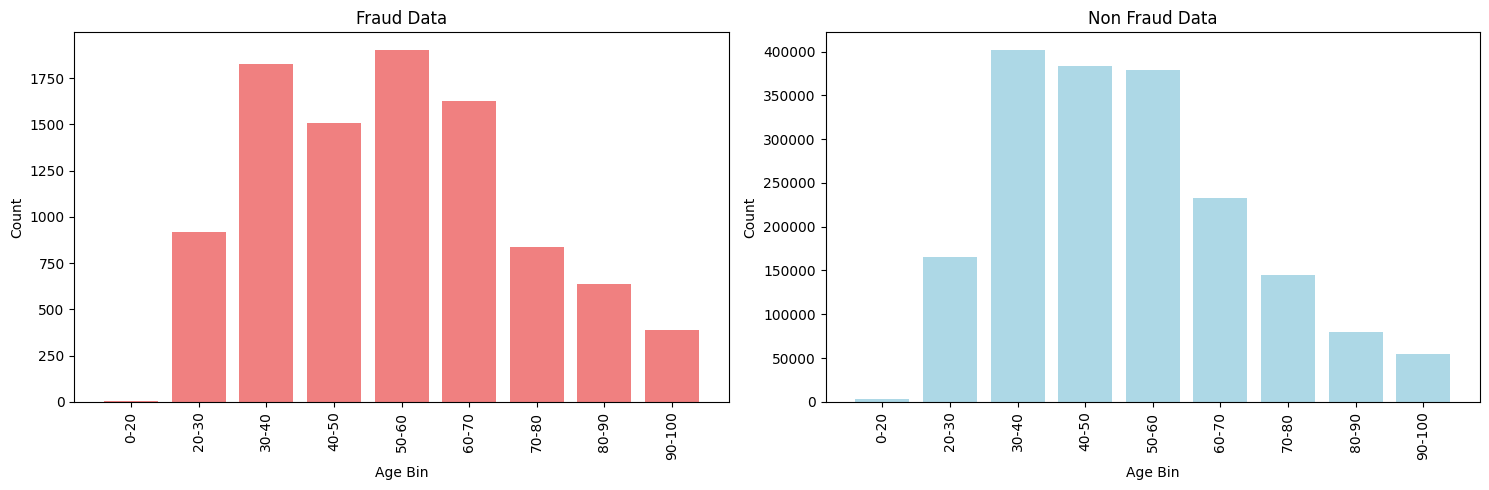

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud Data Plot
fraud_age_counts = df_fraud['age_bin'].value_counts().sort_index()
ax[0].bar(fraud_age_counts.index, fraud_age_counts.values, color='lightcoral')
ax[0].set_title('Fraud Data')
ax[0].set_xlabel('Age Bin')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=90)

# Non-Fraud Data Plot
nonfraud_age_counts = df_nonfraud['age_bin'].value_counts().sort_index()
ax[1].bar(nonfraud_age_counts.index, nonfraud_age_counts.values, color='lightblue')
ax[1].set_title('Non Fraud Data')
ax[1].set_xlabel('Age Bin')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

-Count of Frauds transactions are more on credit card holder's age group of 20 to 60.

-compared to frauds against no of transactions are bit lower in 40-50 age group.

### **Fraud Transactions in categories**

In [ ]:
# Group by 'category' and count the number of transactions
df_category = fraud_data.groupby('category')['trans_num'].count().reset_index()
df_category.columns = ['Category', 'category_count']

# Calculate the percentage of each category
df_category['percent'] = df_category['category_count'] / df_category['category_count'].sum() * 100

# Sort by percentage in descending order
df_category = df_category.sort_values(by='percent', ascending=False)

# Group by 'category' and 'is_fraud' to count the number of transactions per fraud status
df_fraud_category = fraud_data.groupby(['category', 'is_fraud'])['trans_num'].count().reset_index()
df_fraud_category.columns = ['Category', 'is_fraud', 'count']

# Merge with the category count and percentage data
df_fraud_category = pd.merge(df_fraud_category, df_category, on='Category')

# Calculate the percentage of fraudulent transactions per category
df_fraud_category['percent_grp'] = df_fraud_category['count'] / df_fraud_category['category_count'] * 100

# Filter only fraudulent categories and sort by the percentage of fraud in descending order
df_fraud_cate = df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by='percent_grp', ascending=False)

# Display the sample final data
df_fraud_cate.head()


Category  is_fraud  count  category_count    percent  percent_grp
23   shopping_net         1   2219          139322   7.521186     1.592713
17       misc_net         1   1182           90654   4.893883     1.303859
9     grocery_pos         1   2228          176191   9.511529     1.264537
25   shopping_pos         1   1056          166463   8.986371     0.634375
5   gas_transport         1    772          188029  10.150594     0.410575

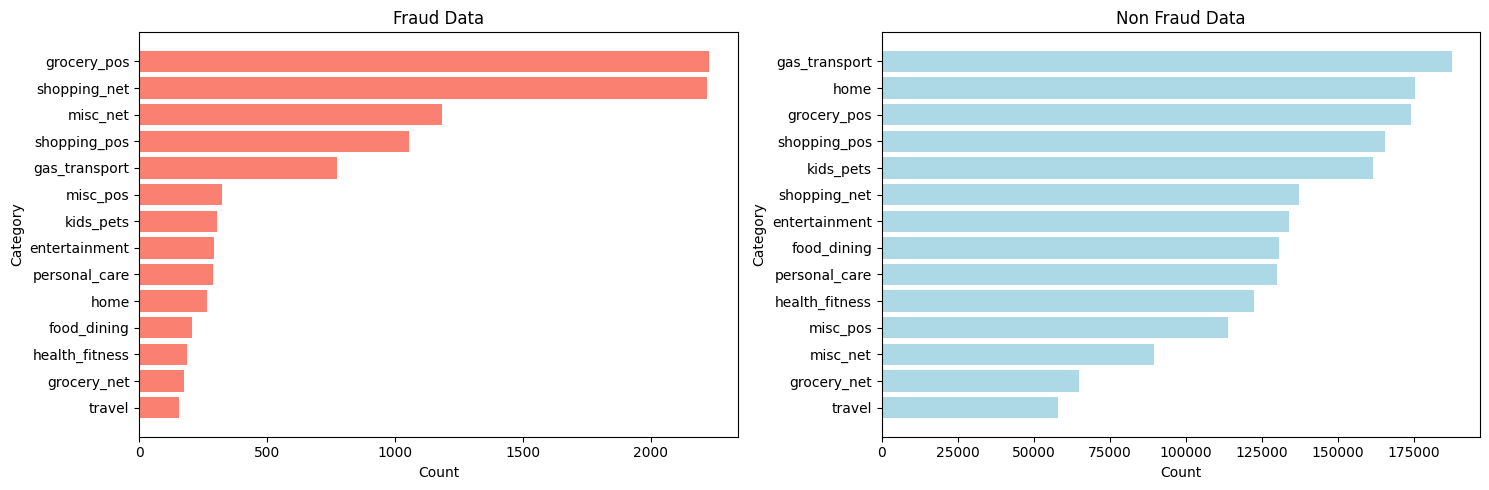

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud Data Plot
fraud_category_counts = df_fraud['category'].value_counts().sort_values()
ax[0].barh(fraud_category_counts.index, fraud_category_counts.values, color='salmon')
ax[0].set_title('Fraud Data')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Category')

# Non-Fraud Data Plot
nonfraud_category_counts = df_nonfraud['category'].value_counts().sort_values()
ax[1].barh(nonfraud_category_counts.index, nonfraud_category_counts.values, color='lightblue')
ax[1].set_title('Non Fraud Data')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Category')

plt.tight_layout()
plt.show()

###### **Major Frauds transactions are done more at**

*rocery_pos, shopping_net, misc_net, shopping_pos, gas_transport*

### **Fraud Transactions in job**

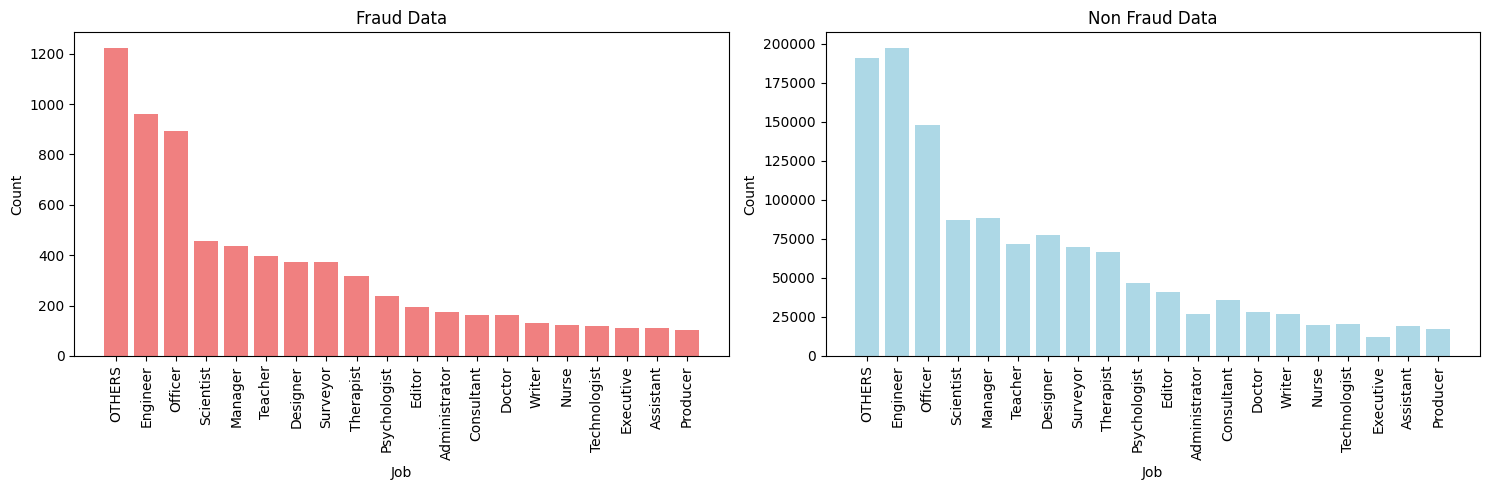

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud Data Plot - Top 20 jobs
fraud_job_counts = df_fraud['job'].value_counts().iloc[:20]
ax[0].bar(fraud_job_counts.index, fraud_job_counts.values, color='lightcoral')
ax[0].set_title('Fraud Data')
ax[0].set_xlabel('Job')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=90)

# Non-Fraud Data Plot - Using the same top 20 jobs as fraud data
nonfraud_job_counts = df_nonfraud['job'].value_counts().reindex(fraud_job_counts.index, fill_value=0)
ax[1].bar(nonfraud_job_counts.index, nonfraud_job_counts.values, color='lightblue')
ax[1].set_title('Non Fraud Data')
ax[1].set_xlabel('Job')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##### ***Others, Engineers, Officer are getting more effected by fraud transactions***

### **Fraud Transactions in State**

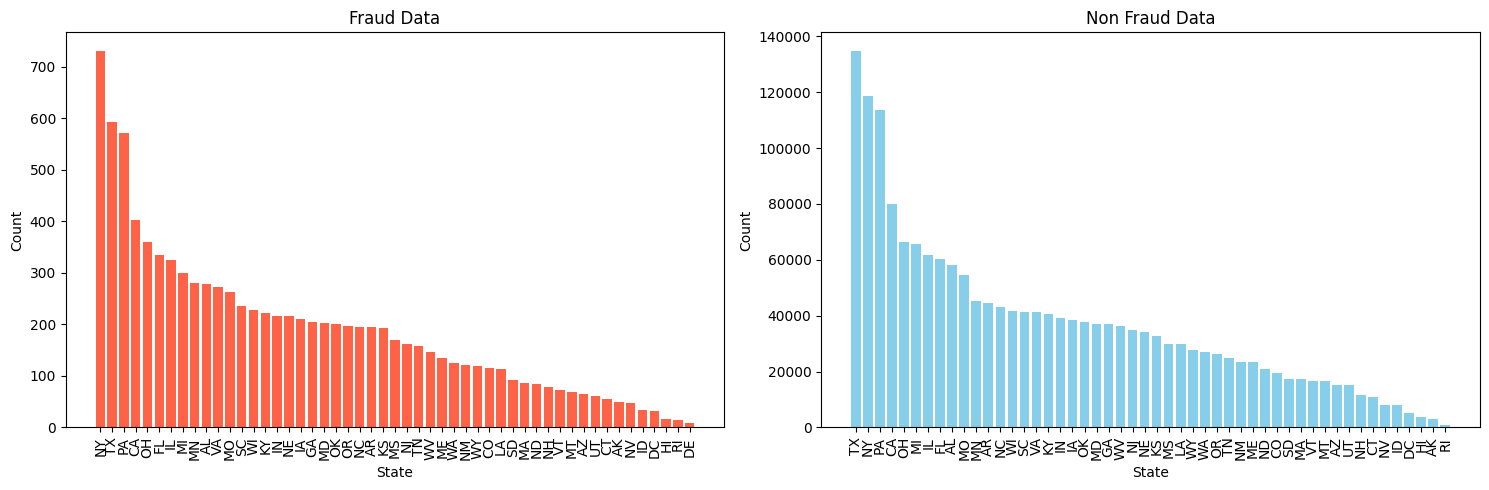

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud Data Plot
fraud_state_counts = df_fraud['state'].value_counts()
ax[0].bar(fraud_state_counts.index, fraud_state_counts.values, color='tomato')
ax[0].set_title('Fraud Data')
ax[0].set_xlabel('State')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=90)

# Non-Fraud Data Plot
nonfraud_state_counts = df_nonfraud['state'].value_counts()
ax[1].bar(nonfraud_state_counts.index, nonfraud_state_counts.values, color='skyblue')
ax[1].set_title('Non Fraud Data')
ax[1].set_xlabel('State')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##### **NY, TX, PA, CA states acknowledging more frauds**

### **Fraud Transactions in State_Region**

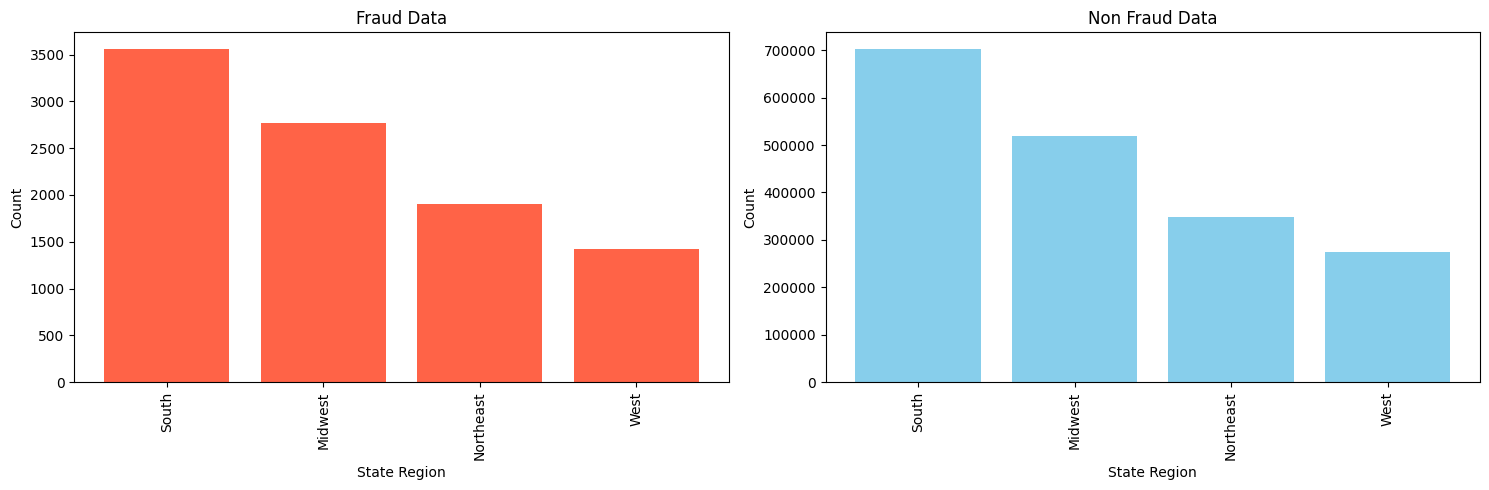

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud Data Plot
fraud_region_counts = df_fraud['state_Region'].value_counts()
ax[0].bar(fraud_region_counts.index, fraud_region_counts.values, color='tomato')
ax[0].set_title('Fraud Data')
ax[0].set_xlabel('State Region')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=90)

# Non-Fraud Data Plot
nonfraud_region_counts = df_nonfraud['state_Region'].value_counts()
ax[1].bar(nonfraud_region_counts.index, nonfraud_region_counts.values, color='skyblue')
ax[1].set_title('Non Fraud Data')
ax[1].set_xlabel('State Region')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##### **South region acknowledges more no of frauds followed by Midwest, northeast and west regions**

### **Fraud Transaction by City**

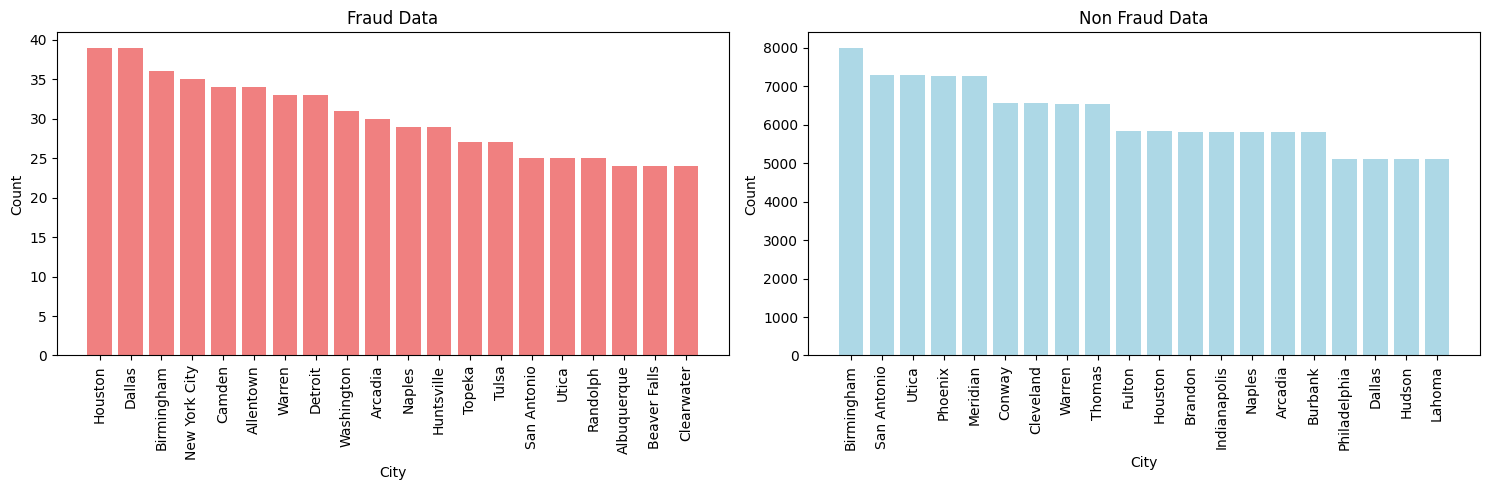

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud Data Plot - Top 20 cities
fraud_city_counts = df_fraud['city'].value_counts().iloc[:20]
ax[0].bar(fraud_city_counts.index, fraud_city_counts.values, color='lightcoral')
ax[0].set_title('Fraud Data')
ax[0].set_xlabel('City')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=90)

# Non-Fraud Data Plot - Top 20 cities
nonfraud_city_counts = df_nonfraud['city'].value_counts().iloc[:20]
ax[1].bar(nonfraud_city_counts.index, nonfraud_city_counts.values, color='lightblue')
ax[1].set_title('Non Fraud Data')
ax[1].set_xlabel('City')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

#### Frauds transactions are more in Dallas , Houston City and Birmingham City..

### **Mean of Fraud and non Fraud Transactions**

In [ ]:
# Overall amount distribution with percentiles
overall_amt_dist = fraud_data['amt'].describe(percentiles=[0.5, 0.95, 0.999]).reset_index()
overall_amt_dist.columns = ['Row Type', 'Overall Amt Distribution']

# Non-fraud amount distribution with percentiles
non_fraud_amt_dist = fraud_data.loc[fraud_data['is_fraud'] == 0, 'amt'].describe(percentiles=[0.5, 0.95, 0.999]).reset_index(drop=True)
non_fraud_amt_dist = pd.DataFrame(non_fraud_amt_dist).reset_index(drop=True)
non_fraud_amt_dist.columns = ['Non Fraud Amt Distribution']

# Fraud amount distribution with percentiles
fraud_amt_dist = fraud_data.loc[fraud_data['is_fraud'] == 1, 'amt'].describe(percentiles=[0.5, 0.95, 0.999]).reset_index(drop=True)
fraud_amt_dist = pd.DataFrame(fraud_amt_dist).reset_index(drop=True)
fraud_amt_dist.columns = ['Fraud Amt Distribution']

# Concatenate the results into a single DataFrame
result = pd.concat([overall_amt_dist, non_fraud_amt_dist, fraud_amt_dist], axis=1)

# Display the final DataFrame
result

Row Type  Overall Amt Distribution  Non Fraud Amt Distribution  \
0    count              1.852394e+06                1.842743e+06   
1     mean              7.006357e+01                6.765128e+01   
2      std              1.592540e+02                1.535481e+02   
3      min              1.000000e+00                1.000000e+00   
4      50%              4.745000e+01                4.724000e+01   
5      95%              1.953400e+02                1.895900e+02   
6    99.9%              1.517241e+03                1.519623e+03   
7      max              2.894890e+04                2.894890e+04   

   Fraud Amt Distribution  
0             9651.000000  
1              530.661412  
2              391.028873  
3                1.060000  
4              390.000000  
5             1084.090000  
6             1293.127000  
7             1376.040000

#### **Mean of fraud transactions are 6.77 and mean of non fraud transactions is 531**

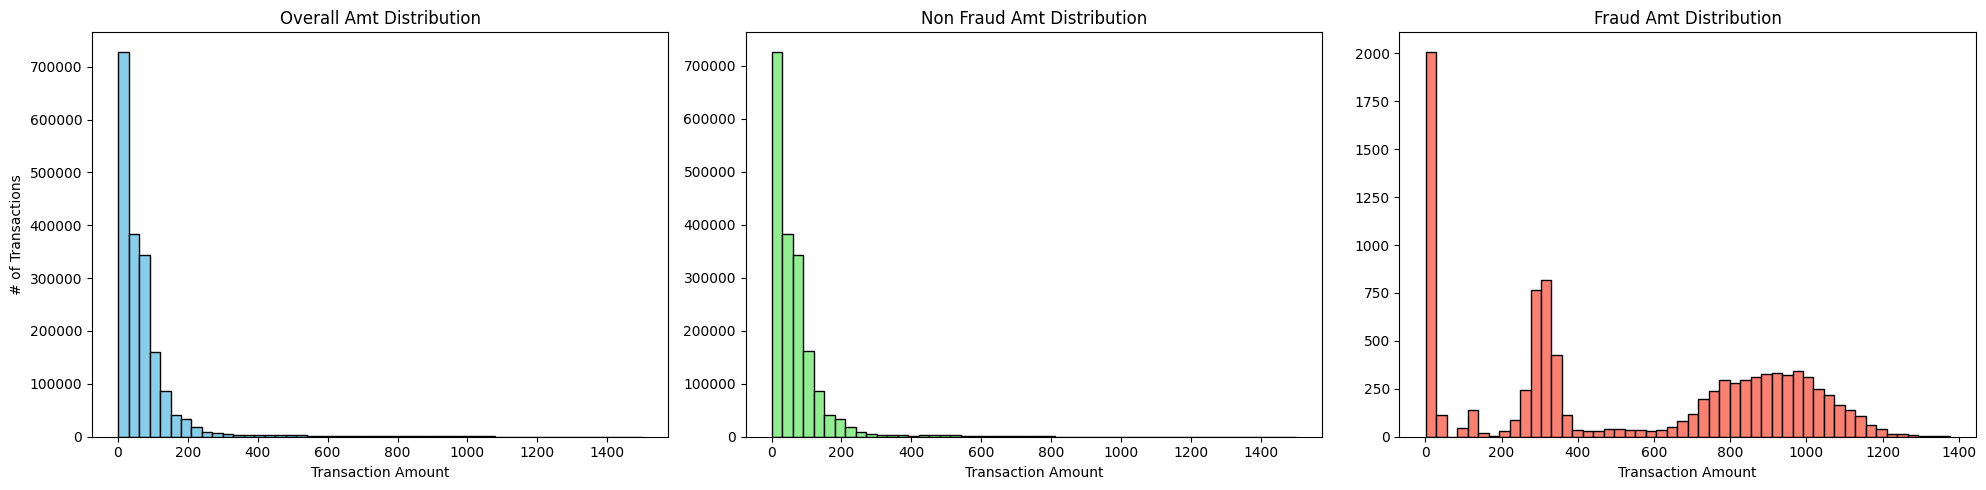

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Histogram for overall transaction amounts <= 1500
ax[0].hist(fraud_data[fraud_data['amt'] <= 1500]['amt'], bins=50, color='skyblue', edgecolor='black')
ax[0].set_title('Overall Amt Distribution')
ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('# of Transactions')

# Histogram for non-fraud transaction amounts <= 1500
ax[1].hist(fraud_data[(fraud_data['is_fraud'] == 0) & (fraud_data['amt'] <= 1500)]['amt'], bins=50, color='lightgreen', edgecolor='black')
ax[1].set_title('Non Fraud Amt Distribution')
ax[1].set_xlabel('Transaction Amount')

# Histogram for fraud transaction amounts <= 1500
ax[2].hist(fraud_data[(fraud_data['is_fraud'] == 1) & (fraud_data['amt'] <= 1500)]['amt'], bins=50, color='salmon', edgecolor='black')
ax[2].set_title('Fraud Amt Distribution')
ax[2].set_xlabel('Transaction Amount')

plt.tight_layout()
plt.show()

overall amount distribution where fraud amount <=1500(whole data i.e fraud and non fraud data)
non fraud amount distribution where fraud amount <=1500 and non_fraud data transactions have transaction approx to 600
fraud amount distibution where fraud amount <=1500 and fraud data transactions have transaction approximetly reaches to 1300 AS shown in the

### **Fraud Transactions in AMT**

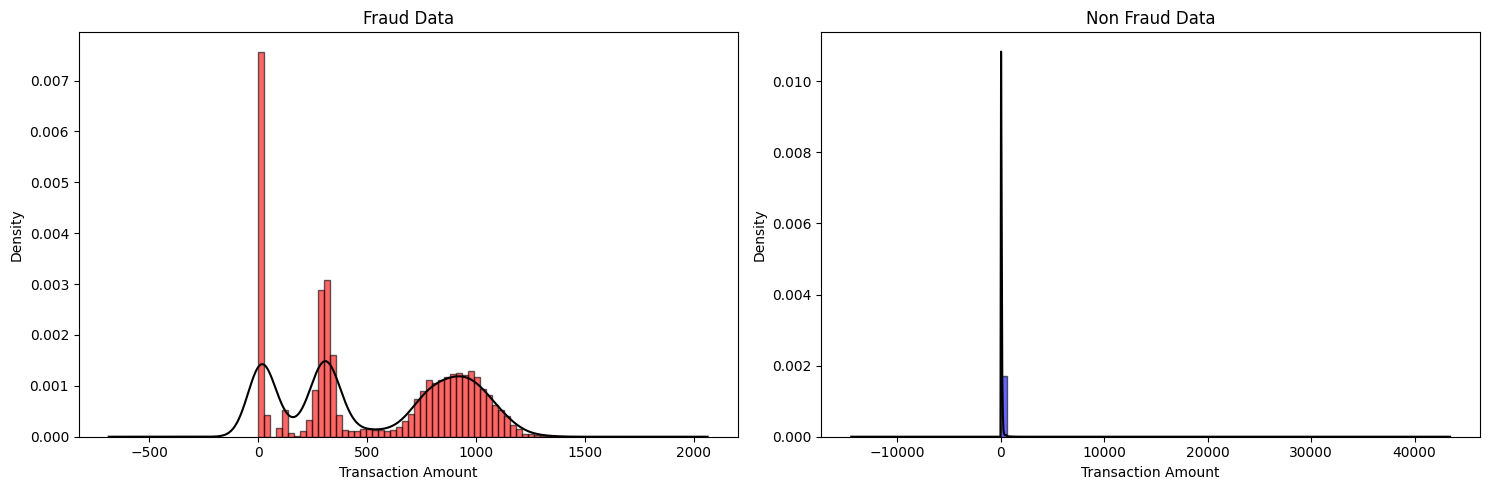

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud Data Histogram and KDE
ax[0].hist(df_fraud['amt'], bins=50, density=True, alpha=0.6, color='r', edgecolor='black')
df_fraud['amt'].plot(kind='kde', ax=ax[0], color='black')
ax[0].set_title('Fraud Data')
ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('Density')

# Non-Fraud Data Histogram and KDE
ax[1].hist(df_nonfraud['amt'], bins=50, density=True, alpha=0.6, color='b', edgecolor='black')
df_nonfraud['amt'].plot(kind='kde', ax=ax[1], color='black')
ax[1].set_title('Non Fraud Data')
ax[1].set_xlabel('Transaction Amount')

plt.tight_layout()
plt.show()

##### **much variation in Amount deducted from account in fraud case**

### **Fraud Transactions in dist'**

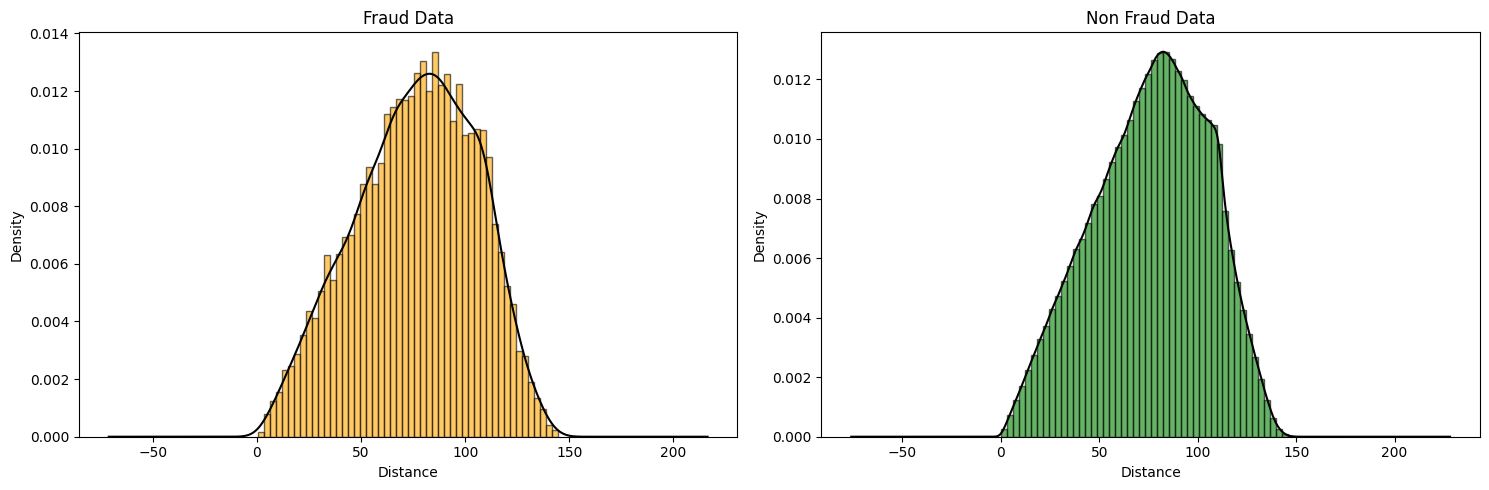

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud Data - Histogram and KDE
ax[0].hist(df_fraud['dist'], bins=50, density=True, alpha=0.6, color='orange', edgecolor='black')
df_fraud['dist'].plot(kind='kde', ax=ax[0], color='black')
ax[0].set_title('Fraud Data')
ax[0].set_xlabel('Distance')
ax[0].set_ylabel('Density')

# Non-Fraud Data - Histogram and KDE
ax[1].hist(df_nonfraud['dist'], bins=50, density=True, alpha=0.6, color='green', edgecolor='black')
df_nonfraud['dist'].plot(kind='kde', ax=ax[1], color='black')
ax[1].set_title('Non Fraud Data')
ax[1].set_xlabel('Distance')

plt.tight_layout()
plt.show()

#### **DIstance is similar for both type of transactions**

#### **Fraud Transactions based on state vs amt and trans_day vs amt**

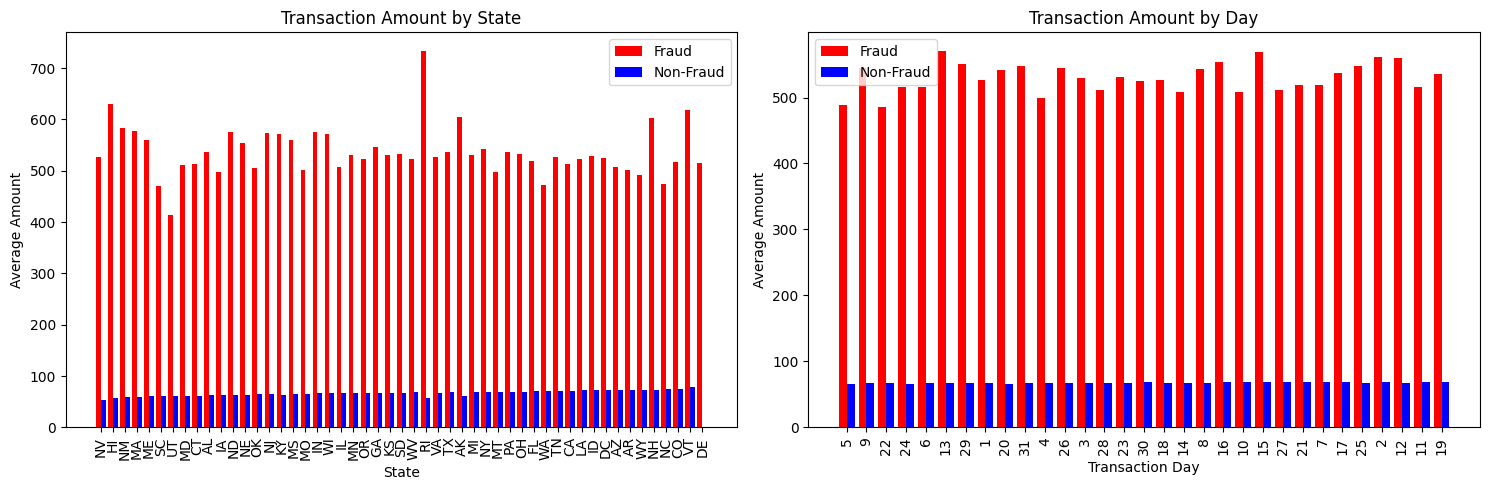

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Fraud/Non-Fraud by State Bar Plot
states = fraud_data['state'].unique()
states_sorted = fraud_data.groupby('state')['amt'].mean().sort_values().index  # Sort states by average 'amt'
fraud_means_by_state = fraud_data[fraud_data['is_fraud'] == 1].groupby('state')['amt'].mean()
nonfraud_means_by_state = fraud_data[fraud_data['is_fraud'] == 0].groupby('state')['amt'].mean()

ax[0].bar(np.arange(len(states)), fraud_means_by_state.reindex(states_sorted).fillna(0), width=0.4, label='Fraud', color='red', align='center')
ax[0].bar(np.arange(len(states)) + 0.4, nonfraud_means_by_state.reindex(states_sorted).fillna(0), width=0.4, label='Non-Fraud', color='blue', align='center')
ax[0].set_xticks(np.arange(len(states)) + 0.2)
ax[0].set_xticklabels(states_sorted, rotation=90)
ax[0].set_title('Transaction Amount by State')
ax[0].set_xlabel('State')
ax[0].set_ylabel('Average Amount')
ax[0].legend()

# Fraud/Non-Fraud by Transaction Day Bar Plot
days = fraud_data['trans_Day'].unique()
days_sorted = fraud_data.groupby('trans_Day')['amt'].mean().sort_values().index  # Sort days by average 'amt'
fraud_means_by_day = fraud_data[fraud_data['is_fraud'] == 1].groupby('trans_Day')['amt'].mean()
nonfraud_means_by_day = fraud_data[fraud_data['is_fraud'] == 0].groupby('trans_Day')['amt'].mean()

ax[1].bar(np.arange(len(days)), fraud_means_by_day.reindex(days_sorted).fillna(0), width=0.4, label='Fraud', color='red', align='center')
ax[1].bar(np.arange(len(days)) + 0.4, nonfraud_means_by_day.reindex(days_sorted).fillna(0), width=0.4, label='Non-Fraud', color='blue', align='center')
ax[1].set_xticks(np.arange(len(days)) + 0.2)
ax[1].set_xticklabels(days_sorted, rotation=90)
ax[1].set_title('Transaction Amount by Day')
ax[1].set_xlabel('Transaction Day')
ax[1].set_ylabel('Average Amount')
ax[1].legend()

plt.tight_layout()
plt.show()

- The maximum amount spend for fruad transactions were at RI, HI, DE and VT State.
- The maximum amount spend for fruad transactions were 2nd , 13th , 15th , 31st day of a month

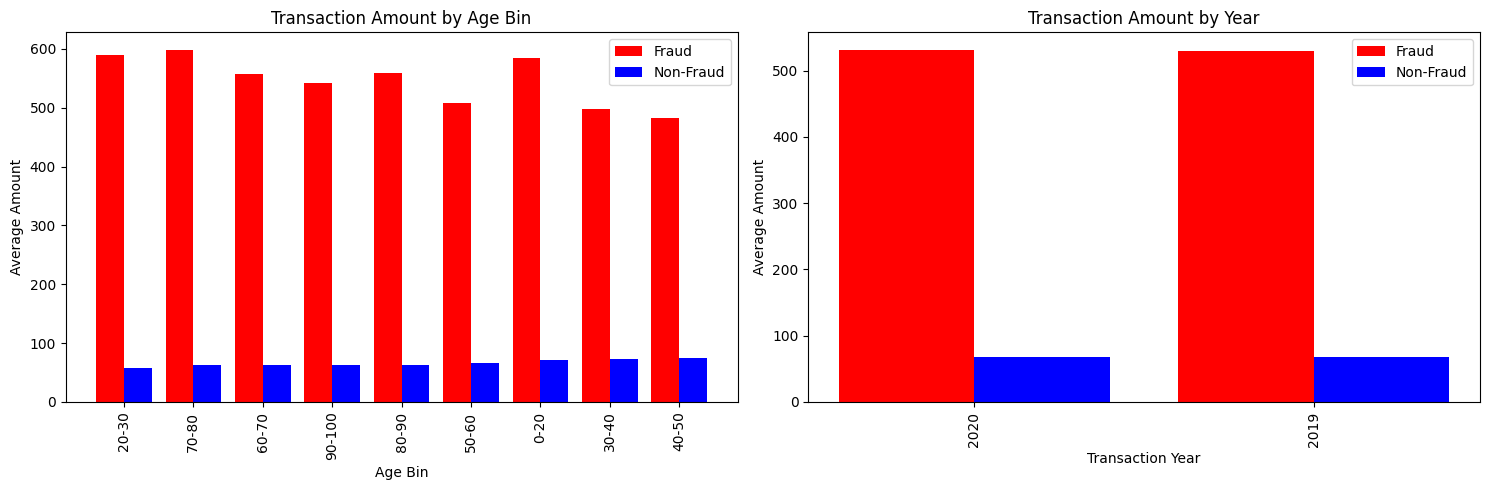

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for age bins
age_bins = fraud_data['age_bin'].unique()
age_bins_sorted = fraud_data.groupby('age_bin')['amt'].mean().sort_values().index  # Sort age bins by average 'amt'
fraud_means_by_age = fraud_data[fraud_data['is_fraud'] == 1].groupby('age_bin')['amt'].mean()
nonfraud_means_by_age = fraud_data[fraud_data['is_fraud'] == 0].groupby('age_bin')['amt'].mean()

ax[0].bar(np.arange(len(age_bins)), fraud_means_by_age.reindex(age_bins_sorted).fillna(0), width=0.4, label='Fraud', color='red', align='center')
ax[0].bar(np.arange(len(age_bins)) + 0.4, nonfraud_means_by_age.reindex(age_bins_sorted).fillna(0), width=0.4, label='Non-Fraud', color='blue', align='center')
ax[0].set_xticks(np.arange(len(age_bins)) + 0.2)
ax[0].set_xticklabels(age_bins_sorted, rotation=90)
ax[0].set_title('Transaction Amount by Age Bin')
ax[0].set_xlabel('Age Bin')
ax[0].set_ylabel('Average Amount')
ax[0].legend()

# Bar plot for transaction years
years = fraud_data['trans_Year'].unique()
years_sorted = fraud_data.groupby('trans_Year')['amt'].mean().sort_values().index  # Sort years by average 'amt'
fraud_means_by_year = fraud_data[fraud_data['is_fraud'] == 1].groupby('trans_Year')['amt'].mean()
nonfraud_means_by_year = fraud_data[fraud_data['is_fraud'] == 0].groupby('trans_Year')['amt'].mean()

ax[1].bar(np.arange(len(years)), fraud_means_by_year.reindex(years_sorted).fillna(0), width=0.4, label='Fraud', color='red', align='center')
ax[1].bar(np.arange(len(years)) + 0.4, nonfraud_means_by_year.reindex(years_sorted).fillna(0), width=0.4, label='Non-Fraud', color='blue', align='center')
ax[1].set_xticks(np.arange(len(years)) + 0.2)
ax[1].set_xticklabels(years_sorted, rotation=90)
ax[1].set_title('Transaction Amount by Year')
ax[1].set_xlabel('Transaction Year')
ax[1].set_ylabel('Average Amount')
ax[1].legend()

plt.tight_layout()
plt.show()


- The maximum amount spend for fruad transactions belongs to credit card holders "0-20", "60-70" and "70-80" age bin.
- The maximum amount spend for fruad transactions were same for both the years.

### **Fraud Transactions based on trans_hour , gender with amt**

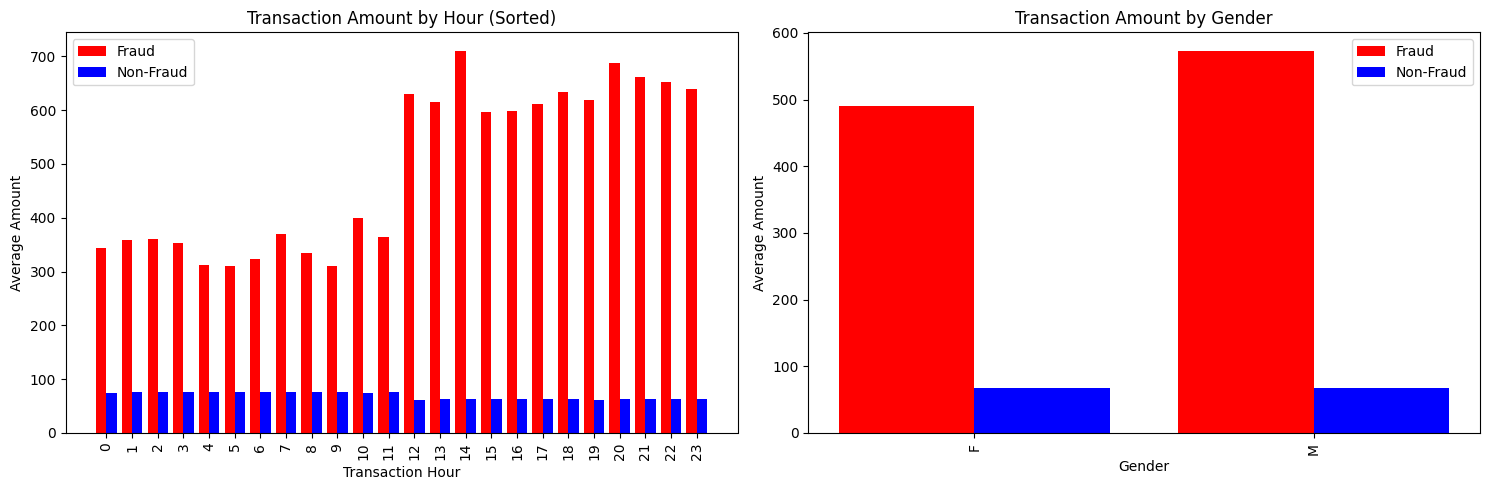

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Sort the transaction hours in ascending order
hours_sorted = sorted(fraud_data['trans_Hour'].unique())
fraud_means_by_hour = fraud_data[fraud_data['is_fraud'] == 1].groupby('trans_Hour')['amt'].mean()
nonfraud_means_by_hour = fraud_data[fraud_data['is_fraud'] == 0].groupby('trans_Hour')['amt'].mean()

# Bar plot for transaction hours (sorted)
ax[0].bar(np.arange(len(hours_sorted)), fraud_means_by_hour.reindex(hours_sorted).fillna(0), width=0.4, label='Fraud', color='red', align='center')
ax[0].bar(np.arange(len(hours_sorted)) + 0.4, nonfraud_means_by_hour.reindex(hours_sorted).fillna(0), width=0.4, label='Non-Fraud', color='blue', align='center')
ax[0].set_xticks(np.arange(len(hours_sorted)) + 0.2)
ax[0].set_xticklabels(hours_sorted, rotation=90)
ax[0].set_title('Transaction Amount by Hour (Sorted)')
ax[0].set_xlabel('Transaction Hour')
ax[0].set_ylabel('Average Amount')
ax[0].legend()

# Bar plot for gender
genders = fraud_data['gender'].unique()
fraud_means_by_gender = fraud_data[fraud_data['is_fraud'] == 1].groupby('gender')['amt'].mean()
nonfraud_means_by_gender = fraud_data[fraud_data['is_fraud'] == 0].groupby('gender')['amt'].mean()

ax[1].bar(np.arange(len(genders)), fraud_means_by_gender.fillna(0), width=0.4, label='Fraud', color='red', align='center')
ax[1].bar(np.arange(len(genders)) + 0.4, nonfraud_means_by_gender.fillna(0), width=0.4, label='Non-Fraud', color='blue', align='center')
ax[1].set_xticks(np.arange(len(genders)) + 0.2)
ax[1].set_xticklabels(genders, rotation=90)
ax[1].set_title('Transaction Amount by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Average Amount')
ax[1].legend()

plt.tight_layout()
plt.show()

- The maximum amount spend for fruad transactions were done mostly between 12 to 23 Hr
- The maximum amount spend for fruad transactions were done on Male's Credit card Holders.

### **Amount by percentage of transactions**

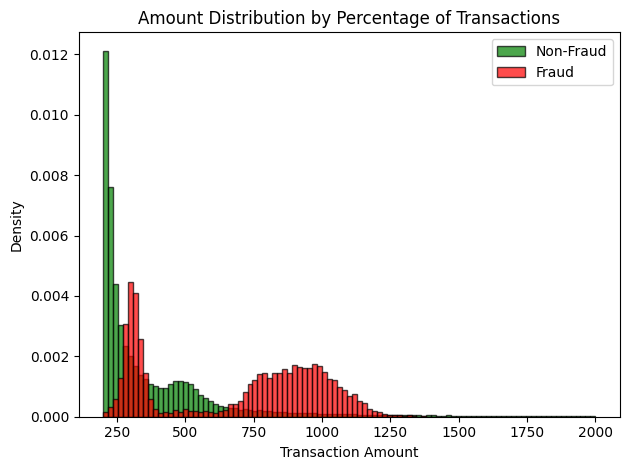

In [ ]:
# Create bins for the histogram
bins = np.linspace(200, 2000, 100)

# Plot non-fraud transactions
plt.hist(df_nonfraud['amt'], bins, alpha=0.7, density=True, label='Non-Fraud', color='green', edgecolor='black')

# Plot fraud transactions
plt.hist(df_fraud['amt'], bins, alpha=0.7, density=True, label='Fraud', color='red', edgecolor='black')

# Adding labels and title
plt.legend(loc='upper right')
plt.title("Amount Distribution by Percentage of Transactions")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")

# Display the plot
plt.tight_layout()
plt.show()

It seems It would be hard to differentiate fraud from normal transactions by transaction amount alone.

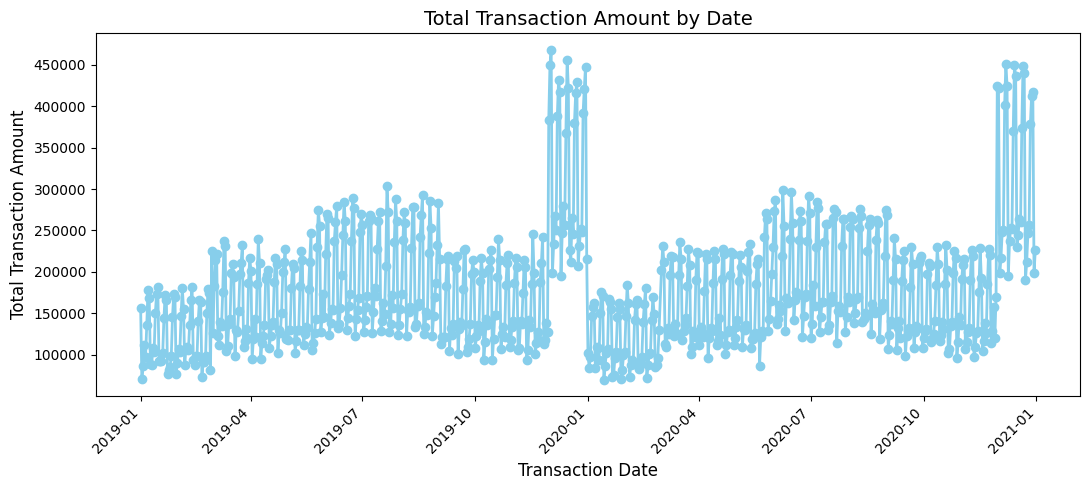

In [ ]:
# Group by 'trans_Date' and sum the transaction amounts
daily_totals = fraud_data.groupby('trans_Date')['amt'].sum()

# Plot the results with improved customization
plt.figure(figsize=(11, 5))
plt.plot(daily_totals, color='skyblue', marker='o', linestyle='-', linewidth=2)

# Adding title and labels
plt.title("Total Transaction Amount by Date", fontsize=14)
plt.xlabel("Transaction Date", fontsize=12)
plt.ylabel("Total Transaction Amount", fontsize=12)

# Improving the x-axis formatting (optional, depending on your date format)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

- The maximum amount of fraud transactions majorly done at jan of 2020 and 2021 , means at new year eve more frauded transactions done .

In [ ]:
df_fraud_transactions = fraud_data[fraud_data['is_fraud']==1]

df_timeline = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline.columns = ['trans_year_month','num_of_fraud_transactions','fraud_customers']
df_timeline.head()

trans_year_month  num_of_fraud_transactions  fraud_customers
0          2019-01                        506               50
1          2019-02                        517               53
2          2019-03                        494               49
3          2019-04                        376               41
4          2019-05                        408               42

### **Fraud transactions month wise**

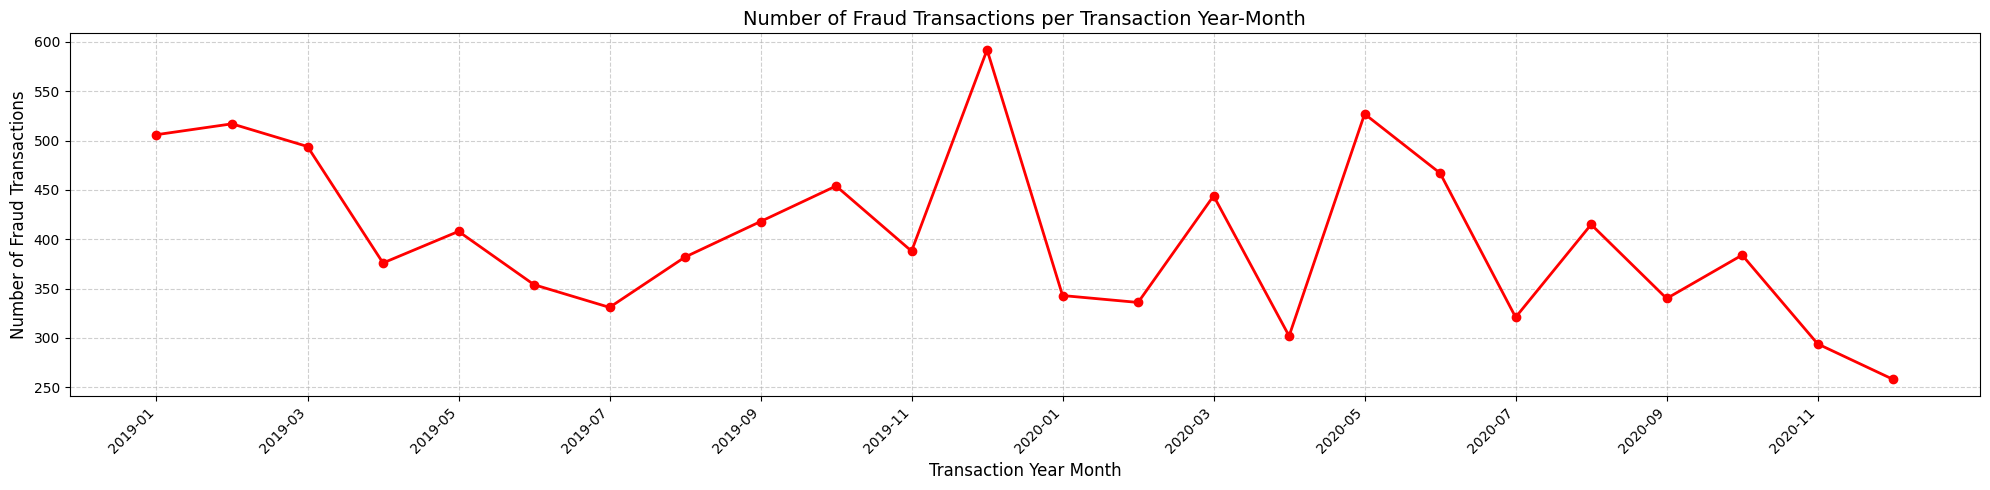

In [ ]:
# Define x-axis values
x = np.arange(0, len(df_timeline), 1)

fig, ax = plt.subplots(1, 1, figsize=(20, 5))

# Plot number of fraud transactions over time with markers
ax.plot(x, df_timeline['num_of_fraud_transactions'], marker='o', linestyle='-', color='red', linewidth=2)

# Set x-axis ticks and labels with appropriate rotation for better readability
ax.set_xticks(x[::2])  # Show every second label to reduce clutter
ax.set_xticklabels(df_timeline['trans_year_month'][::2], rotation=45, ha='right')

# Set axis labels and title
ax.set_xlabel('Transaction Year Month', fontsize=12)
ax.set_ylabel('Number of Fraud Transactions', fontsize=12)
ax.set_title('Number of Fraud Transactions per Transaction Year-Month', fontsize=14)

# Add gridlines to make it easier to read
ax.grid(True, linestyle='--', alpha=0.6)

# Automatically adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

- No of fraud transactions done month wise and its shown in fig that it has increased at jan- feb , nov-dec month of 2019 ,in rest of the months there are normal transactions
- in 2020 march , may , august , october months has a peak of fraud transactions as shown in figure

#### **KDE plot to visualize the distribution of Amount for both the classes**

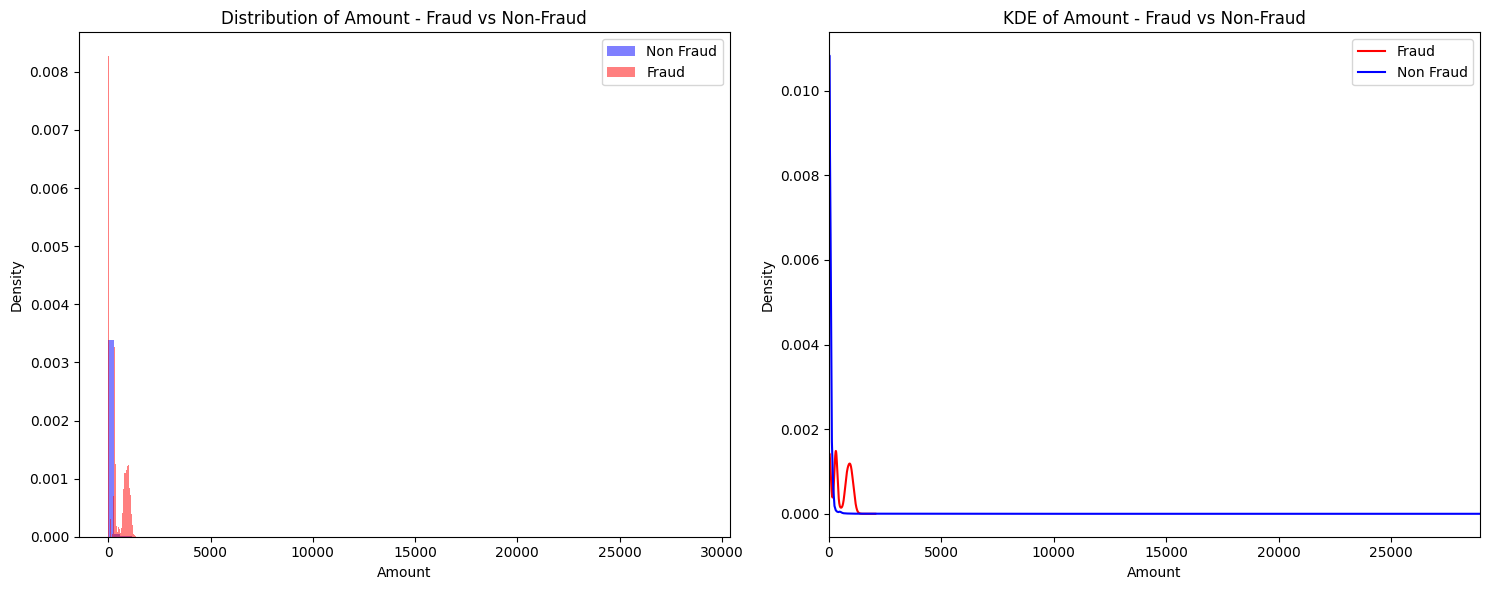

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Kernel Density Estimation (KDE) plot for Fraud and Non-Fraud Amounts
axes[0].hist(fraud_data.loc[fraud_data['is_fraud'] == 0, 'amt'], bins=100, density=True, alpha=0.5, label='Non Fraud', color='blue')
axes[0].hist(fraud_data.loc[fraud_data['is_fraud'] == 1, 'amt'], bins=100, density=True, alpha=0.5, label='Fraud', color='red')
axes[0].set_title('Distribution of Amount - Fraud vs Non-Fraud')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Density')
axes[0].legend()

# Subplot 2: Probability Density Function (PDF) using KDE
fraud_amt = fraud_data.loc[fraud_data['is_fraud'] == 1, 'amt']
nonfraud_amt = fraud_data.loc[fraud_data['is_fraud'] == 0, 'amt']
fraud_amt.plot(kind='kde', ax=axes[1], label='Fraud', color='red')
nonfraud_amt.plot(kind='kde', ax=axes[1], label='Non Fraud', color='blue')

axes[1].set_title('KDE of Amount - Fraud vs Non-Fraud')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Density')
axes[1].set_xlim(0, max(fraud_data['amt']))
axes[1].legend()

# Adjust the layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

The distribution of amount for Fraud transactions is much higher than non-fradualent transactions.

In [ ]:
fraud_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_Date', 'trans_Time', 'state_Region', 'age', 'age_bin',
       'trans_Year', 'trans_year_month', 'trans_Month', 'trans_Hour',
       'trans_Day', 'trans_weekday', 'dist', 'prev_merch_lat',
       'prev_merch_long', 'time_since_prev_transaction',
       'distance_between_merchants', 'hist_trans_30d', 'hist_trans_24H',
       'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')

In [ ]:
fraud_data.shape

(1852394, 39)

In [ ]:
fraud_data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender            city state    zip      lat  \
0       misc_net    4.97      F  Moravian Falls    NC  28654  36.0788   
1    grocery_pos  107.23      F          Orient    WA  99160  48.8878   
2  entertainment  220.11      M      Malad City    ID  83252  42.1808   
3  gas_transport   45.00      M         Boulder    MT  59632  46.2306   
4       misc_pos   41.96      M        Doe Hill    VA  24433  38.4207   

       long  city_pop           job        dob  \
0  -81.1781      3495  Psychologist 1988-03-09   
1 -118.2105       149       Teacher 1978-06-21   
2 -112.2620      4154       Officer 1962-01-19   
3 -112.1138      1939        OTHERS 1967-01-12   
4  -79.4629        99     Therapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud trans_Date trans_Time state_Region  age age_bin  trans_Year  \
0         0 2019-01-01   00:00:18        South   36   30-40        2019   
1         0 2019-01-01   00:00:44         West   46   40-50        2019   
2         0 2019-01-01   00:00:51         West   62   60-70        2019   
3         0 2019-01-01   00:01:16         West   57   50-60        2019   
4         0 2019-01-01   00:03:06        South   38   30-40        2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0          2019-01            1           0          1       Tuesday   78.60   
1          2019-01            1           0          1       Tuesday   30.21   
2          2019-01            1           0          1       Tuesday  108.21   
3          2019-01            1           0          1       Tuesday   95.67   
4          2019-01            1           0          1       Tuesday   77.56   

   prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0       36.011293       -82.048315                          0.0   
1       49.159047      -118.186462                          0.0   
2       43.150704      -112.154481                          0.0   
3       47.034331      -112.561071                          0.0   
4       38.674999       -78.632459                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24H  \
0                         0.0           109.0             6.0   
1                         0.0            53.0             1.0   
2                         0.0             8.0             5.0   
3                         0.0           181.0             5.0   
4                         0.0           218.0             6.0   

   hist_trans_avg_amt_30d  hist_trans_avg_amt_24h  
0               70.974587               95.641667  
1               50.883962               12.110000  
2              377.925000              445.778000  
3               59.307403               42.454000  
4               67.148991               78.120000

Skewness of numerical features:
cc_num                          2.851074
amt                            40.812809
zip                             0.078950
lat                            -0.191999
long                           -1.146919
city_pop                        5.590805
unix_time                      -0.019736
merch_lat                      -0.188097
merch_long                     -1.143933
is_fraud                       13.745675
age                             0.610997
trans_Year                     -0.002909
trans_Month                    -0.130155
trans_Hour                     -0.283419
trans_Day                      -0.003649
dist                           -0.235677
prev_merch_lat                 -0.188106
prev_merch_long                -1.143939
time_since_prev_transaction    -0.864945
distance_between_merchants      0.254444
hist_trans_30d                  0.709608
hist_trans_24H                  1.438184
hist_trans_avg_amt_30d          6.633718
hist_trans_avg_amt_24h   

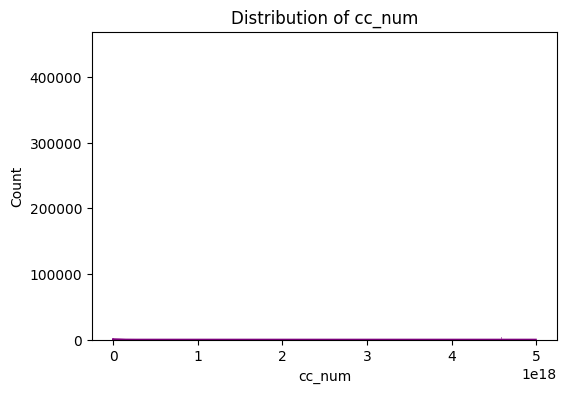

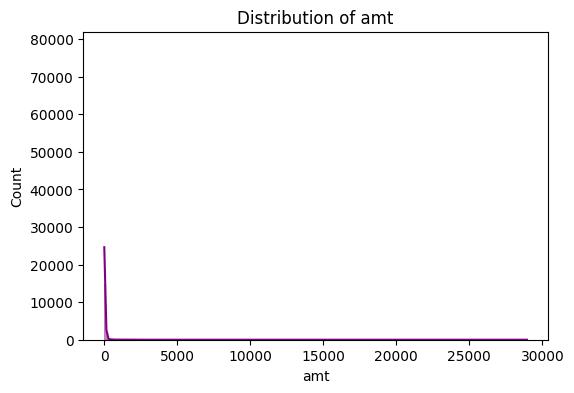

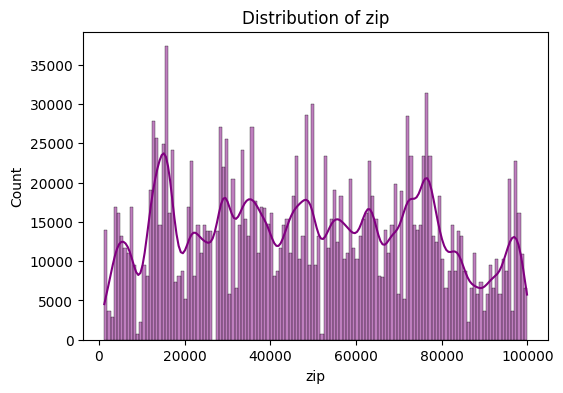

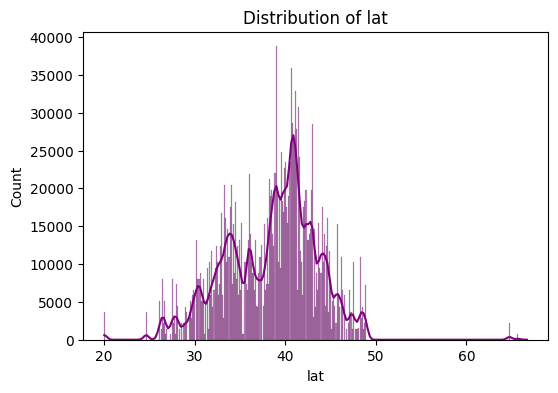

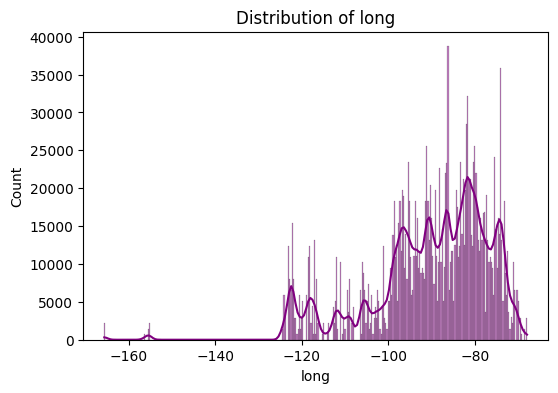

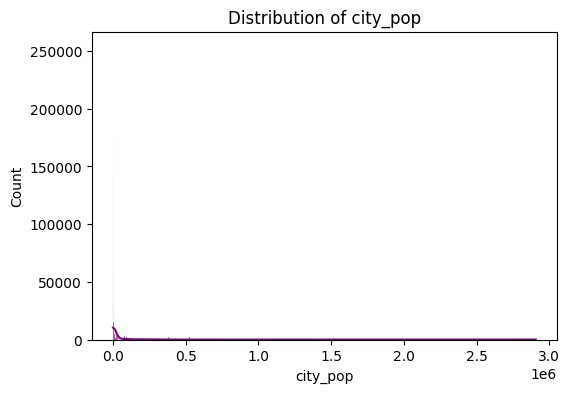

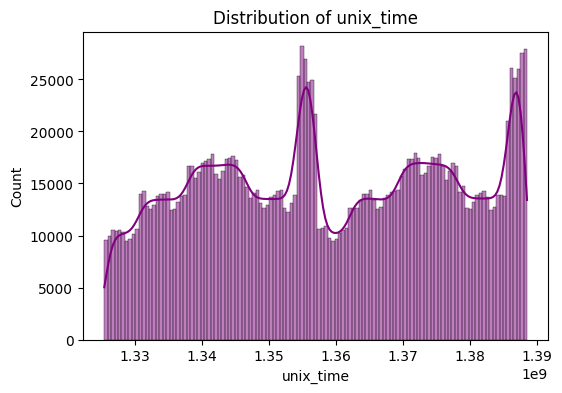

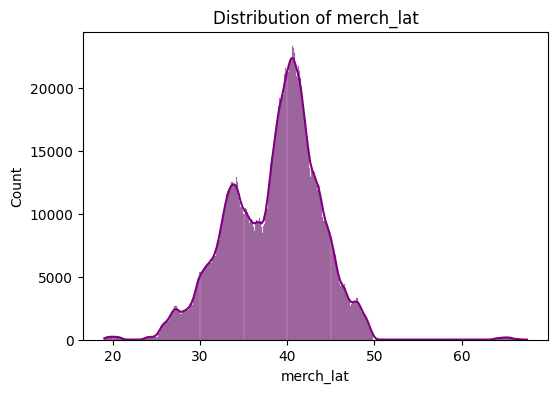

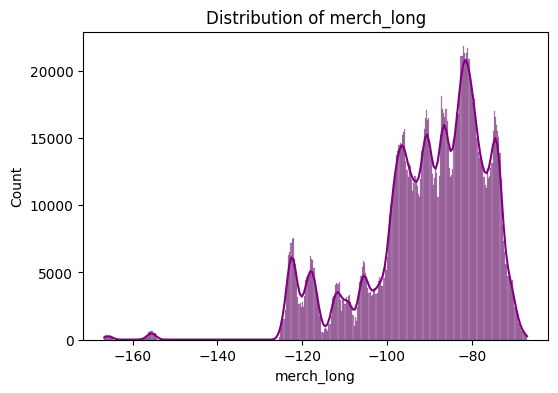

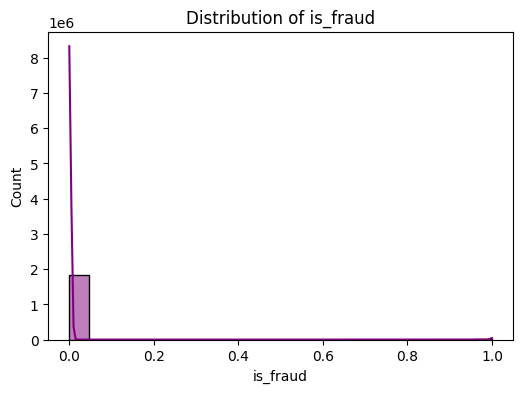

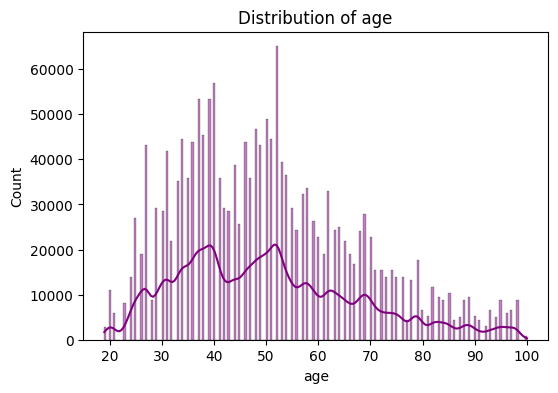

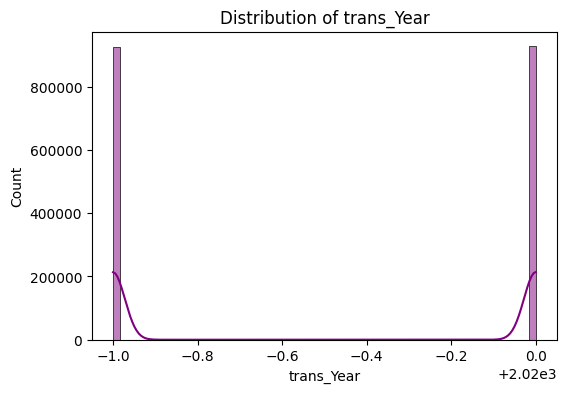

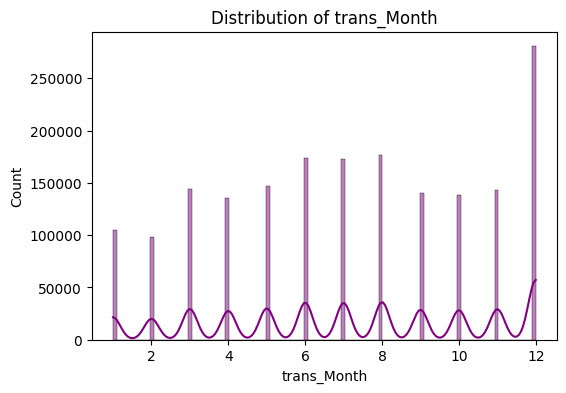

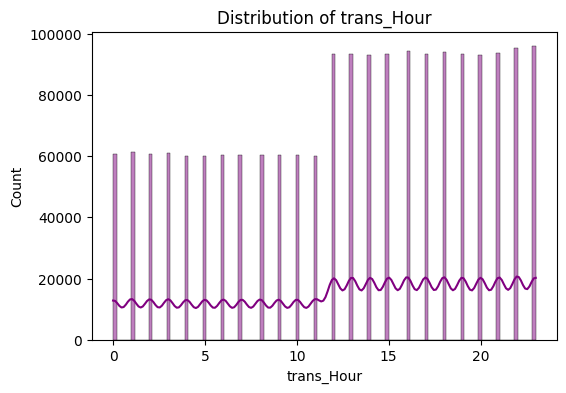

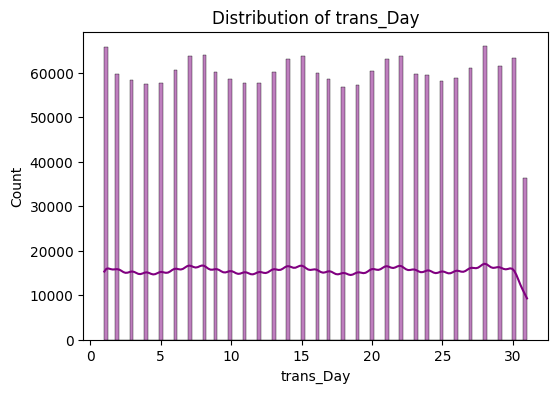

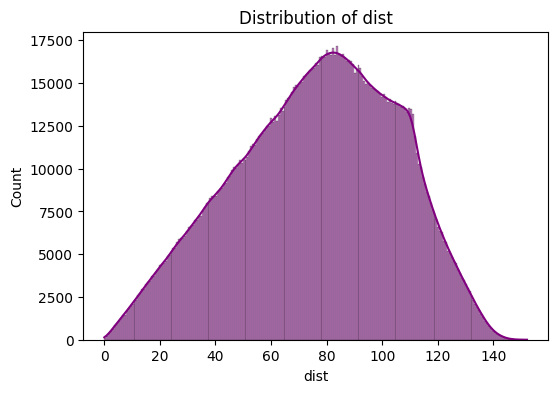

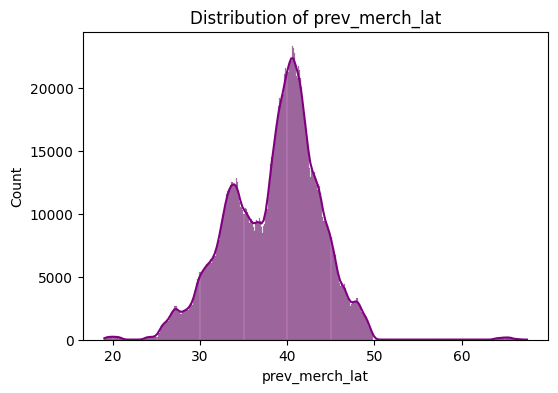

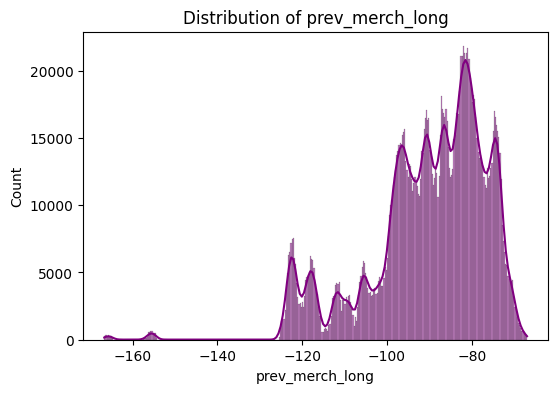

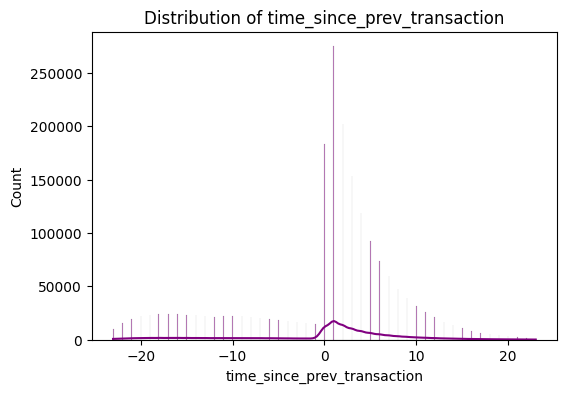

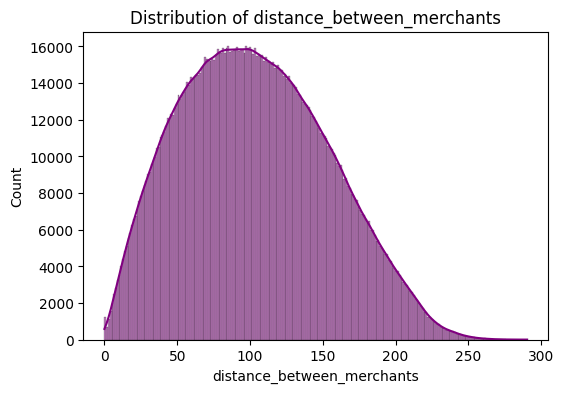

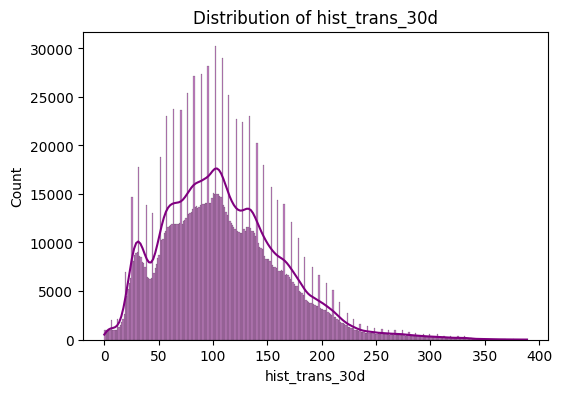

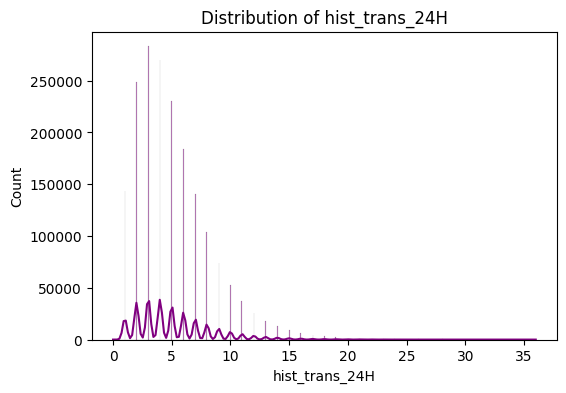

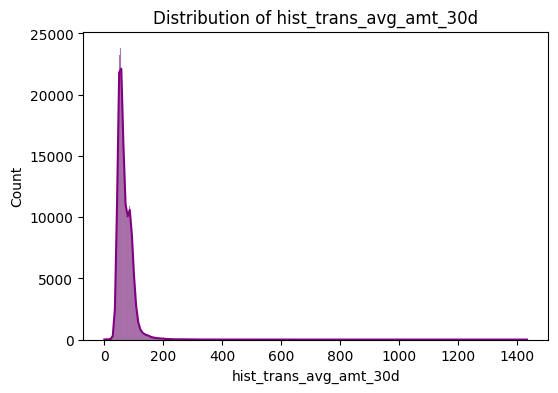

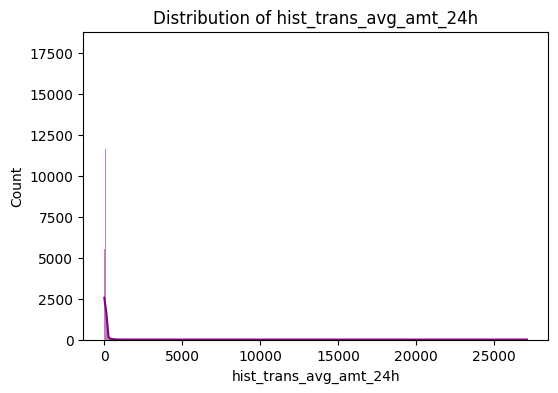

In [ ]:
numerical_features = fraud_data.select_dtypes(include=[np.number]).columns
fraud_data.value_counts()
# Checking skewness
skewness = fraud_data[numerical_features].skew()
print("Skewness of numerical features:")
print(skewness)

# Plotting distribution to visualize skewness
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(fraud_data[feature], kde=True, color='purple')
    plt.title(f'Distribution of {feature}')
    plt.show()

The amt variable is highly positively skewed, suggesting most transactions are of low value with a few high-value outliers

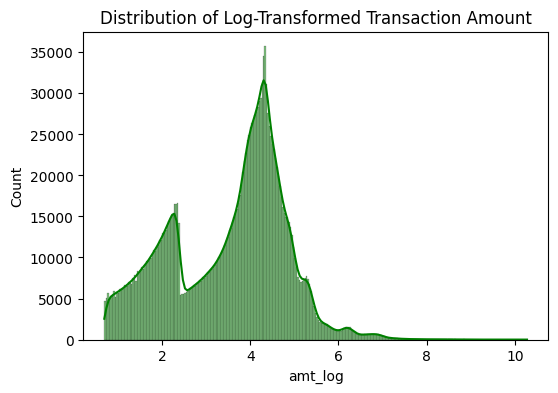

In [ ]:
# Log transformation to handle skewness in 'amt'
fraud_data['amt_log'] = np.log1p(fraud_data['amt'])  # log1p is used to handle zero values

# Visualizing the transformed feature
plt.figure(figsize=(6, 4))
sns.histplot(fraud_data['amt_log'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Transaction Amount')
plt.show()

# **Cost Benifit Analysis (Part I)**

#### **Average number of transactions per month**

In [ ]:
fraud_data.shape

(1852394, 40)

In [ ]:
Average_number_of_transactions_per_month= fraud_data.shape[0]/24
print(f'Average number of transactions per month:{round(Average_number_of_transactions_per_month,2)}')

Average number of transactions per month:77183.08


#### **Average number of fraudulent transaction per month**

In [ ]:
# Filter fraudulent transactions
fraudulent_transactions = fraud_data[fraud_data["is_fraud"] == 1]

# Grouping by 'trans_Date' (monthly frequency) and 'cc_num', and counting 'trans_num'
df1 = fraudulent_transactions.groupby([pd.Grouper(key='trans_Date', freq='1M'), 'cc_num'])['trans_num'].count().unstack()

# Count of transactions for each month across all credit cards (sum across columns)
mean_per_month = df1.sum(axis=1)

# Total number of fraud transactions across all months
total = mean_per_month.sum()

# Calculate the average number of fraud transactions per month (assuming 24 months)
Average_number_of_fraud_transactions_per_month = total / 24

# Display the result
print(f'Average number of fraudulent transaction per month:{round(Average_number_of_fraud_transactions_per_month,2)}')

Average number of fraudulent transaction per month:402.12


#### **Average_amount_per_fraud_transaction**

In [ ]:
# Calculate the total amount for fraudulent transactions
amount_total = fraudulent_transactions['amt'].sum()

# Calculate the average amount per fraud transaction
Average_amount_per_fraud_transaction = amount_total / fraudulent_transactions.shape[0]

# Group by 'trans_year_month' and calculate the mean amount per month
monthly_avg_amount = fraudulent_transactions.groupby('trans_year_month')['amt'].mean()

# Use describe() to get the summary statistics for the monthly average transaction amounts
monthly_avg_amount_stats = monthly_avg_amount.describe()

# Display the result
print(f'Average amount per fraud transaction:{round(monthly_avg_amount_stats,2)}')

Average amount per fraud transaction:count     24.00
mean     530.42
std       26.95
min      481.05
25%      514.36
50%      528.65
75%      545.53
max      596.18
Name: amt, dtype: float64


# **Cost Benefit Analysis(PART I)**
          Questions                                           Answer
    1. Average number of transactions per month              77183.08
    2. Average number of fraudulent transaction per month    402.12
    3. Average amount per fraud transaction                  530.42
        

#### **Preparing the data for modelling**

In [ ]:
fraud_data.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'trans_Date', 'trans_Time', 'state_Region', 'age', 'age_bin',
       'trans_Year', 'trans_year_month', 'trans_Month', 'trans_Hour',
       'trans_Day', 'trans_weekday', 'dist', 'prev_merch_lat',
       'prev_merch_long', 'time_since_prev_transaction',
       'distance_between_merchants', 'hist_trans_30d', 'hist_trans_24H',
       'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h', 'amt_log'],
      dtype='object')

In [ ]:
fraud_data.shape

(1852394, 40)

### check correlations

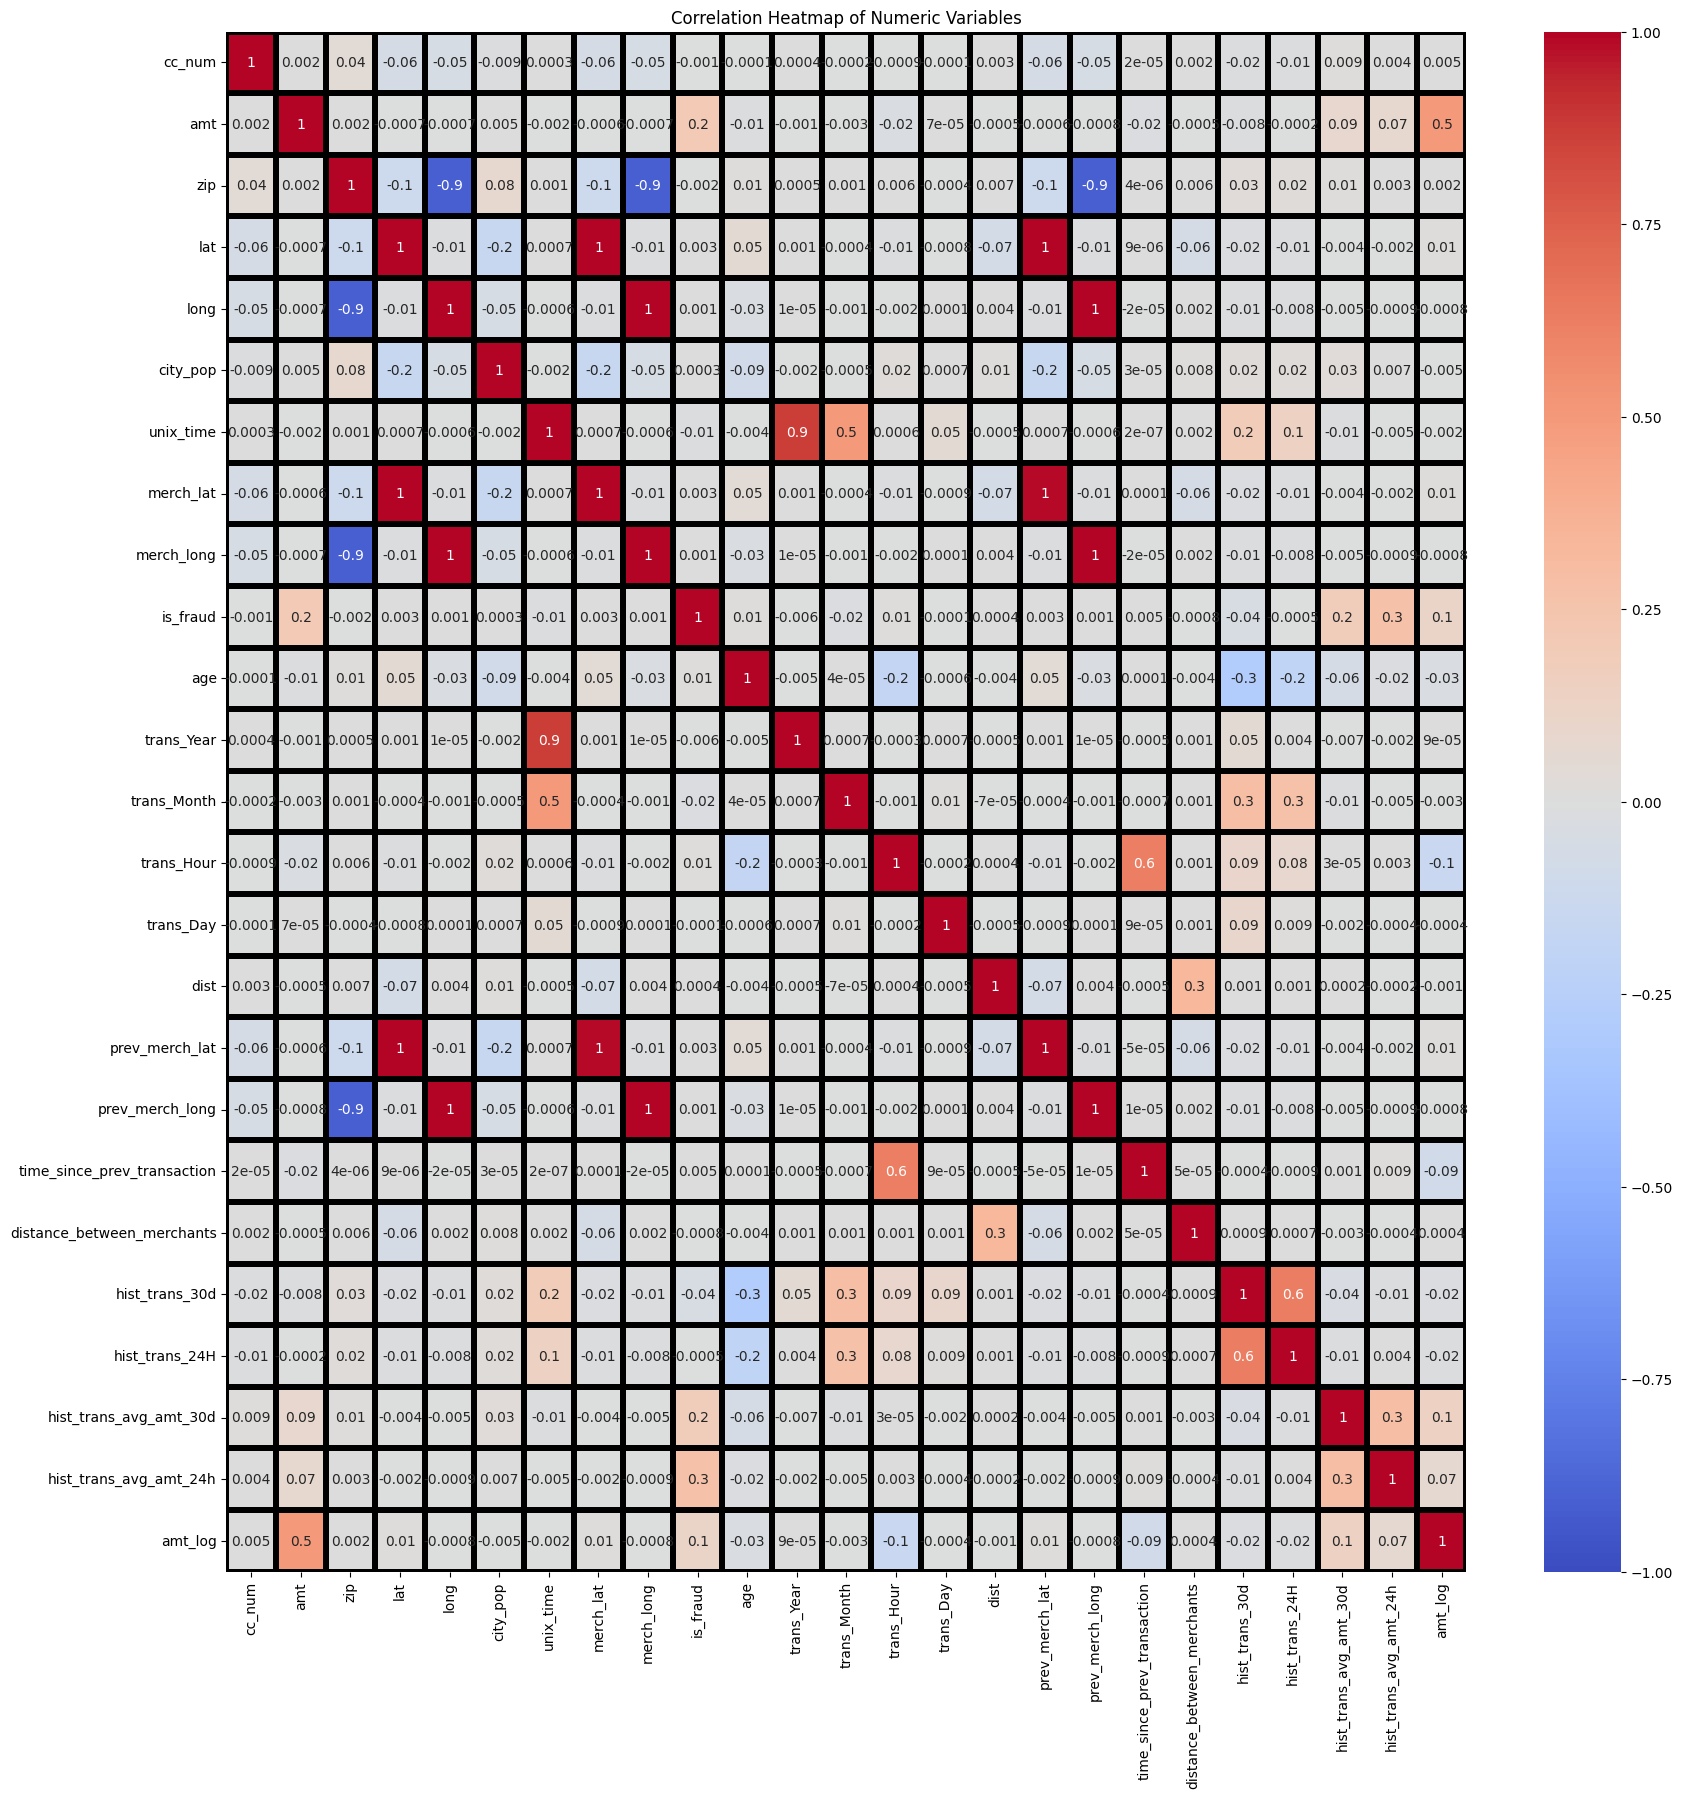

In [ ]:
# Select only numeric columns
numeric_fraud_data = fraud_data.select_dtypes(include=[np.number])

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_fraud_data.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, linewidths=3, linecolor='black', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

the variables whose correlation more than 0.7 is taken as high correlated and unnecessary value and will drop them

In [ ]:
fraud_data= fraud_data.drop(['prev_merch_lat','prev_merch_long','merch_lat','merch_long','zip'],axis=1)
fraud_data= fraud_data.drop(['age_bin','trans_Date','unix_time', 'trans_Day','trans_year_month'],axis=1)
fraud_data= fraud_data.drop(['trans_Time','trans_date_trans_time','dob', 'state_Region'],axis=1)
fraud_data.shape

(1852394, 26)

In [ ]:
fraud_data.head()

cc_num                            merchant       category  \
0  2703186189652095          fraud_Rippin, Kub and Mann       misc_net   
1      630423337322     fraud_Heller, Gutmann and Zieme    grocery_pos   
2    38859492057661                fraud_Lind-Buckridge  entertainment   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell  gas_transport   
4   375534208663984                 fraud_Keeling-Crist       misc_pos   

      amt gender            city state      lat      long  city_pop  \
0    4.97      F  Moravian Falls    NC  36.0788  -81.1781      3495   
1  107.23      F          Orient    WA  48.8878 -118.2105       149   
2  220.11      M      Malad City    ID  42.1808 -112.2620      4154   
3   45.00      M         Boulder    MT  46.2306 -112.1138      1939   
4   41.96      M        Doe Hill    VA  38.4207  -79.4629        99   

            job                         trans_num  is_fraud  age  trans_Year  \
0  Psychologist  0b242abb623afc578575680df30655b9         0   36        2019   
1       Teacher  1f76529f8574734946361c461b024d99         0   46        2019   
2       Officer  a1a22d70485983eac12b5b88dad1cf95         0   62        2019   
3        OTHERS  6b849c168bdad6f867558c3793159a81         0   57        2019   
4     Therapist  a41d7549acf90789359a9aa5346dcb46         0   38        2019   

   trans_Month  trans_Hour trans_weekday    dist  time_since_prev_transaction  \
0            1           0       Tuesday   78.60                          0.0   
1            1           0       Tuesday   30.21                          0.0   
2            1           0       Tuesday  108.21                          0.0   
3            1           0       Tuesday   95.67                          0.0   
4            1           0       Tuesday   77.56                          0.0   

   distance_between_merchants  hist_trans_30d  hist_trans_24H  \
0                         0.0           109.0             6.0   
1                         0.0            53.0             1.0   
2                         0.0             8.0             5.0   
3                         0.0           181.0             5.0   
4                         0.0           218.0             6.0   

   hist_trans_avg_amt_30d  hist_trans_avg_amt_24h   amt_log  
0               70.974587               95.641667  1.786747  
1               50.883962               12.110000  4.684259  
2              377.925000              445.778000  5.398660  
3               59.307403               42.454000  3.828641  
4               67.148991               78.120000  3.760269

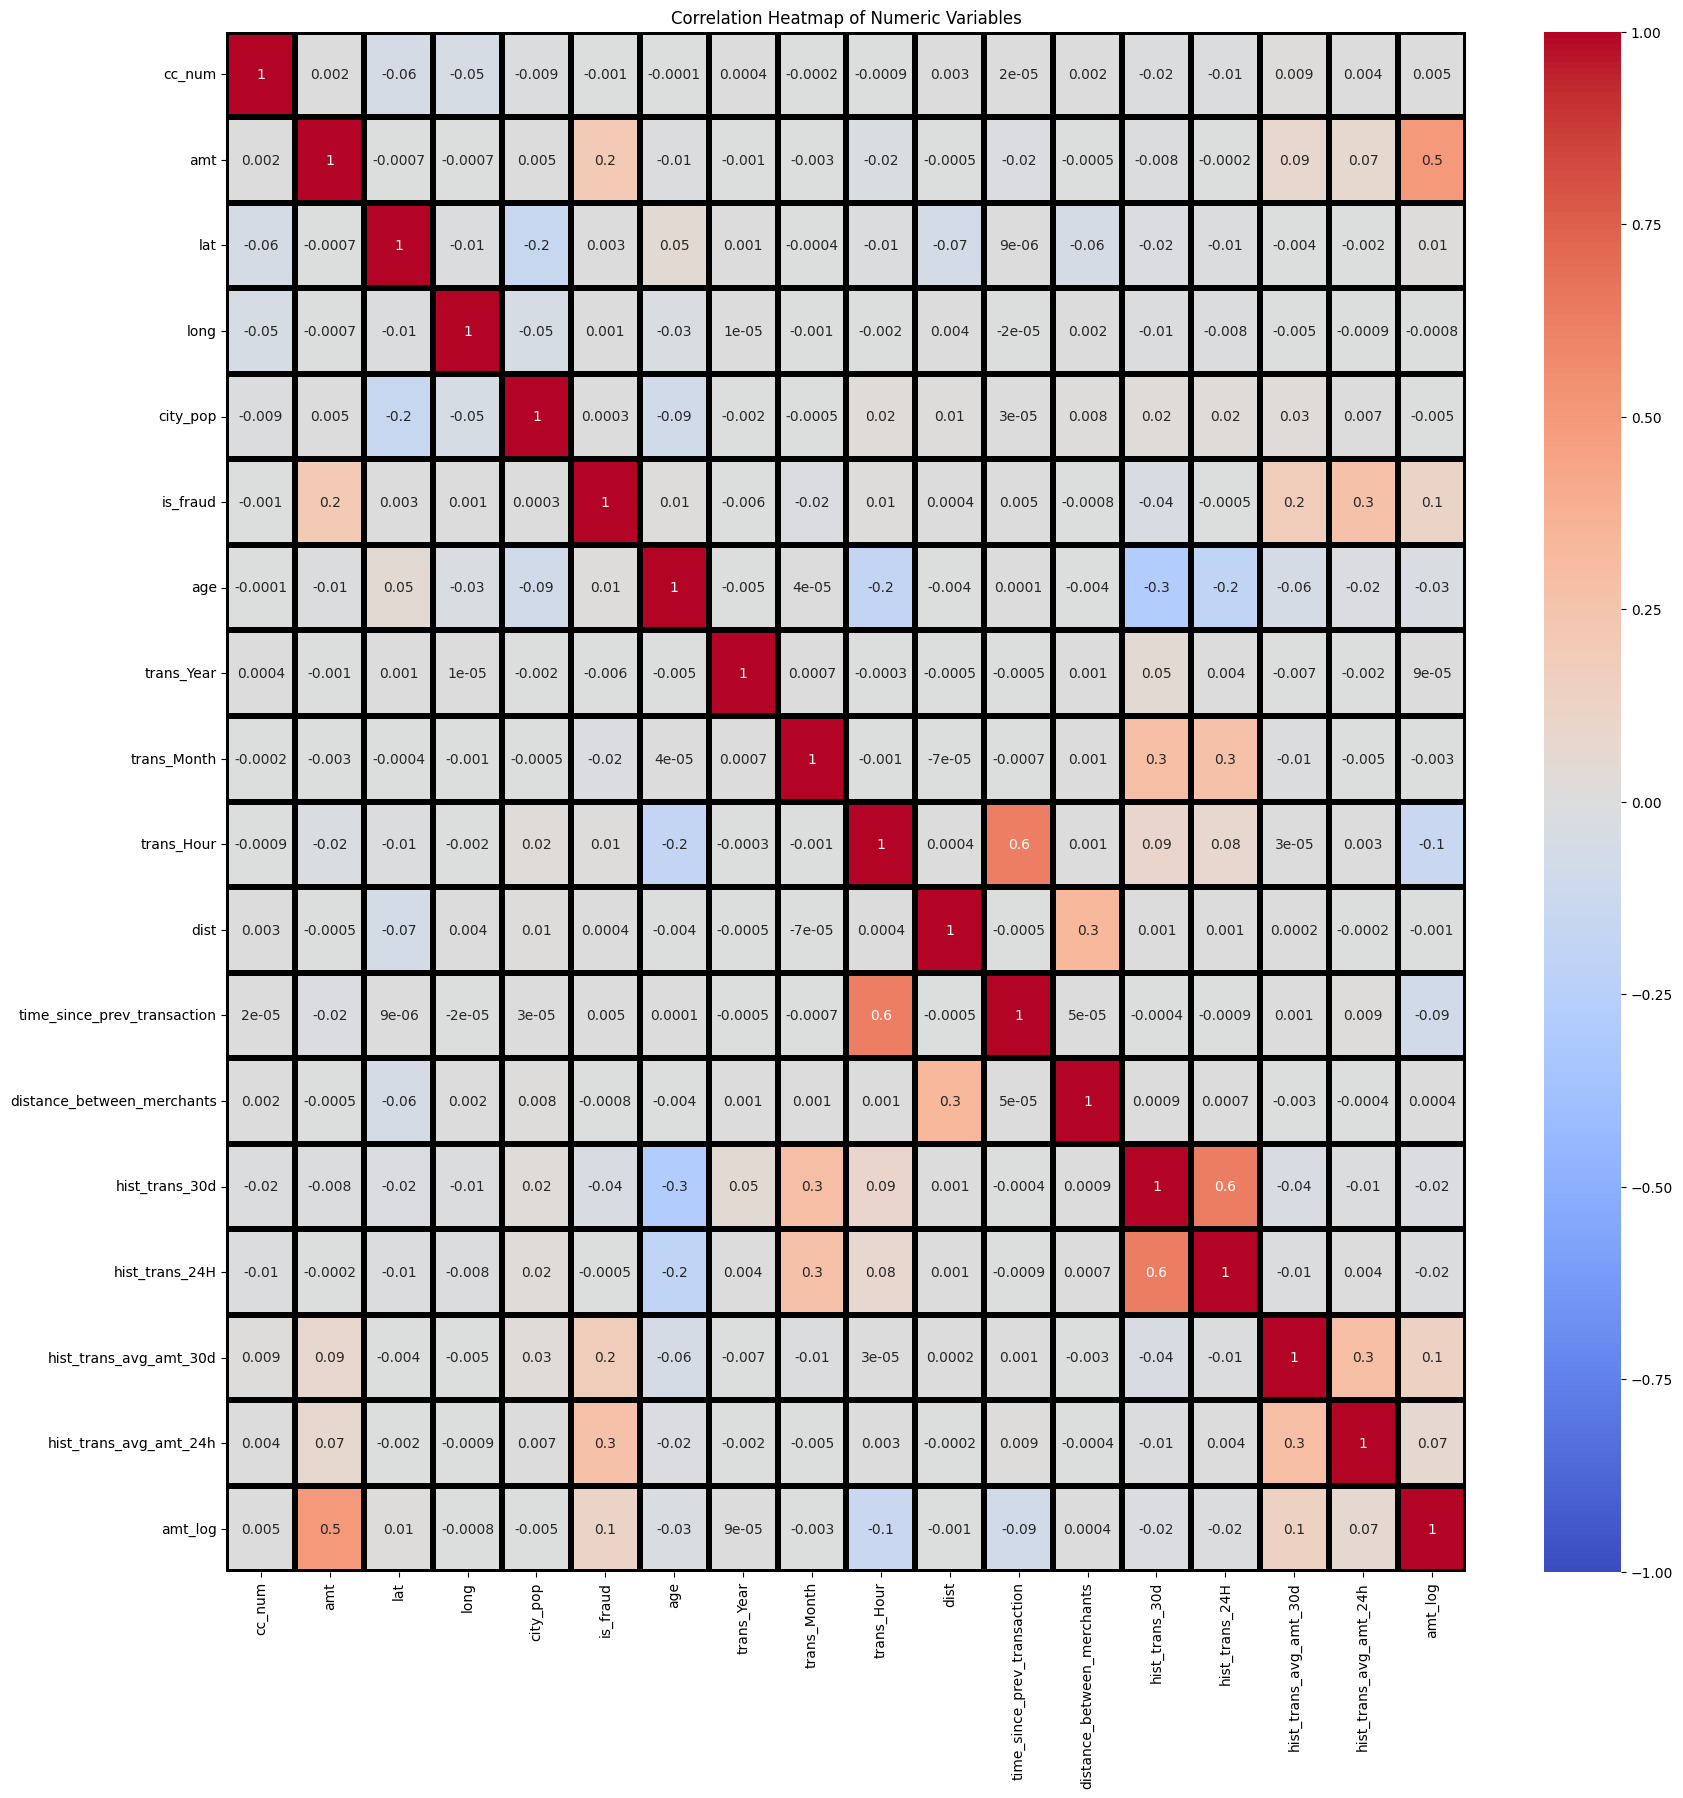

In [ ]:
# Select only numeric columns for the correlation matrix
numeric_fraud_data = fraud_data.select_dtypes(include=[np.number])

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_fraud_data.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, linewidths=3, linecolor='black', cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [ ]:
fraud_data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'trans_num', 'is_fraud', 'age',
       'trans_Year', 'trans_Month', 'trans_Hour', 'trans_weekday', 'dist',
       'time_since_prev_transaction', 'distance_between_merchants',
       'hist_trans_30d', 'hist_trans_24H', 'hist_trans_avg_amt_30d',
       'hist_trans_avg_amt_24h', 'amt_log'],
      dtype='object')

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     object 
 2   category                     object 
 3   amt                          float64
 4   gender                       object 
 5   city                         object 
 6   state                        object 
 7   lat                          float64
 8   long                         float64
 9   city_pop                     int64  
 10  job                          object 
 11  trans_num                    object 
 12  is_fraud                     int64  
 13  age                          int64  
 14  trans_Year                   int32  
 15  trans_Month                  int32  
 16  trans_Hour                   int32  
 17  trans_weekday                object 
 18  dist                         float64
 19  

##### **Creating dummy varaibles**

In [ ]:
# List of columns for which we want to create dummy variables
categorical_columns = ['category', 'gender', 'trans_weekday', 'trans_Month', 'trans_Year']

# Create dummy variables for all the categorical columns in one step
fraud_data_dummies = pd.get_dummies(fraud_data, columns=categorical_columns, drop_first=True, prefix=categorical_columns)

# Display the shape of the updated dataframe
fraud_data_dummies.shape

(1852394, 53)

In [ ]:
fraud_data

cc_num                            merchant        category  \
0        2703186189652095          fraud_Rippin, Kub and Mann        misc_net   
1            630423337322     fraud_Heller, Gutmann and Zieme     grocery_pos   
2          38859492057661                fraud_Lind-Buckridge   entertainment   
3        3534093764340240  fraud_Kutch, Hermiston and Farrell   gas_transport   
4         375534208663984                 fraud_Keeling-Crist        misc_pos   
...                   ...                                 ...             ...   
1852389    30560609640617               fraud_Reilly and Sons  health_fitness   
1852390  3556613125071656                fraud_Hoppe-Parisian       kids_pets   
1852391  6011724471098086                     fraud_Rau-Robel       kids_pets   
1852392     4079773899158               fraud_Breitenberg LLC          travel   
1852393  4170689372027579                   fraud_Dare-Marvin   entertainment   

            amt gender            city state      lat      long  city_pop  \
0          4.97      F  Moravian Falls    NC  36.0788  -81.1781      3495   
1        107.23      F          Orient    WA  48.8878 -118.2105       149   
2        220.11      M      Malad City    ID  42.1808 -112.2620      4154   
3         45.00      M         Boulder    MT  46.2306 -112.1138      1939   
4         41.96      M        Doe Hill    VA  38.4207  -79.4629        99   
...         ...    ...             ...   ...      ...       ...       ...   
1852389   43.77      M           Luray    MO  40.4931  -91.8912       519   
1852390  111.84      M    Lake Jackson    TX  29.0393  -95.4401     28739   
1852391   86.88      F         Burbank    WA  46.1966 -118.9017      3684   
1852392    7.99      M            Mesa    ID  44.6255 -116.4493       129   
1852393   38.13      M          Edmond    OK  35.6665  -97.4798    116001   

                    job                         trans_num  is_fraud  age  \
0          Psychologist  0b242abb623afc578575680df30655b9         0   36   
1               Teacher  1f76529f8574734946361c461b024d99         0   46   
2               Officer  a1a22d70485983eac12b5b88dad1cf95         0   62   
3                OTHERS  6b849c168bdad6f867558c3793159a81         0   57   
4             Therapist  a41d7549acf90789359a9aa5346dcb46         0   38   
...                 ...                               ...       ...  ...   
1852389    Town planner  9b1f753c79894c9f4b71f04581835ada         0   58   
1852390  Futures trader  2090647dac2c89a1d86c514c427f5b91         0   25   
1852391        Musician  6c5b7c8add471975aa0fec023b2e8408         0   43   
1852392          OTHERS  14392d723bb7737606b2700ac791b7aa         0   59   
1852393           Buyer  1765bb45b3aa3224b4cdcb6e7a96cee3         0   31   

         trans_Year  trans_Month  trans_Hour trans_weekday    dist  \
0              2019            1           0       Tuesday   78.60   
1              2019            1           0       Tuesday   30.21   
2              2019            1           0       Tuesday  108.21   
3              2019            1           0       Tuesday   95.67   
4              2019            1           0       Tuesday   77.56   
...             ...          ...         ...           ...     ...   
1852389        2020           12          23      Thursday   77.03   
1852390        2020           12          23      Thursday  100.07   
1852391        2020           12          23      Thursday   80.76   
1852392        2020           12          23      Thursday   52.93   
1852393        2020           12          23      Thursday   72.44   

         time_since_prev_transaction  distance_between_merchants  \
0                                0.0                        0.00   
1                                0.0                        0.00   
2                                0.0                        0.00   
3                                0.0                        0.00   
4                          

In [ ]:
# Iterate over each column to get unique values and their counts
for column in fraud_data.columns:
    print(f"Column: {column}")

    # If the column is categorical or of type object, show value counts
    if pd.api.types.is_categorical_dtype(fraud_data[column]) or pd.api.types.is_object_dtype(fraud_data[column]):
        print(fraud_data[column].value_counts(), "\n")

    # If the column is numeric, print the unique values count
    else:
        print(f"Unique values: {fraud_data[column].nunique()}")
        print(fraud_data[column].value_counts(), "\n")

Column: cc_num
Unique values: 999
cc_num
6538441737335434    4392
30270432095985      4392
6538891242532018    4386
4642255475285942    4386
4364010865167176    4386
                    ... 
4734310647841293       7
6577777028615915       7
6011732631674654       7
4225628813173670       7
4295296907373          6
Name: count, Length: 999, dtype: int64 

Column: merchant
merchant
fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: count, Length: 693, dtype: int64 

Column: category
category
gas_transport     188029
grocery_pos       1

In [ ]:
# Get the count of unique values for each column
unique_counts = fraud_data.nunique()

# Display the unique counts for each column
print(unique_counts)

cc_num                             999
merchant                           693
category                            14
amt                              60616
gender                               2
city                               906
state                               51
lat                                983
long                               983
city_pop                           891
job                                 91
trans_num                      1852394
is_fraud                             2
age                                 82
trans_Year                           2
trans_Month                         12
trans_Hour                          24
trans_weekday                        7
dist                             14552
time_since_prev_transaction         47
distance_between_merchants       25684
hist_trans_30d                     390
hist_trans_24H                      37
hist_trans_avg_amt_30d         1788890
hist_trans_avg_amt_24h          694474
amt_log                  


- Curse of Dimensionality: - As we can see that we have lots of variables with more unique values. We can see that city had 906 distinct values which would make the higher number of features. For a feature with 3 levels we might be ok, but for a feature like "city" are introducing 900+ column into a original data set. By doing this we make the dataset triple the size of the dataset, and this spells trouble for machine learning due to "the curse of dimensionality".

#### **Label Enconding**

Label encoding is simply converting each value in a column to a number.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to be label encoded
columns_to_encode = ['state', 'job', 'merchant', 'city']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each column in the list
for column in columns_to_encode:
    fraud_data[column] = label_encoder.fit_transform(fraud_data[column])

# Display the first few rows to verify the encoding
fraud_data.head()

cc_num  merchant       category     amt gender  city  state  \
0  2703186189652095       514       misc_net    4.97      F   532     27   
1      630423337322       241    grocery_pos  107.23      F   619     47   
2    38859492057661       390  entertainment  220.11      M   474     13   
3  3534093764340240       360  gas_transport   45.00      M    84     26   
4   375534208663984       297       misc_pos   41.96      M   217     45   

       lat      long  city_pop  job                         trans_num  \
0  36.0788  -81.1781      3495   70  0b242abb623afc578575680df30655b9   
1  48.8878 -118.2105       149   81  1f76529f8574734946361c461b024d99   
2  42.1808 -112.2620      4154   61  a1a22d70485983eac12b5b88dad1cf95   
3  46.2306 -112.1138      1939   59  6b849c168bdad6f867558c3793159a81   
4  38.4207  -79.4629        99   85  a41d7549acf90789359a9aa5346dcb46   

   is_fraud  age  trans_Year  trans_Month  trans_Hour trans_weekday    dist  \
0         0   36        2019            1           0       Tuesday   78.60   
1         0   46        2019            1           0       Tuesday   30.21   
2         0   62        2019            1           0       Tuesday  108.21   
3         0   57        2019            1           0       Tuesday   95.67   
4         0   38        2019            1           0       Tuesday   77.56   

   time_since_prev_transaction  distance_between_merchants  hist_trans_30d  \
0                          0.0                         0.0           109.0   
1                          0.0                         0.0            53.0   
2                          0.0                         0.0             8.0   
3                          0.0                         0.0           181.0   
4                          0.0                         0.0           218.0   

   hist_trans_24H  hist_trans_avg_amt_30d  hist_trans_avg_amt_24h   amt_log  
0             6.0               70.974587               95.641667  1.786747  
1             1.0               50.883962               12.110000  4.684259  
2             5.0              377.925000              445.778000  5.398660  
3             5.0               59.307403               42.454000  3.828641  
4             6.0               67.148991               78.120000  3.760269

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     int64  
 2   category                     object 
 3   amt                          float64
 4   gender                       object 
 5   city                         int64  
 6   state                        int64  
 7   lat                          float64
 8   long                         float64
 9   city_pop                     int64  
 10  job                          int64  
 11  trans_num                    object 
 12  is_fraud                     int64  
 13  age                          int64  
 14  trans_Year                   int32  
 15  trans_Month                  int32  
 16  trans_Hour                   int32  
 17  trans_weekday                object 
 18  dist                         float64
 19  

In [ ]:
# Categorical columns to encode
categorical_features = ['category', 'gender', 'trans_weekday']

# Define ColumnTransformer for OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Apply preprocessing to the entire dataset before splitting
X_encoded = preprocessor.fit_transform(X)  # Apply encoding to the full dataset

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     int64  
 2   category                     object 
 3   amt                          float64
 4   gender                       object 
 5   city                         int64  
 6   state                        int64  
 7   lat                          float64
 8   long                         float64
 9   city_pop                     int64  
 10  job                          int64  
 11  trans_num                    object 
 12  is_fraud                     int64  
 13  age                          int64  
 14  trans_Year                   int32  
 15  trans_Month                  int32  
 16  trans_Hour                   int32  
 17  trans_weekday                object 
 18  dist                         float64
 19  

In [ ]:
fraud_data.head()

cc_num  merchant       category     amt gender  city  state  \
0  2703186189652095       514       misc_net    4.97      F   532     27   
1      630423337322       241    grocery_pos  107.23      F   619     47   
2    38859492057661       390  entertainment  220.11      M   474     13   
3  3534093764340240       360  gas_transport   45.00      M    84     26   
4   375534208663984       297       misc_pos   41.96      M   217     45   

       lat      long  city_pop  job                         trans_num  \
0  36.0788  -81.1781      3495   70  0b242abb623afc578575680df30655b9   
1  48.8878 -118.2105       149   81  1f76529f8574734946361c461b024d99   
2  42.1808 -112.2620      4154   61  a1a22d70485983eac12b5b88dad1cf95   
3  46.2306 -112.1138      1939   59  6b849c168bdad6f867558c3793159a81   
4  38.4207  -79.4629        99   85  a41d7549acf90789359a9aa5346dcb46   

   is_fraud  age  trans_Year  trans_Month  trans_Hour trans_weekday    dist  \
0         0   36        2019            1           0       Tuesday   78.60   
1         0   46        2019            1           0       Tuesday   30.21   
2         0   62        2019            1           0       Tuesday  108.21   
3         0   57        2019            1           0       Tuesday   95.67   
4         0   38        2019            1           0       Tuesday   77.56   

   time_since_prev_transaction  distance_between_merchants  hist_trans_30d  \
0                          0.0                         0.0           109.0   
1                          0.0                         0.0            53.0   
2                          0.0                         0.0             8.0   
3                          0.0                         0.0           181.0   
4                          0.0                         0.0           218.0   

   hist_trans_24H  hist_trans_avg_amt_30d  hist_trans_avg_amt_24h   amt_log  
0             6.0               70.974587               95.641667  1.786747  
1             1.0               50.883962               12.110000  4.684259  
2             5.0              377.925000              445.778000  5.398660  
3             5.0               59.307403               42.454000  3.828641  
4             6.0               67.148991               78.120000  3.760269

#### **Splitting the Data in to Target(y) and features(X)**

In [ ]:
# Split the dataset into features (X) and target (y)
X = fraud_data.drop(columns=['is_fraud','trans_num'])  # Assuming 'is_fraud' is the target column
y = fraud_data['is_fraud']

In [ ]:
X.shape

(1852394, 24)

In [ ]:
y.shape

##### **Spitting the X and y into Train and Test data set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,test_size=0.3,stratify = y,random_state=100)

In [ ]:
X_train.shape

(1296675, 44)

In [ ]:
X_test.shape

(555719, 44)

In [ ]:
y_train.shape

(1296675,)

In [ ]:
y_test.shape

(555719,)

##### **Checking for Class imbalance in Train & Test**

In [ ]:
y_train.value_counts(normalize=True)

is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

is_fraud
0    0.994791
1    0.005209
Name: proportion, dtype: float64

There is a lot of imbalance in data to handle the class imabalance in data

#### **Handling Data Imbalance**

#### **Using SMOTE(Synthetic Minority Oversampling Technique) technique to handle the data imbalance**

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Before SMOTE
print("Before SMOTE, counts of '0' & '1':", Counter(y_train))

# Apply SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)

# After SMOTE
print("After SMOTE, counts of '0' & '1':", Counter(y_resampled_smt))
print("Total samples after resampling:", len(X_resampled_smt))

Before SMOTE, counts of '0' & '1': Counter({0: 1289919, 1: 6756})
After SMOTE, counts of '0' & '1': Counter({0: 1289919, 1: 1289919})
Total samples after resampling: 2579838


#### **Using ADASYN(Adaptive Synthetic Sampling Approach for Imbalanced Learning) technique to handle the data imbalance**

In [ ]:
from collections import Counter
from imblearn.over_sampling import ADASYN

# Before applying ADASYN
print("Before ADASYN, label counts:", Counter(y_train))

# Apply ADASYN
ada = ADASYN(random_state=45)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)

# After applying ADASYN
print("After ADASYN, label counts:", Counter(y_resampled_ada))
print("Total samples after resampling:", len(X_resampled_ada))

Before ADASYN, label counts: Counter({0: 1289919, 1: 6756})
After ADASYN, label counts: Counter({0: 1289919, 1: 1288890})
Total samples after resampling: 2578809


In this case, the primary focus is on maximizing recall, which helps capture the most fraudulent transactions, even if it comes at the cost of lower precision. False positives are less of a concern, as the goal is to minimize missed fraudulent transactions (false negatives)

Recall is crucial when the cost of false negatives is high, as in fraud detection, where missing a fraudulent transaction can have serious consequences for the bank. Prioritizing recall helps minimize the risk of overlooking actual fraud cases.

# **Model Bulding**

### **Model : Decision Tree**

##### **Default Hyperparameters for SMOTE data**



In [ ]:
# Create and fit the decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_resampled_smt, y_resampled_smt)

# Make predictions
y_train_pred = dt.predict(X_resampled_smt)
y_test_pred = dt.predict(X_test)

# Print classification report for training set
print(classification_report(y_resampled_smt, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



Accuracy:  99.8%
F1 score:  84.9%
Recall:  86.8%
Precision:  83.0%
ROC(AUC) for the test dataset:  93.3%


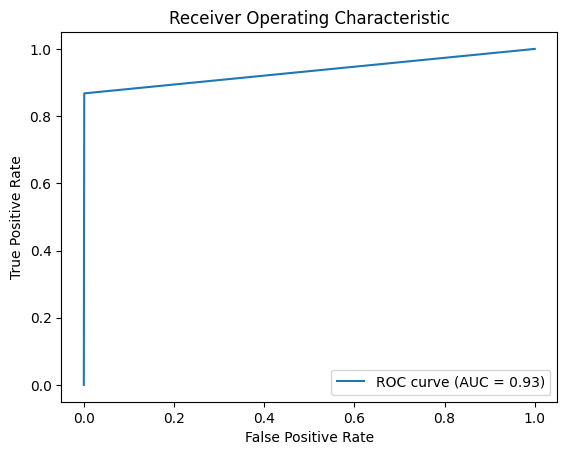


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.83      0.87      0.85      2895

    accuracy                           1.00    555719
   macro avg       0.91      0.93      0.92    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
 [[552310    514]
 [   383   2512]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Evaluation metrics
print('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_smt)))
print('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_smt)))
print('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_smt)))
print('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_smt)))

# ROC and AUC
pred_probs_test = dt_smt_default.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs_test)
roc_auc = auc(fpr, tpr)
print("ROC(AUC) for the test dataset: ", "{:.1%}".format(roc_auc))

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc=4)
plt.show()

# Classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_test_pred_dt_smt))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_test_pred_dt_smt))

<div class="alert alert-block alert-info">
    
As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail


In our as resultant AUC is 0.93, so our model is performing Excellent

In [ ]:
# Confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_test_pred_dt_smt).ravel()

# Sensitivity (Recall)
print(f"Sensitivity: {TP / (TP + FN):.1%}")

# Specificity
print(f"Specificity: {TN / (TN + FP):.1%}")

# False Positive Rate
print(f"False Positive Rate: {FP / (TN + FP):.1%}")

# Positive Predictive Value (Precision)
print(f"Positive Predictive Value: {TP / (TP + FP):.1%}")

# Negative Predictive Value
print(f"Negative Predictive Value: {TN / (TN + FN):.1%}")

Sensitivity: 86.8%
Specificity: 99.9%
False Positive Rate: 0.1%
Positive Predictive Value: 83.0%
Negative Predictive Value: 99.9%


#### **Inference:**
1.The model correctly identifies 99.9% of non-fraudulent.This shows that the model is very good at recognizing legitimate transactions and rarely flags them as fraud (false positive).
2.Only 0.1% of legitimate transactions are wrongly flagged as fraud, which is a low rate, meaning the model rarely raises unnecessary alarms.
3.When the model classifies a transaction as legitimate, it is correct 99.9% of the time. This shows strong confidence in correctly identifying non-fraudulent transactions.

**Summar:**
The model performs exceptionally well at detecting non-fraudulent transactions, as indicated by the high specificity (99.9%) and negative predictive value (99.9%).
The model is also strong in detecting fraudulent transactions, with a recall of 86.8%, meaning it catches most of the frauds.
There is a trade-off between precision (83.0%) and recall. While the model catches most frauds (high recall), it occasionally flags legitimate transactions as fraudulent (lower precision). However, the false positive rate remains very low at 0.1%, meaning the number of unnecessary alerts is minimal.

### **Default Hyperparameters for ADASYN data**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create and fit the Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_resampled_ada, y_resampled_ada)

# Make predictions
y_train_pred = dt.predict(X_resampled_ada)
y_test_pred = dt.predict(X_test)

# Print classification report for training set
print(classification_report(y_resampled_ada, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1288890

    accuracy                           1.00   2578809
   macro avg       1.00      1.00      1.00   2578809
weighted avg       1.00      1.00      1.00   2578809



#### **Making predictions on the test set**

Accuracy: 99.8%
F1 Score: 84.6%
Recall: 86.2%
Precision: 83.0%
ROC AUC: 93.1%


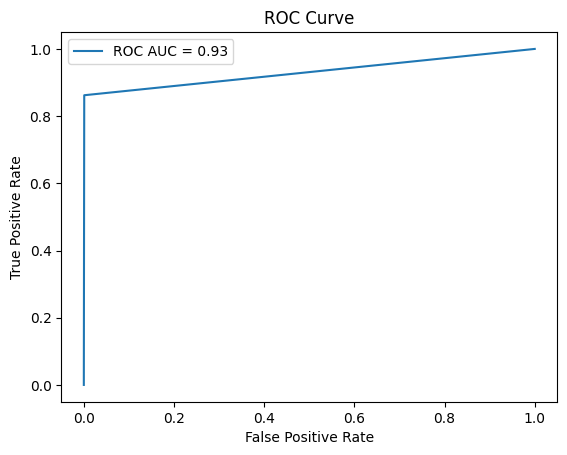


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.83      0.86      0.85      2895

    accuracy                           1.00    555719
   macro avg       0.91      0.93      0.92    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
 [[552312    512]
 [   399   2496]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Assuming you've already applied ADASYN and created X_resampled_ada, y_resampled_ada
# Train the Decision Tree model on ADASYN-resampled data
dt_ada_default = DecisionTreeClassifier(random_state=42)
dt_ada_default.fit(X_resampled_ada, y_resampled_ada)

# Make predictions for the test set
y_test_pred_dt_ada = dt_ada_default.predict(X_test)

# Basic evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dt_ada):.1%}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_dt_ada):.1%}")
print(f"Recall: {recall_score(y_test, y_test_pred_dt_ada):.1%}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt_ada):.1%}")

# ROC and AUC
pred_probs_test = dt_ada_default.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs_test)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.1%}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_dt_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_dt_ada))

###### **Since we got a value of 0.93, our model seems to be doing excellent on the test dataset.**

In [ ]:
# Confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_test_pred_dt_ada).ravel()

# Sensitivity (Recall)
print(f"Sensitivity: {TP / (TP + FN):.1%}")

# Specificity
print(f"Specificity: {TN / (TN + FP):.1%}")

# False Positive Rate
print(f"False Positive Rate: {FP / (TN + FP):.1%}")

# Positive Predictive Value (Precision)
print(f"Positive Predictive Value: {TP / (TP + FP):.1%}")

# Negative Predictive Value
print(f"Negative Predictive Value: {TN / (TN + FN):.1%}")

Sensitivity: 86.2%
Specificity: 99.9%
False Positive Rate: 0.1%
Positive Predictive Value: 83.0%
Negative Predictive Value: 99.9%


###   Clasification Report for Decision Tree on Test data on default Hyperparameter
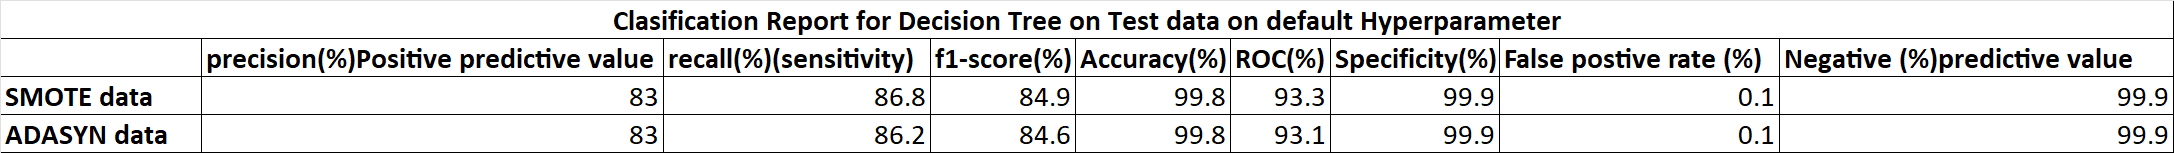

# **Hyper parameter tuning**

**Based on above analysis SMOTE technique has slight Higher ROC value i.e, 93.1 when compared to ADASYN technique i.e., 93.1, also having better f1-Score, recall, so we are moving with SMOTE data for hyper parameter tuning**

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [5,10,20],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [5,10,20],
     }
     from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           verbose=1,
                            cv=4,
                            n_jobs=-1,
                            scoring="recall")
%%time
grid_search.fit(X_resampled_smt, y_resampled_smt)
score_dt = pd.DataFrame(grid_search.cv_results_)
score_dt.head()
grid_search.best_score_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Define the Decision Tree and parameter grid
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [5, 10, 20]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           scoring="recall",
                           cv=4,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search on resampled data
grid_search.fit(X_resampled_smt, y_resampled_smt)

# Show the best score and the first few results
score_dt = pd.DataFrame(grid_search.cv_results_)
print("Best Recall Score: ", grid_search.best_score_)
score_dt.head()

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best Recall Score:  0.9990472271653036


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      47.507218      0.788826         0.229582        0.018322   
1      47.220085      0.603325         0.225200        0.035192   
2      47.335807      0.439402         0.205292        0.011440   
3      46.855114      0.752277         0.191084        0.011075   
4      45.723463      0.247639         0.222116        0.022559   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                      5                       5   
1               5                      5                      10   
2               5                      5                      20   
3               5                     10                       5   
4               5                     10                      10   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...           0.973294   
1  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...           0.973294   
2  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...           0.973294   
3  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...           0.973294   
4  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...           0.973294   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.969021            0.96832           0.973081         0.970929   
1           0.969021            0.96832           0.973081         0.970929   
2           0.969021            0.96832           0.973081         0.970929   
3           0.969021            0.96832           0.973081         0.970929   
4           0.969021            0.96832           0.973081         0.970929   

   std_test_score  rank_test_score  
0        0.002273               19  
1        0.002273               19  
2        0.002273               19  
3        0.002273               19  
4        0.002273               19

'The Grid_search.best_estimator_:- function returns the model that achieved the best performance based on the evaluation criteria provided during grid search. It identifies the combination of hyperparameters that produced the highest score according to the chosen scoring metric. In simpler terms, it gives you the model configuration that performed best on the validation data during cross-validation.

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

Since recall was chosen as the scoring metric in this grid search, the best_estimator_ will be the model that maximizes the recall score. This means it identifies the hyperparameters that resulted in the highest recall, which is essential for your business goal: to detect as many customers at risk of churn as possible. A high recall ensures that most of the customers who are likely to churn are correctly identified by the model. This aligns with your business need to capture nearly all potential churn cases, even if it leads to some false positives.

In [ ]:
y_train_pred_dt_hp_smt = dt_best.predict(X_resampled_smt)
y_test_pred_dt_hp_smt = dt_best.predict(X_test)
print(classification_report(y_resampled_smt, y_train_pred_dt_hp_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



### **Making predictions on the test set**

Accuracy: 99.8%
F1 Score: 79.8%
Recall: 92.0%
Precision: 70.5%
ROC AUC: 96.7%


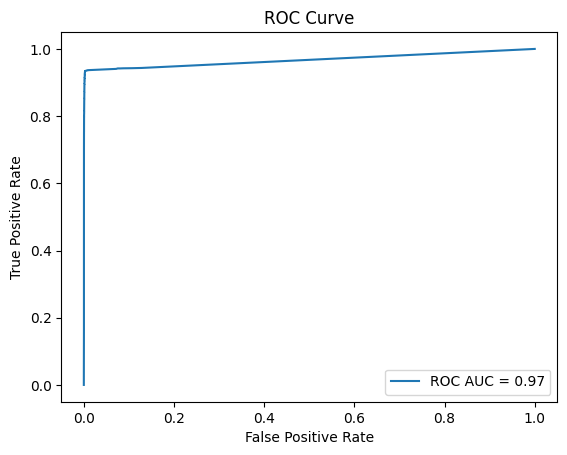


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.71      0.92      0.80      2895

    accuracy                           1.00    555719
   macro avg       0.85      0.96      0.90    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
 [[551711   1113]
 [   233   2662]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Basic evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dt_hp_smt):.1%}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_dt_hp_smt):.1%}")
print(f"Recall: {recall_score(y_test, y_test_pred_dt_hp_smt):.1%}")
print(f"Precision: {precision_score(y_test, y_test_pred_dt_hp_smt):.1%}")

# ROC and AUC
pred_probs_test = dt_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs_test)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.1%}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_dt_hp_smt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_dt_hp_smt))

### **Inference:-** Since we got a value of 0.97, our model seems to be doing execellent on the test dataset.

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_test_pred_dt_hp_smt).ravel()

# Sensitivity (Recall)
print(f"Sensitivity: {TP / (TP + FN):.1%}")

# Specificity
print(f"Specificity: {TN / (TN + FP):.1%}")

# False Positive Rate
print(f"False Positive Rate: {FP / (TN + FP):.1%}")

# Positive Predictive Value (Precision)
print(f"Positive Predictive Value: {TP / (TP + FP):.1%}")

# Negative Predictive Value
print(f"Negative Predictive Value: {TN / (TN + FN):.1%}")

Sensitivity: 92.0%
Specificity: 99.8%
False Positive Rate: 0.2%
Positive Predictive Value: 70.5%
Negative Predictive Value: 100.0%


In [ ]:
dt_best.feature_importances_

array([2.61463707e-03, 6.26871272e-03, 2.48707018e-02, 6.96925639e-03,
       1.43950563e-02, 7.97296111e-04, 3.38141006e-03, 1.91916475e-03,
       6.61623050e-04, 3.47517041e-03, 1.55579744e-03, 1.02760531e-03,
       3.29430482e-03, 1.92255762e-03, 1.32333013e-04, 4.35385474e-05,
       9.98464305e-05, 1.31204704e-04, 9.08816218e-05, 2.50160131e-05,
       8.44682163e-05, 1.33797015e-05, 2.27234946e-04, 1.64900946e-04,
       1.52448501e-04, 1.47672743e-01, 3.38564277e-04, 2.71888117e-04,
       1.16549748e-03, 5.55779555e-04, 9.56840643e-04, 3.52339973e-04,
       3.24640939e-03, 1.88498711e-05, 8.31097836e-04, 4.76974414e-03,
       3.19198095e-04, 1.61882356e-03, 2.40790245e-04, 1.31400828e-03,
       3.81070592e-03, 1.02539029e-03, 7.03801729e-01, 5.33710538e-02])

In [ ]:
# Assuming 'preprocessor' is the transformer used to preprocess the data
feature_names = preprocessor.get_feature_names_out()

imp_df = pd.DataFrame({
    "Varname": feature_names,  # Use the names from the preprocessor
    "Importance": dt_best.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display the top 10 most important features
imp_df.head(10)

Varname  Importance
42  remainder__hist_trans_avg_amt_24h    0.703802
25                     remainder__amt    0.147673
43                 remainder__amt_log    0.053371
2         cat__category_gas_transport    0.024871
4           cat__category_grocery_pos    0.014395
3           cat__category_grocery_net    0.006969
1           cat__category_food_dining    0.006269
35              remainder__trans_Hour    0.004770
40          remainder__hist_trans_24H    0.003811
9              cat__category_misc_pos    0.003475


###   Clasification Report for Decision Tree on Test data on SMOTE Hyperparameter Tunning
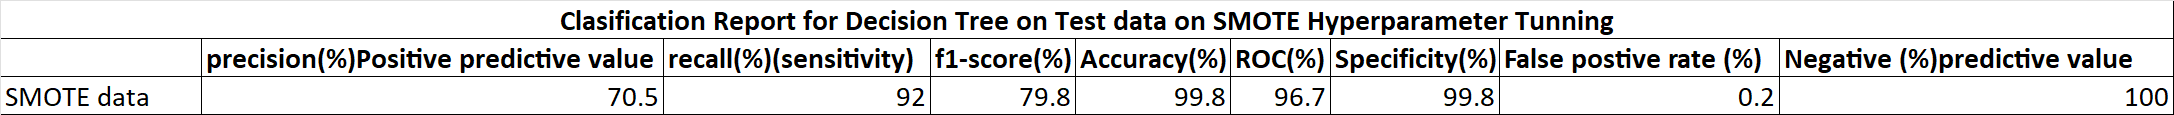

# **Model : Random Forest**

## **Default Hyperparameters for SMOTE data**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and fit the Random Forest model with default hyperparameters on SMOTE data
rf_smt_default = RandomForestClassifier(random_state=100, oob_score=True)
rf_smt_default.fit(X_resampled_smt, y_resampled_smt)

# Out-of-bag score
print(f"OOB Score: {rf_smt_default.oob_score_:.2f}")

# Make predictions for training and test sets
y_train_pred_rf_smt = rf_smt_default.predict(X_resampled_smt)
y_test_pred_rf_smt = rf_smt_default.predict(X_test)

# Print classification report for training set
print("\nClassification Report (Training Set):\n", classification_report(y_resampled_smt, y_train_pred_rf_smt))

OOB Score: 1.00

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



### **Making predictions on the test set**

Accuracy: 99.9%
F1 Score: 91.4%
Recall: 87.7%
Precision: 95.5%
ROC AUC: 99.6%


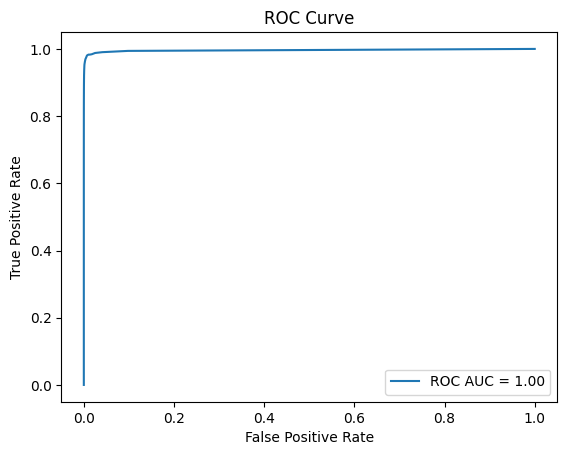


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.95      0.88      0.91      2895

    accuracy                           1.00    555719
   macro avg       0.98      0.94      0.96    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
 [[552704    120]
 [   355   2540]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Basic evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf_smt):.1%}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_rf_smt):.1%}")
print(f"Recall: {recall_score(y_test, y_test_pred_rf_smt):.1%}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf_smt):.1%}")

# ROC and AUC
pred_probs_test = rf_smt_default.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs_test)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.1%}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf_smt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf_smt))

### **Inference:-** Since we got a value of AUC as 1.00, our model seems to be doing excellent on the test dataset

In [ ]:
# Confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_test_pred_rf_smt).ravel()

# Sensitivity (Recall)
print(f"Sensitivity: {TP / (TP + FN):.1%}")

# Specificity
print(f"Specificity: {TN / (TN + FP):.1%}")

# False Positive Rate
print(f"False Positive Rate: {FP / (TN + FP):.1%}")

# Positive Predictive Value (Precision)
print(f"Positive Predictive Value: {TP / (TP + FP):.1%}")

# Negative Predictive Value
print(f"Negative Predictive Value: {TN / (TN + FN):.1%}")

Sensitivity: 87.7%
Specificity: 100.0%
False Positive Rate: 0.0%
Positive Predictive Value: 95.5%
Negative Predictive Value: 99.9%


### **Default Hyperparameters for ADASYN data**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and fit the Random Forest model on ADASYN data
rf_ada_default = RandomForestClassifier(random_state=100, oob_score=True)
rf_ada_default.fit(X_resampled_ada, y_resampled_ada)

# OOB score
print(f"OOB Score: {rf_ada_default.oob_score_:.2f}")

# Make predictions on the training and test sets
y_train_pred_rf_ada = rf_ada_default.predict(X_resampled_ada)
y_test_pred_rf_ada = rf_ada_default.predict(X_test)

# Print classification report for the training set
print("\nClassification Report (Training Set):\n", classification_report(y_resampled_ada, y_train_pred_rf_ada))

OOB Score: 1.00

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1288890

    accuracy                           1.00   2578809
   macro avg       1.00      1.00      1.00   2578809
weighted avg       1.00      1.00      1.00   2578809



#### **Making predictions on the test set**

Accuracy: 99.9%
F1 Score: 91.1%
Recall: 87.5%
Precision: 95.0%
ROC AUC: 99.6%


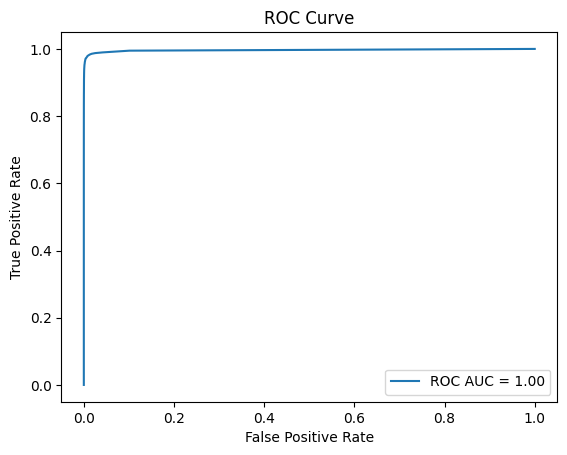


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.95      0.87      0.91      2895

    accuracy                           1.00    555719
   macro avg       0.97      0.94      0.96    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
 [[552691    133]
 [   363   2532]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Basic evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf_ada):.1%}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_rf_ada):.1%}")
print(f"Recall: {recall_score(y_test, y_test_pred_rf_ada):.1%}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf_ada):.1%}")

# ROC and AUC
pred_probs_test = rf_ada_default.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs_test)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.1%}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf_ada))

#### **Inference:- Since we got a value of 1.00, our model seems to be doing excellent on the test dataset.**

In [ ]:
# Confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_test_pred_rf_ada).ravel()

# Sensitivity (Recall)
print(f"Sensitivity: {TP / (TP + FN):.1%}")

# Specificity
print(f"Specificity: {TN / (TN + FP):.1%}")

# False Positive Rate
print(f"False Positive Rate: {FP / (TN + FP):.1%}")

# Positive Predictive Value (Precision)
print(f"Positive Predictive Value: {TP / (TP + FP):.1%}")

# Negative Predictive Value
print(f"Negative Predictive Value: {TN / (TN + FN):.1%}")

Sensitivity: 87.5%
Specificity: 100.0%
False Positive Rate: 0.0%
Positive Predictive Value: 95.0%
Negative Predictive Value: 99.9%


###   Clasification Report for Random forest on Test data on default Hyperparameter
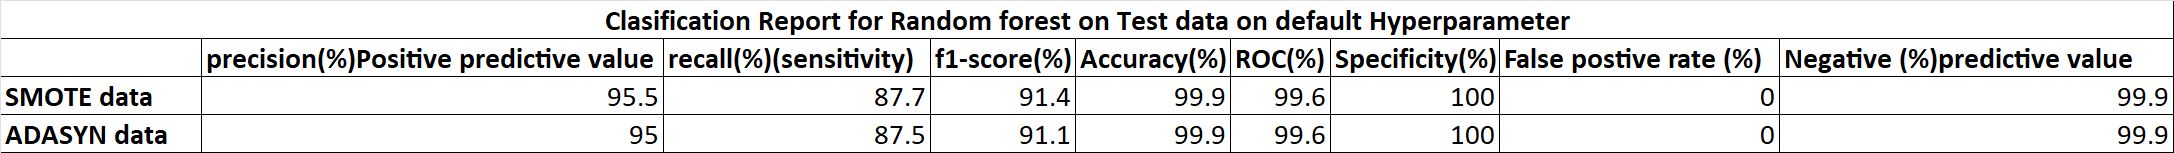

##**Hyper-parameter tuning**

**Based on results SMOTE is choosen**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import time

# Start time measurement
start_time = time.time()

# Define the Random Forest model and parameter grid
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [10, 20],
    'min_samples_leaf': [5, 10],
    'n_estimators': [5, 10],
    'min_samples_split': [5, 10]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=params,
                                   n_iter=50,
                                   scoring="recall",
                                   cv=4,
                                   verbose=1,
                                   return_train_score=True,
                                   n_jobs=-1)

# Run the random search
random_search.fit(X_resampled_smt, y_resampled_smt)

# End time measurement
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

# Save the results and get the best score and estimator
score_rf = pd.DataFrame(random_search.cv_results_)
print(score_rf.head())
print("Best Recall Score: ", random_search.best_score_)

# Get the best estimator
rf_best = random_search.best_estimator_
print(rf_best)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
Execution Time: 821.84 seconds
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      64.936769      1.422728         0.746182        0.126326   
1      89.035239      1.845739         1.214889        0.182057   
2      47.902949      2.584865         1.216381        0.263804   
3      83.327102      2.057533         1.025398        0.192064   
4      54.319453      2.913559         0.625691        0.116719   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                  5                       5                      5   
1                 10                       5                      5   
2                  5                      10                      5   
3                 10                      10                      5   
4                  5                       5                     10   

  param_max_depth                                             params  \
0     

In [ ]:
# Predictions on training and test sets
y_train_pred_rf_hp_smt = rf_best.predict(X_resampled_smt)
y_test_pred_rf_hp_smt = rf_best.predict(X_test)

# Classification report for training set
print(classification_report(y_resampled_smt, y_train_pred_rf_hp_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



##### **Making predictions on the test set**

##### **Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.**

Accuracy: 99.8%
F1 Score: 82.9%
Recall: 91.6%
Precision: 75.7%
ROC AUC: 99.2%


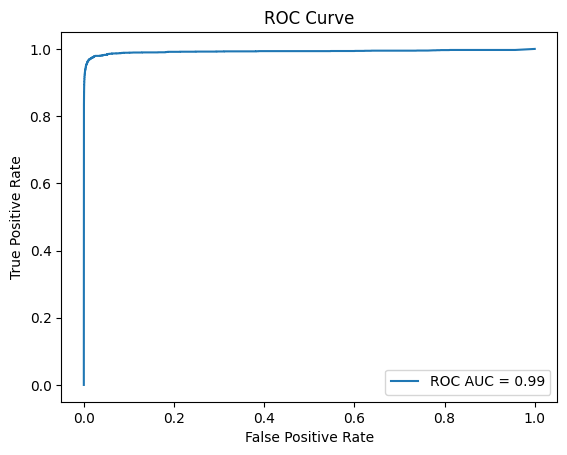


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.76      0.92      0.83      2895

    accuracy                           1.00    555719
   macro avg       0.88      0.96      0.91    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
 [[551974    850]
 [   242   2653]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_rf_hp_smt):.1%}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_rf_hp_smt):.1%}")
print(f"Recall: {recall_score(y_test, y_test_pred_rf_hp_smt):.1%}")
print(f"Precision: {precision_score(y_test, y_test_pred_rf_hp_smt):.1%}")

# ROC and AUC
pred_probs_test = rf_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs_test)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.1%}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_rf_hp_smt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf_hp_smt))

The Grid_search.best_estimator_:- function returns the model that achieved the best performance based on the evaluation criteria provided during grid search. It identifies the combination of hyperparameters that produced the highest score according to the chosen scoring metric. In simpler terms, it gives you the model configuration that performed best on the validation data during cross-validation.

In [ ]:
# Confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_test_pred_rf_hp_smt).ravel()

# Sensitivity (Recall)
print(f"Sensitivity: {TP / (TP + FN):.1%}")

# Specificity
print(f"Specificity: {TN / (TN + FP):.1%}")

# False Positive Rate
print(f"False Positive Rate: {FP / (TN + FP):.1%}")

# Positive Predictive Value (Precision)
print(f"Positive Predictive Value: {TP / (TP + FP):.1%}")

# Negative Predictive Value
print(f"Negative Predictive Value: {TN / (TN + FN):.1%}")

Sensitivity: 91.6%
Specificity: 99.8%
False Positive Rate: 0.2%
Positive Predictive Value: 75.7%
Negative Predictive Value: 100.0%


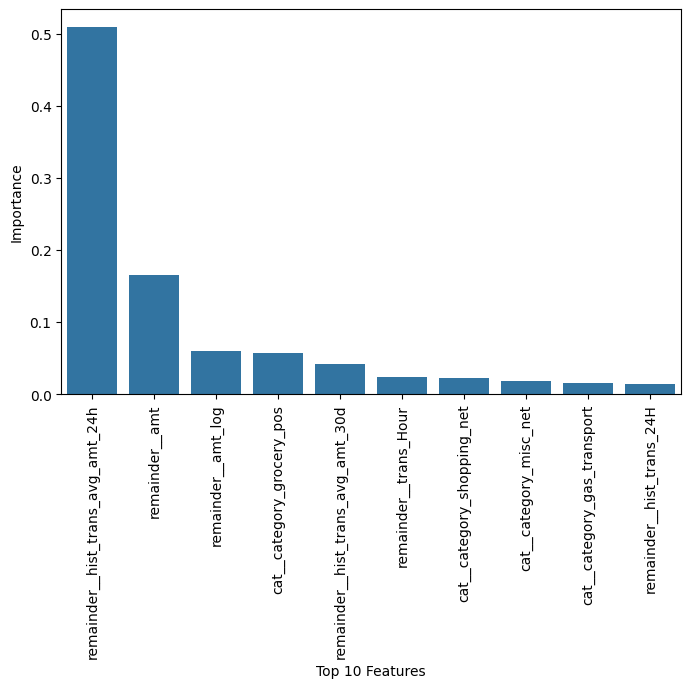

In [ ]:
# Assuming you used a preprocessor with a OneHotEncoder or similar
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame for feature importances
imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_best.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot the top 10 features
plt.figure(figsize=(8, 5))
sns.barplot(x='Feature', y='Importance', data=imp_df.head(10))
plt.xticks(rotation=90)
plt.xlabel('Top 10 Features')
plt.ylabel('Importance')
plt.show()

#### **Inference:**
Since we used recall as the scoring metric, the best estimator from the grid search will be the model that achieves the highest recall score.

We chose recall because our business goal is to capture as many customers at risk of churning as possible. A high recall ensures that the model identifies nearly all customers likely to churn.

###   Clasification Report for Random Forest on Test data on SMOTE Hyperparameter Tunning
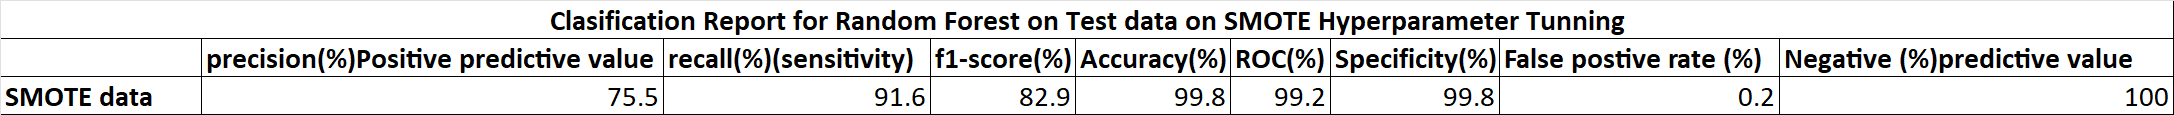

##**Model 3. Xgboost**

#### **Default Hyperparameters for SMOTE data**

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Fit the XGBoost model with default hyperparameters on SMOTE data
model_xgb = XGBClassifier(random_state=100)
model_xgb.fit(X_resampled_smt, y_resampled_smt)

# Predictions on training and test sets
y_train_pred_xgb = model_xgb.predict(X_resampled_smt)
y_test_pred_xgb = model_xgb.predict(X_test)

# Print classification report for the training set
print("\nClassification Report (Training Set):\n", classification_report(y_resampled_smt, y_train_pred_xgb))


Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



##### **Making predictions on the test set**

Accuracy: 99.9%
F1 Score: 93.1%
Recall: 95.6%
Precision: 90.7%
ROC AUC: 99.9%


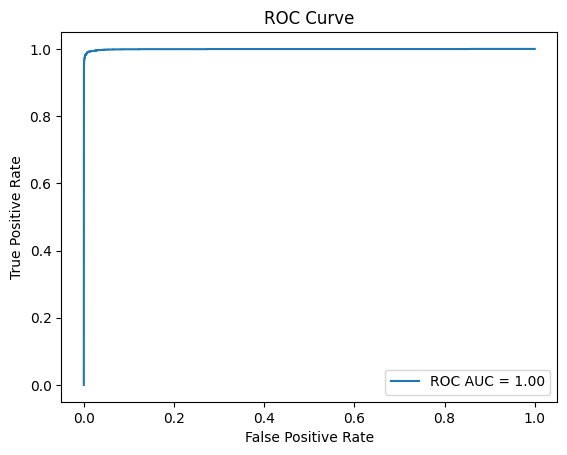


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.91      0.96      0.93      2895

    accuracy                           1.00    555719
   macro avg       0.95      0.98      0.97    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
 [[552541    283]
 [   127   2768]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.1%}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_xgb):.1%}")
print(f"Recall: {recall_score(y_test, y_test_pred_xgb):.1%}")
print(f"Precision: {precision_score(y_test, y_test_pred_xgb):.1%}")

# ROC and AUC
pred_probs_test = model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs_test)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.1%}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_xgb))

**Inference:** Since we got a value of 1, our model seems to be doing excellent on the test dataset.

In [ ]:
# Confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_test_pred_xgb).ravel()

# Sensitivity (Recall)
print(f"Sensitivity: {TP / (TP + FN):.1%}")

# Specificity
print(f"Specificity: {TN / (TN + FP):.1%}")

# False Positive Rate
print(f"False Positive Rate: {FP / (TN + FP):.1%}")

# Positive Predictive Value (Precision)
print(f"Positive Predictive Value: {TP / (TP + FP):.1%}")

# Negative Predictive Value
print(f"Negative Predictive Value: {TN / (TN + FN):.1%}")

Sensitivity: 95.6%
Specificity: 99.9%
False Positive Rate: 0.1%
Positive Predictive Value: 90.7%
Negative Predictive Value: 100.0%


#### **Default Hyperparameters for ADASYN data**

In [ ]:
# Fit the XGBoost model on ADASYN data
model_xgb.fit(X_resampled_ada, y_resampled_ada)

# Predictions on training and test sets
y_train_pred_xgb = model_xgb.predict(X_resampled_ada)
y_test_pred_xgb = model_xgb.predict(X_test)

# Print classification report for the training set
print(classification_report(y_resampled_ada, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1288890

    accuracy                           1.00   2578809
   macro avg       1.00      1.00      1.00   2578809
weighted avg       1.00      1.00      1.00   2578809



Accuracy: 99.9%
F1 Score: 92.6%
Recall: 95.2%
Precision: 90.2%
ROC AUC: 99.9%


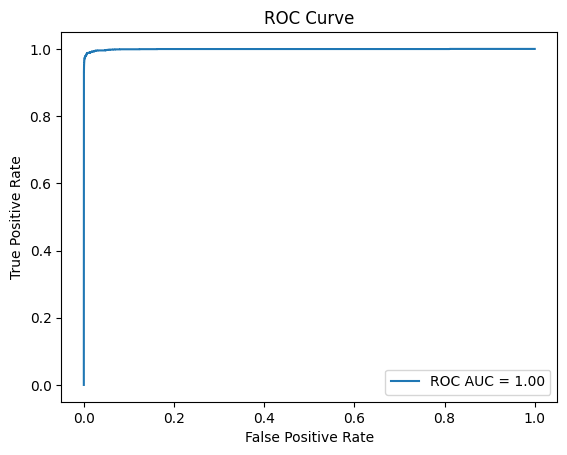


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.90      0.95      0.93      2895

    accuracy                           1.00    555719
   macro avg       0.95      0.98      0.96    555719
weighted avg       1.00      1.00      1.00    555719

TN: 552526, FP: 298, FN: 140, TP: 2755


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Basic evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_xgb):.1%}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_xgb):.1%}")
print(f"Recall: {recall_score(y_test, y_test_pred_xgb):.1%}")
print(f"Precision: {precision_score(y_test, y_test_pred_xgb):.1%}")

# ROC and AUC
pred_probs_test = model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs_test)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.1%}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_xgb))

# Confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

**Inference:- Since we got a value of 1.00, our model seems to be doing excellent on the test dataset.**

In [ ]:
# Confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_test_pred_xgb).ravel()

# Sensitivity (Recall)
print(f"Sensitivity: {TP / (TP + FN):.1%}")

# Specificity
print(f"Specificity: {TN / (TN + FP):.1%}")

# False Positive Rate
print(f"False Positive Rate: {FP / (TN + FP):.1%}")

# Positive Predictive Value (Precision)
print(f"Positive Predictive Value: {TP / (TP + FP):.1%}")

# Negative Predictive Value
print(f"Negative Predictive Value: {TN / (TN + FN):.1%}")

Sensitivity: 95.2%
Specificity: 99.9%
False Positive Rate: 0.1%
Positive Predictive Value: 90.2%
Negative Predictive Value: 100.0%


###   Clasification Report for XGBoost on Test data on default Hyperparameter
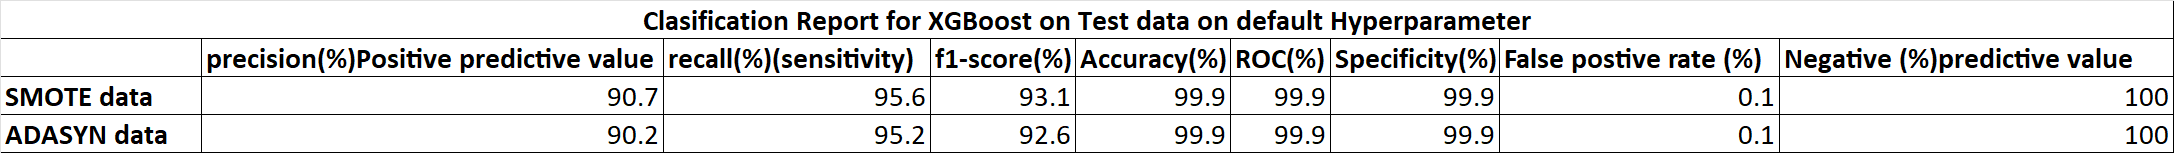

#### **Hyper-parameter tuning**

**SMOTE deafult XBGoost ig giving better results than ADASYN XGBoost**

tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

Fitting 3 folds for each of 36 candidates, totalling 108 fits
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
16      17.753233       0.94914         0.786515        0.012223   

   param_learning_rate param_max_depth param_n_estimators param_subsample  \
16                 0.2              10                100             0.6   

                                               params  split0_test_score  \
16  {'learning_rate': 0.2, 'max_depth': 10, 'n_est...           0.999847   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
16           0.999995           0.999998         0.999947        0.000071   

    rank_test_score  split0_train_score  split1_train_score  \
16                1            0.999999            0.999987   

    split2_train_score  mean_train_score  std_train_score  
16            0.999991          0.999992         0.000005  


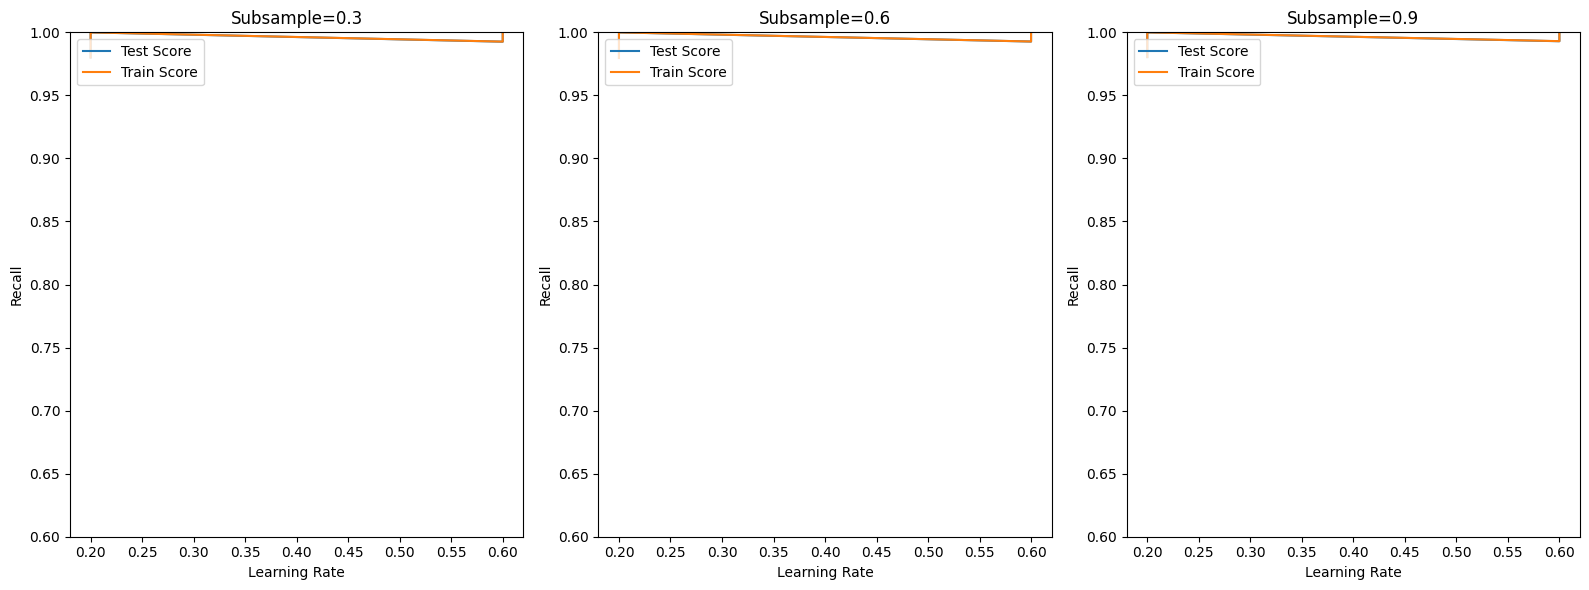

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier

# Hyperparameter tuning with XGBoost
folds = 3

# Specify range of hyperparameters
param_grid = {
    'learning_rate': [0.2, 0.6],
    'subsample': [0.3, 0.6, 0.9],
    'max_depth': [2, 5, 10],
    'n_estimators': [50, 100]
}

# Model and GridSearchCV setup
xgb_model = XGBClassifier(objective='binary:logistic', random_state=100)
model_cv = GridSearchCV(estimator=xgb_model,
                        param_grid=param_grid,
                        scoring='recall',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_resampled_smt, y_resampled_smt)

# Get best results
cv_results = pd.DataFrame(model_cv.cv_results_)
best_result = cv_results[cv_results['rank_test_score'] == 1]
print(best_result)

# Plotting learning rate vs test and train scores for each subsample
plt.figure(figsize=(16, 6))

for n, subsample in enumerate(param_grid['subsample']):
    plt.subplot(1, len(param_grid['subsample']), n + 1)
    df = cv_results[cv_results['param_subsample'] == subsample]
    plt.plot(df["param_learning_rate"], df["mean_test_score"], label='Test Score')
    plt.plot(df["param_learning_rate"], df["mean_train_score"], label='Train Score')
    plt.xlabel('Learning Rate')
    plt.ylabel('Recall')
    plt.title(f"Subsample={subsample}")
    plt.ylim([0.60, 1])
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Chosen hyperparameters
params = {
    'learning_rate': 0.2,
    'max_depth': 10,
    'n_estimators': 100,
    'subsample': 0.9,
    'objective': 'binary:logistic'
}

# Fit the model on training data
model_xgb_new = XGBClassifier(**params)
model_xgb_new.fit(X_resampled_smt, y_resampled_smt)

# Predictions on training and test sets
y_train_pred_xgb_hp = model_xgb_new.predict(X_resampled_smt)
y_test_pred_xgb_hp = model_xgb_new.predict(X_test)

# Print classification report for training set
print(classification_report(y_resampled_smt, y_train_pred_xgb_hp))

# Print classification report for test set
print(classification_report(y_test, y_test_pred_xgb_hp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.94      0.94      0.94      2895

    accuracy                           1.00    555719
   macro avg       0.97      0.97      0.97    555719
weighted avg       1.00      1.00      1.00    555719



**Making predictions on the test set**

Accuracy: 99.9%
F1 Score: 94.2%
Recall: 94.1%
Precision: 94.3%
ROC AUC: 99.9%


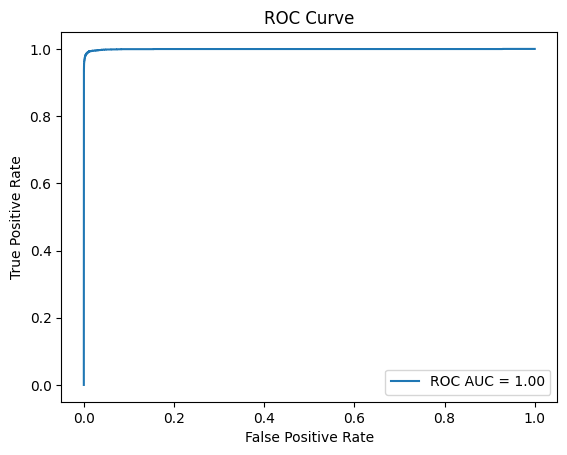


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.94      0.94      0.94      2895

    accuracy                           1.00    555719
   macro avg       0.97      0.97      0.97    555719
weighted avg       1.00      1.00      1.00    555719


Confusion Matrix:
 [[552658    166]
 [   172   2723]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_xgb_hp):.1%}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_xgb_hp):.1%}")
print(f"Recall: {recall_score(y_test, y_test_pred_xgb_hp):.1%}")
print(f"Precision: {precision_score(y_test, y_test_pred_xgb_hp):.1%}")

# ROC and AUC
pred_probs_test = model_xgb_new.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_probs_test)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.1%}")

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_xgb_hp))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred_xgb_hp))

### **Inference:-** Since we got a value of 1.00, our model seems to be doing excellent on the test dataset.

In [ ]:
# Confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_test_pred_xgb_hp).ravel()

# Sensitivity (Recall)
print(f"Sensitivity: {TP / (TP + FN):.1%}")

# Specificity
print(f"Specificity: {TN / (TN + FP):.1%}")

# False Positive Rate
print(f"False Positive Rate: {FP / (TN + FP):.1%}")

# Positive Predictive Value (Precision)
print(f"Positive Predictive Value: {TP / (TP + FP):.1%}")

# Negative Predictive Value
print(f"Negative Predictive Value: {TN / (TN + FN):.1%}")

Sensitivity: 94.1%
Specificity: 100.0%
False Positive Rate: 0.0%
Positive Predictive Value: 94.3%
Negative Predictive Value: 100.0%


In [ ]:
# Assuming you used a preprocessor like ColumnTransformer or OneHotEncoder
feature_names = preprocessor.get_feature_names_out()

# Create DataFrame for feature importances
imp_df = pd.DataFrame({
    "Varname": feature_names,
    "Importance": model_xgb_new.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top 10 important features
print(imp_df.head(10))

                              Varname  Importance
42  remainder__hist_trans_avg_amt_24h    0.587957
25                     remainder__amt    0.079409
2         cat__category_gas_transport    0.058964
43                 remainder__amt_log    0.040567
4           cat__category_grocery_pos    0.037595
3           cat__category_grocery_net    0.027964
1           cat__category_food_dining    0.016828
12         cat__category_shopping_pos    0.016002
0         cat__category_entertainment    0.014962
6                  cat__category_home    0.011892


### **Hyper-parameter tuning of xgboost for ADASYN data**

###   Clasification Report for XGBoost on Test data on SMOTE Hyperparameter Tunning

Clasification Report for XGBoost on Test data on default Hyperparameter
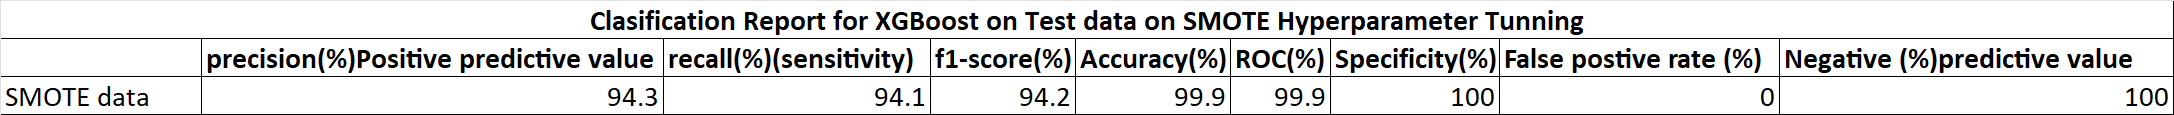

# **Model Conclusion**

#### **Compilation of models For Test data (Target 1)**

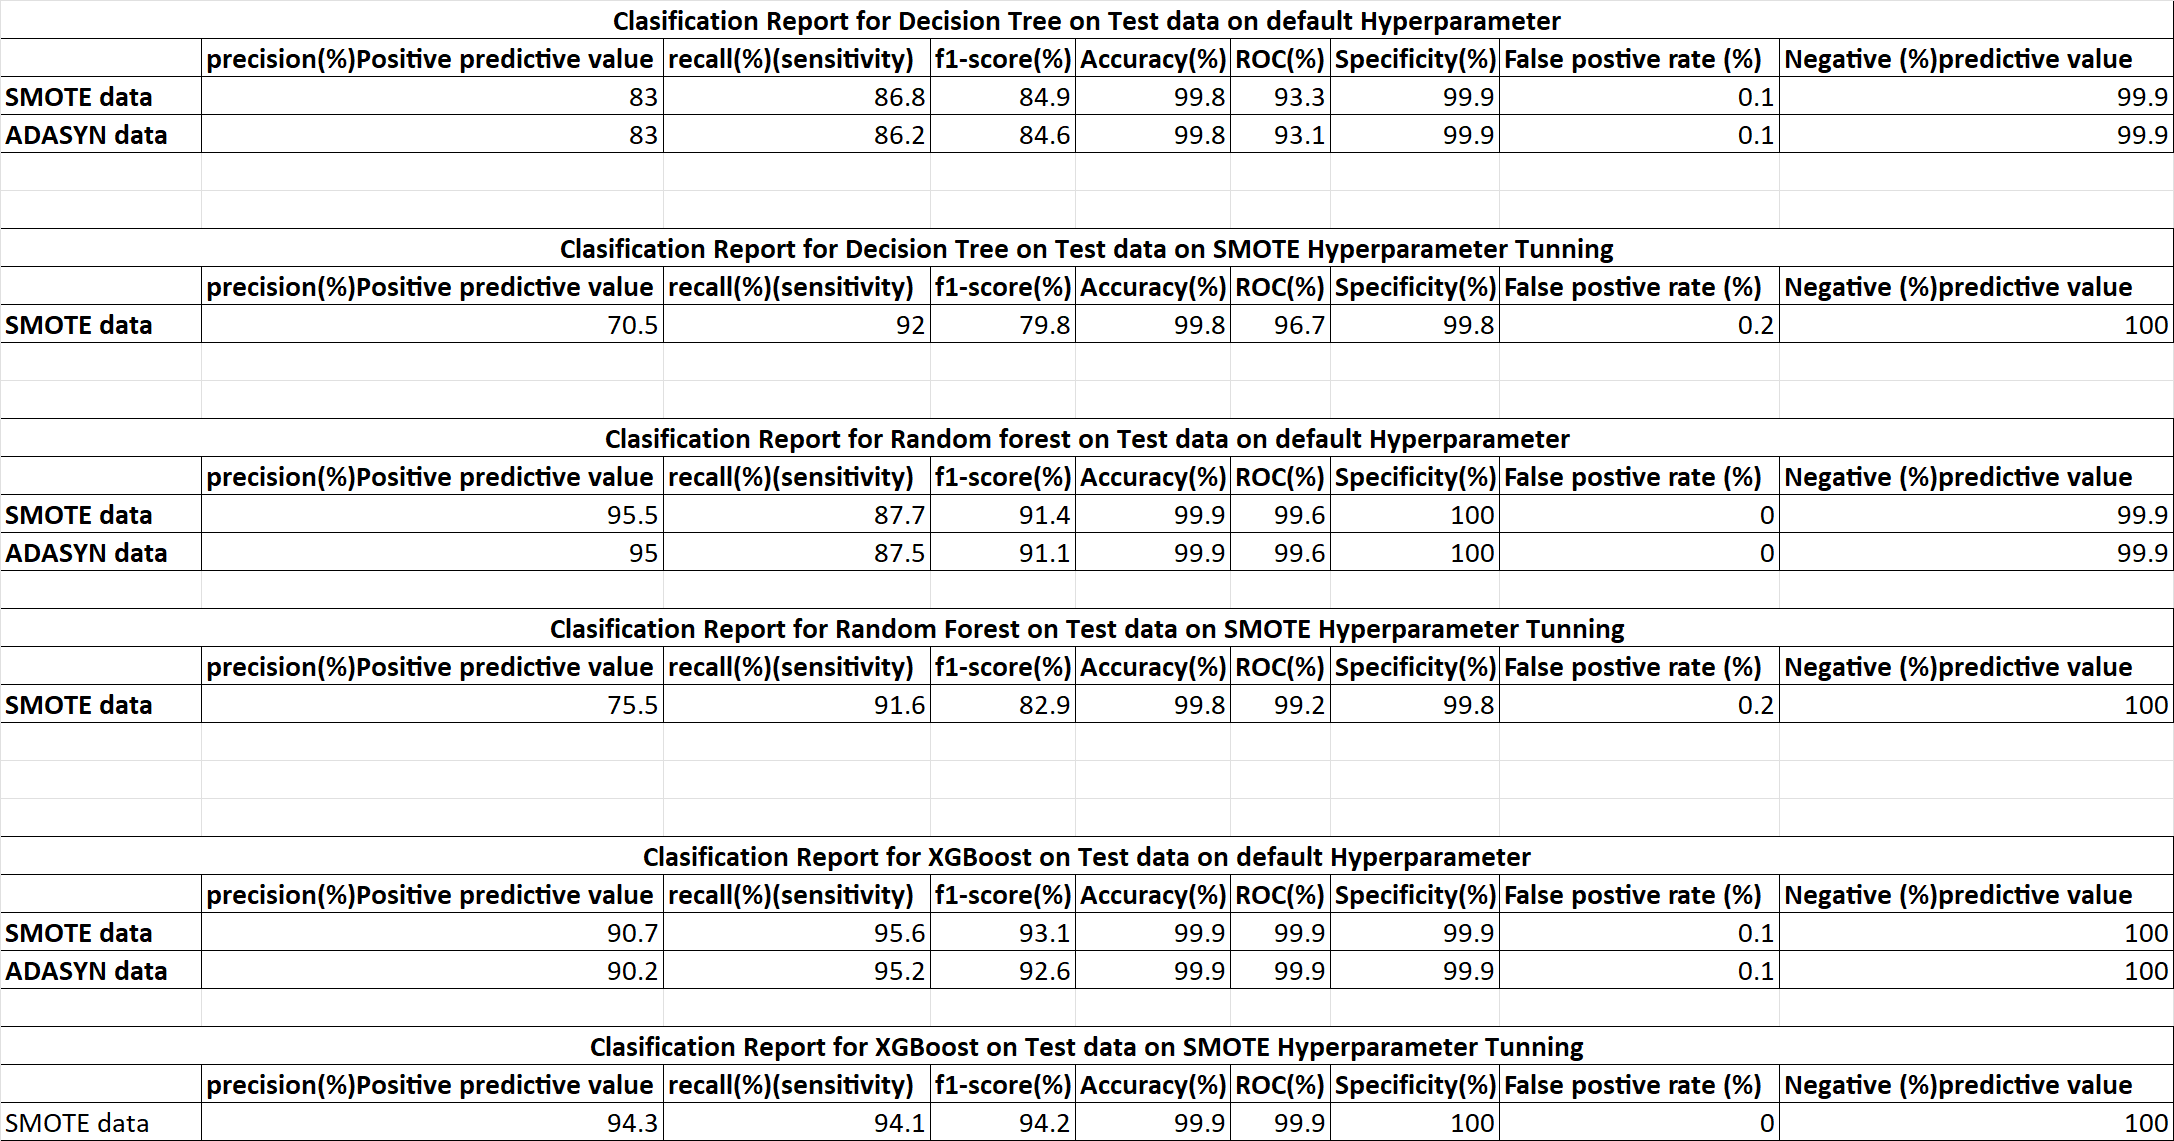

#### **Model Comparison Summary:**
From the above comparison of models, it is evident that XGBoost (both with default hyperparameter tuning using SMOTE data and tuned using SMOTE data) performs the best among the three models evaluated:

**Model 1:** Decision Tree
  
  Decision Tree (Default Hyperparameters)
  
  Decision Tree (Hyperparameter Tuning)

**Model 2:** Random Forest
  
  Random Forest (Default Hyperparameters)

  Random Forest (Hyperparameter Tuning)

**Model 3:** XGBoost
  
  XGBoost (Default Hyperparameters)
  
  XGBoost (Hyperparameter Tuning)

##**Model Consideration:**
Based on the accuracy, ROC, and recall scores from the various models, XGBoost with default hyperparameters using SMOTE data has been selected as the final
model.

Test Accuracy: 99.9%

Recall: 94.1%

ROC AUC: 99.9%

The recall for is_fraud is 90%, which is the highest among all models. Since our business objective prioritizes identifying fraudulent transactions over accurately identifying non-fraudulent transactions, high recall is crucial.
High recall ensures that the model captures almost all fraudulent transactions

#**Final Conclusion on basis of Best Model (XGBoost)**


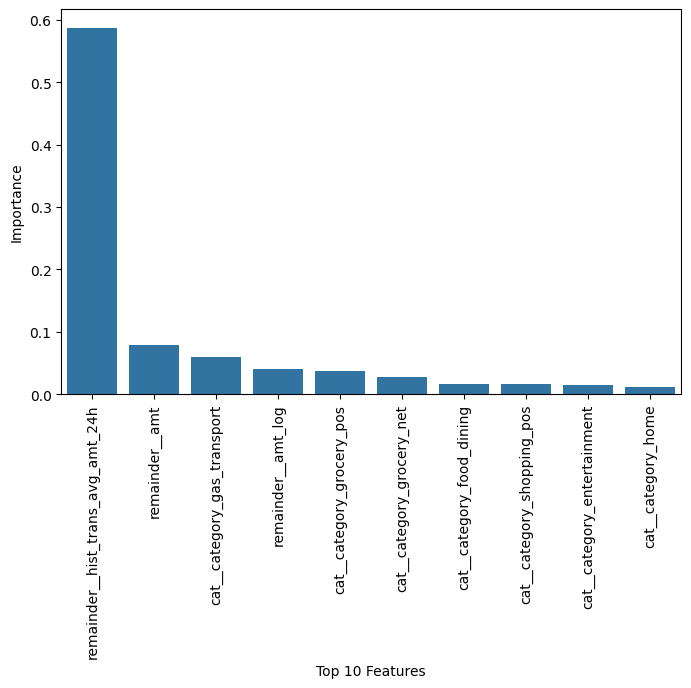

In [ ]:
# Sort the feature importance in descending order and get top 10 features
imp_feat = imp_df.sort_values(by="Importance", ascending=False).head(10)

# Plot the top 10 features
plt.figure(figsize=(8, 5))
sns.barplot(x='Varname', y='Importance', data=imp_feat)
plt.xlabel('Top 10 Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

#### **XGBoost hyper-parameter tunning using SMOTE data on train data set**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Chosen hyperparameters
params = {
    'learning_rate': 0.2,
    'max_depth': 20,
    'n_estimators': 50,
    'subsample': 0.9,
    'objective': 'binary:logistic'
}

# Fit model on training data
xgboost_best = XGBClassifier(**params)
xgboost_best.fit(X_train, y_train)

# Predictions on the training set
pred_train = xgboost_best.predict(X_train)

# Print confusion matrix and classification report
print('\nConfusion Matrix:\n', confusion_matrix(y_train, pred_train))
print('\nClassification Report:\n', classification_report(y_train, pred_train))


Confusion Matrix:
 [[1289919       0]
 [     31    6725]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00      6756

    accuracy                           1.00   1296675
   macro avg       1.00      1.00      1.00   1296675
weighted avg       1.00      1.00      1.00   1296675



##**Cost Benefit Anlayis based on model (Final)**
####**XGBoost on default hyperparameter on SMOTE data  on test data**


###### **Confussion Matrix of XGBoost on default hyperparameter on SMOTE data:**

Confusion Matrix:

       [[1289919       0]

        [     31    6725]]

In [ ]:
print ('\n Confussion Matrix :\n',confusion_matrix(y_test, y_test_pred_xgb_hp))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_xgb_hp).ravel()

print("True Negative:",tn)
print("False Positive:",fp)
print("False Negative:",fn)
print("True Positive:",tp)


 Confussion Matrix :
 [[552658    166]
 [   172   2723]]
True Negative: 552658
False Positive: 166
False Negative: 172
True Positive: 2723


###### **XGBoost on default hyperparameter on SMOTE data  on train data**

      Confussion Matrix :
  
      [[552658    166]
  
      [   172   2723]]

In [ ]:
# Confusion matrix
TN, FP, FN, TP = confusion_matrix(y_train, pred_train).ravel()

# Print confusion matrix values
print(f'True Negatives: {TN}')
print(f'True Positives: {TP}')
print(f'False Positives: {FP}')
print(f'False Negatives: {FN}')

True Negatives: 1289919
True Positives: 6725
False Positives: 0
False Negatives: 31


##**Cost Benefit Anlayis based on model (PART II)**

In [ ]:
# Average number of transactions per month detected as fraudulent by the model (TF) = TP/24
# True Positives
TP = 2723+6725  # As given in your example

# Assuming you know the number of months (replace with your actual value)
number_of_months = 24  # For example, if the data covers 12 months

# Calculate average fraudulent transactions per month
average_fraud_per_month = TP / number_of_months

# Output the result
print(f'Average Fraudulent Transactions per Month: {average_fraud_per_month:.2f}')

Average Fraudulent Transactions per Month: 393.67


In [ ]:
#Total cost of providing customer support per month for fraudulent transactions detected by the model (TF*$1.5)
# True Positives (TP)
TP = 393.67  # Number of fraudulent transactions correctly detected

# Support cost per fraudulent transaction
support_cost_per_transaction = 1.5  # Replace this with the actual cost in your scenario

# Calculate total cost per month
total_cost_per_month = (TP * support_cost_per_transaction)
# Output the result
print(f'Total Customer Support Cost per Month: ${total_cost_per_month:.2f}')

Total Customer Support Cost per Month: $590.50


In [ ]:
#Average number of transactions per month that are fraudulent but not detected by the model (FN)
FN = 31+172  # Number of fraudulent transactions not detected by the model

# Number of months
number_of_months = 24  # Adjust based on the time span of your dataset

# Calculate average fraudulent transactions not detected per month
average_FN_per_month = FN / number_of_months

# Output the result
print(f'Average Fraudulent Transactions Not Detected per Month (FN): {average_FN_per_month:.2f}')

Average Fraudulent Transactions Not Detected per Month (FN): 8.46


In [ ]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c) c = 530.42

cost_incurred = round(8.46*530.42,2)
print(f'cost incurred after:{cost_incurred}')

cost incurred after:4487.35


In [ ]:
# Final savings = Cost incurred before - Cost incurred after(1-7) cost incurred before = 213292.49

Final_Savings = round(213292.49-5077.86,2)
print(f'Final Savings after:{Final_Savings}')

Final Savings after:208214.63


###                           Cost Benefit Analysis(Part 2)
                          Questions                                                                          Answer
    1. Cost incurred per month before the model was deployed (2*3 of part1)----------------------------------213292.49
    2. Average number of transactions per month detected as fraudulent by the model (TF)---------------------393.67
    3. Cost of providing customer executive support per fraudulent transaction detected by the model---------1.5
    4. Total cost of providing customer support per month for fraudulent transactions
        detected by the model(TF*$1.5) ----------------------------------------------------------------------590.51  
    5. Average number of transactions per month that are fraudulent but not detected by the model (FN)-------8.46
    6. Cost incurred due to fraudulent transactions left undetected by the model (FN*c)---------------------4487.35
    7. Cost incurred per month after the model is built and deployed (4+6)-----------------------------------5077.86
    8. Final savings = Cost incurred before - Cost incurred after(1-7)---------------------------------------208214.64


#**Conclusion**

Before Cost incurred/month by the bank= $ 213292.49
         
Now Cost incurred/month by bank after my modelling = $ 5077.86 only

Cost saving done by Bank after model modelling = 208214.64


### From above data, we can see that, cost incurred to bank for paying to customer for their loss is reduced by 97.62%.

## **Business Insights and Recommendation of strategies:**


**1.Average Transaction Amount in Last 24 Hours (hist_trans_avg_amt_24h):**

**`Insight:`**
 The likelihood of a transaction being fraudulent increases as the average transaction amount over the last 24 hours `(hist_trans_avg_amt_24h)` rises. This value reflects the average spent in the last 24 hours.

**`Recommendation:`**
 The bank should trigger an SMS alert when a customer's spending in the last 24 hours exceeds their historical pattern, prompting them to verify unusual transactions immediately.

**2.Fraudulent Activity on Specific Days (Weekday Analysis):**

**`Insight:`**
 Fraudulent transactions tend to peak on Thursdays, Saturdays, and Mondays, according to patterns observed in the data.
Recommendation: Banks should apply stricter monitoring or heightened fraud detection alerts during these days, focusing on suspicious patterns to prevent fraud.

**3.Transaction Amount (amt):**

**`Insight:`**
Higher transaction amounts tend to correlate with an increased likelihood of fraud.

**`Recommendation:`**
If the transaction amount significantly exceeds the customer’s usual spending patterns, the bank should proactively send an alert to the customer for confirmation to reduce the risk of fraud.

**Category-Specific Fraud Risks (catg_home, catg_shopping_pos, etc.):**

**`Insight:`**
Categories such as home, shopping POS, grocery POS, health & fitness, and gas transport show higher fraud probabilities.

**`Recommendation:`**
For transactions in these categories, banks should implement real-time monitoring and send flash SMS alerts detailing transaction history, encouraging customers to confirm the legitimacy of these purchases.

**Odd Hour Transactions (Time-Based Fraud Analysis):**

**`Insight:'**
Fraudulent transactions are more likely to occur during odd hours (22:00 - 03:00).

**`Recommendation:`**
 The bank should enforce heightened fraud detection protocols during these hours and send SMS alerts for transactions that occur during this time frame to verify their legitimacy.
